In [1]:
import os
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
import random

import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from PIL import Image

import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D, GlobalAvgPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop, Adam

In [2]:
data = r'C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images'

In [3]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

In [4]:
images[:20]

['C:\\Users\\ST-008\\Desktop\\projects\\projects\\OWN CONCEPTS\\DL\\Autism\\images\\Autistic\\0001.jpg',
 'C:\\Users\\ST-008\\Desktop\\projects\\projects\\OWN CONCEPTS\\DL\\Autism\\images\\Autistic\\0002.jpg',
 'C:\\Users\\ST-008\\Desktop\\projects\\projects\\OWN CONCEPTS\\DL\\Autism\\images\\Autistic\\0003.jpg',
 'C:\\Users\\ST-008\\Desktop\\projects\\projects\\OWN CONCEPTS\\DL\\Autism\\images\\Autistic\\0004.jpg',
 'C:\\Users\\ST-008\\Desktop\\projects\\projects\\OWN CONCEPTS\\DL\\Autism\\images\\Autistic\\0005.jpg',
 'C:\\Users\\ST-008\\Desktop\\projects\\projects\\OWN CONCEPTS\\DL\\Autism\\images\\Autistic\\0006.jpg',
 'C:\\Users\\ST-008\\Desktop\\projects\\projects\\OWN CONCEPTS\\DL\\Autism\\images\\Autistic\\0007.jpg',
 'C:\\Users\\ST-008\\Desktop\\projects\\projects\\OWN CONCEPTS\\DL\\Autism\\images\\Autistic\\0008.jpg',
 'C:\\Users\\ST-008\\Desktop\\projects\\projects\\OWN CONCEPTS\\DL\\Autism\\images\\Autistic\\0009.jpg',
 'C:\\Users\\ST-008\\Desktop\\projects\\projects\\OWN C

In [5]:
len(images)

2897

In [6]:
class_values = []
for i in images:
    j = i.split('\\')
    class_values.append(j[-2])

In [7]:
class_values[:10]

['Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic',
 'Autistic']

In [8]:
len(class_values)

2897

In [9]:
temp = list(zip(images,class_values))
random.shuffle(temp)
images, class_values = zip(*temp)
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'class_label'])

In [10]:
data

image_path   class_label
0     C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic
1     C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic
2     C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
3     C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic
4     C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
...                                                 ...           ...
2892  C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
2893  C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic
2894  C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
2895  C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic
2896  C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic

[2897 rows x 2 columns]

In [11]:
data.class_label.value_counts()

Non_Autistic    1455
Autistic        1442
Name: class_label, dtype: int64

In [12]:
df_c0 = data[data['class_label'] =="Autistic"]
df_c1 = data[data['class_label'] =="Non_Autistic"]

In [13]:
unsampled_df_c0 = resample(df_c0, replace=True, random_state=23, n_samples=1500)
unsampled_df_c1 = resample(df_c1, replace=True, random_state=23, n_samples=1500)

In [14]:
df_unsampled = pd.concat([unsampled_df_c0, unsampled_df_c1])
df_unsampled

image_path   class_label
1178  C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic
1492  C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic
2158  C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic
1914  C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic
69    C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic
...                                                 ...           ...
1404  C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
1586  C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
1589  C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
178   C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
834   C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic

[3000 rows x 2 columns]

In [15]:
df_unsampled.head()

image_path class_label
1178  C:\Users\ST-008\Desktop\projects\projects\OWN ...    Autistic
1492  C:\Users\ST-008\Desktop\projects\projects\OWN ...    Autistic
2158  C:\Users\ST-008\Desktop\projects\projects\OWN ...    Autistic
1914  C:\Users\ST-008\Desktop\projects\projects\OWN ...    Autistic
69    C:\Users\ST-008\Desktop\projects\projects\OWN ...    Autistic

In [16]:
df_unsampled.tail()

image_path   class_label
1404  C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
1586  C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
1589  C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
178   C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
834   C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic

In [17]:
df_unsampled.class_label.value_counts()

Autistic        1500
Non_Autistic    1500
Name: class_label, dtype: int64

In [18]:
df_unsampled.shape

(3000, 2)

In [19]:
data = df_unsampled.sample(frac=1)
data.shape

(3000, 2)

In [20]:
data[:10]

image_path   class_label
537   C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic
2848  C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic
1982  C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
1483  C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
679   C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
1689  C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic
439   C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
1986  C:\Users\ST-008\Desktop\projects\projects\OWN ...      Autistic
1498  C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic
2681  C:\Users\ST-008\Desktop\projects\projects\OWN ...  Non_Autistic

Text(0.5, 0, 'Class_label')

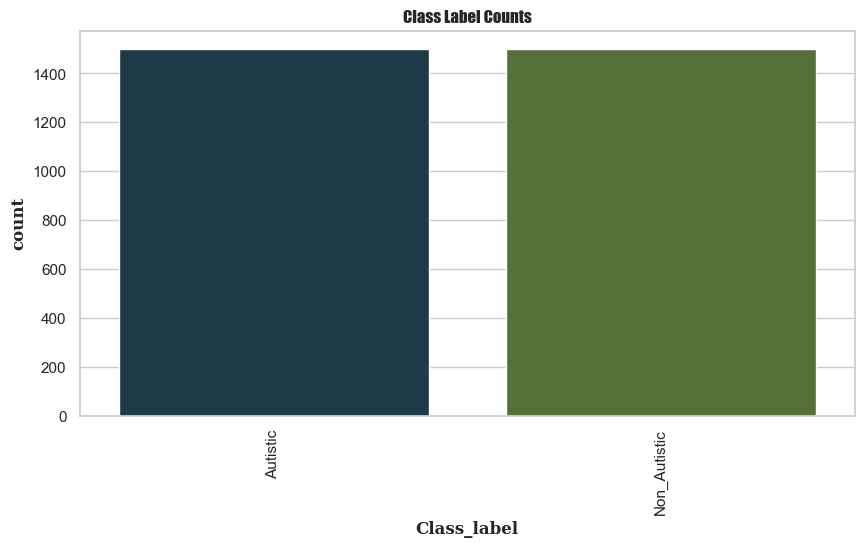

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [22]:
def resize_image(img):
    file = cv2.imread(img)
    resized = cv2.resize(file, (48,48), interpolation = cv2.INTER_AREA)
    resized= np.array(resized)
    image = np.reshape(resized,[1,48,48,3])
    return resized

In [23]:
def resize_image(img):
    file = cv2.imread(img)
    print("START")
    print(file)
    print(img)
    print("END")
    resized = cv2.resize(file, (48,48), interpolation = cv2.INTER_AREA)
    resized= np.array(resized)
    image = np.reshape(resized,[1,48,48,3])
    return resized

In [24]:
images=[resize_image(img) for img in data['image_path']]

START
[[[136 141 142]
  [136 141 142]
  [135 140 141]
  ...
  [ 76  79  87]
  [ 73  77  82]
  [ 52  55  60]]

 [[134 139 140]
  [134 139 140]
  [133 138 139]
  ...
  [ 70  75  84]
  [ 77  80  88]
  [ 62  66  71]]

 [[129 134 135]
  [129 134 135]
  [129 134 135]
  ...
  [ 64  71  80]
  [ 79  85  92]
  [ 68  74  79]]

 ...

 [[ 88  95  90]
  [ 89  96  91]
  [ 88  95  90]
  ...
  [239 181  15]
  [233 178  15]
  [231 176  17]]

 [[ 84  91  86]
  [ 86  93  88]
  [ 86  93  88]
  ...
  [235 177  11]
  [230 173  10]
  [230 174  15]]

 [[ 82  88  83]
  [ 82  88  83]
  [ 80  87  82]
  ...
  [237 177  11]
  [229 172   9]
  [228 172  13]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0900.jpg
END
START
[[[132 130 120]
  [131 129 119]
  [126 124 114]
  ...
  [138 143 144]
  [137 141 146]
  [138 142 147]]

 [[132 130 120]
  [132 130 120]
  [130 128 118]
  ...
  [135 140 141]
  [137 141 146]
  [138 142 147]]

 [[131 128 120]
  [133 130 122]
  [135 132 124]
  ...
  

START
[[[ 47 106 186]
  [ 53 104 190]
  [ 64 102 196]
  ...
  [112 138 192]
  [119 143 195]
  [126 148 196]]

 [[ 54 112 194]
  [ 59 109 197]
  [ 64 106 202]
  ...
  [136 162 216]
  [136 160 212]
  [137 159 207]]

 [[ 59 115 197]
  [ 60 113 200]
  [ 60 108 203]
  ...
  [166 190 242]
  [159 182 232]
  [150 170 217]]

 ...

 [[112 128 174]
  [107 122 168]
  [ 88  95 144]
  ...
  [ 28  18   0]
  [ 29  19   1]
  [ 31  21   3]]

 [[ 82 100 141]
  [ 77  93 136]
  [ 65  76 120]
  ...
  [ 44  37  17]
  [ 44  37  17]
  [ 43  36  16]]

 [[ 12  39  59]
  [  0  19  55]
  [  5  24  81]
  ...
  [ 38  35   7]
  [ 43  40  12]
  [ 45  42  14]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1200.jpg
END
START
[[[ 71  73  73]
  [ 68  70  70]
  [ 63  65  65]
  ...
  [248 255 248]
  [242 252 240]
  [243 251 240]]

 [[ 69  71  71]
  [ 67  69  69]
  [ 64  66  66]
  ...
  [243 254 244]
  [243 253 241]
  [250 255 248]]

 [[ 66  68  68]
  [ 66  68  68]
  [ 65  67  67]
  ...
  

START
[[[ 63  91 125]
  [ 44  71 105]
  [ 34  59  91]
  ...
  [ 70  93 125]
  [ 66  89 121]
  [ 58  81 113]]

 [[ 51  79 113]
  [ 34  61  95]
  [ 40  65  97]
  ...
  [ 63  86 118]
  [ 60  83 115]
  [ 54  77 109]]

 [[ 47  74 108]
  [ 31  59  90]
  [ 55  80 112]
  ...
  [ 53  76 108]
  [ 53  76 108]
  [ 51  74 106]]

 ...

 [[244 245 243]
  [244 245 243]
  [244 245 243]
  ...
  [242 241 243]
  [241 240 242]
  [240 239 241]]

 [[244 245 243]
  [244 245 243]
  [244 245 243]
  ...
  [242 241 243]
  [241 240 242]
  [241 240 242]]

 [[244 245 243]
  [244 245 243]
  [244 245 243]
  ...
  [242 241 243]
  [242 241 243]
  [241 240 242]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1378.jpg
END
START
[[[108  89  28]
  [108  89  28]
  [107  88  27]
  ...
  [123 103  32]
  [126 106  35]
  [129 109  38]]

 [[108  89  28]
  [108  89  28]
  [107  88  27]
  ...
  [125 104  36]
  [126 105  37]
  [127 106  38]]

 [[108  90  27]
  [108  90  27]
  [107  89  26]
  ..

START
[[[142 171 202]
  [143 171 202]
  [144 169 203]
  ...
  [114 171 186]
  [116 172 189]
  [122 174 191]]

 [[138 164 194]
  [140 164 194]
  [142 163 194]
  ...
  [119 175 192]
  [120 176 193]
  [125 176 196]]

 [[131 155 179]
  [133 155 180]
  [136 155 182]
  ...
  [127 181 198]
  [127 180 200]
  [128 179 199]]

 ...

 [[174 153 125]
  [179 159 128]
  [180 160 129]
  ...
  [123 148 174]
  [125 148 174]
  [127 150 176]]

 [[162 146 123]
  [167 152 126]
  [167 153 125]
  ...
  [119 144 170]
  [118 141 167]
  [119 140 167]]

 [[165 122 105]
  [156 116  98]
  [150 114  96]
  ...
  [132 154 172]
  [122 144 162]
  [123 145 163]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1096.jpg
END
START
[[[47 66 74]
  [49 68 76]
  [51 70 78]
  ...
  [35 54 67]
  [37 51 63]
  [37 51 63]]

 [[47 66 74]
  [48 67 75]
  [50 69 77]
  ...
  [37 56 69]
  [39 53 65]
  [39 53 65]]

 [[47 66 74]
  [47 66 74]
  [46 67 75]
  ...
  [39 58 71]
  [42 56 68]
  [42 56 68]]

 .

START
[[[ 66  82 105]
  [ 62  78 101]
  [ 59  75  98]
  ...
  [102 134 175]
  [109 141 182]
  [108 138 179]]

 [[ 69  85 108]
  [ 50  66  89]
  [ 50  66  89]
  ...
  [ 97 129 170]
  [103 135 176]
  [106 136 177]]

 [[ 58  74  97]
  [ 43  59  82]
  [ 39  56  82]
  ...
  [100 132 173]
  [103 135 176]
  [104 134 175]]

 ...

 [[ 63  66  80]
  [ 63  66  80]
  [ 63  66  80]
  ...
  [ 68  60  67]
  [ 58  50  57]
  [ 42  35  42]]

 [[ 61  67  80]
  [ 61  67  80]
  [ 61  67  80]
  ...
  [ 71  63  70]
  [ 51  43  50]
  [ 43  36  43]]

 [[ 61  67  80]
  [ 61  67  80]
  [ 61  67  80]
  ...
  [ 60  52  59]
  [ 47  39  46]
  [ 53  46  53]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1103.jpg
END
START
[[[138 164 188]
  [139 165 189]
  [139 165 189]
  ...
  [ 66  83 102]
  [ 63  83 101]
  [ 63  83 101]]

 [[138 164 188]
  [138 164 188]
  [139 165 189]
  ...
  [ 61  78  97]
  [ 63  83 101]
  [ 63  83 101]]

 [[138 164 188]
  [139 165 189]
  [139 165 189]
  ..

START
[[[119 146 156]
  [132 159 169]
  [139 168 177]
  ...
  [ 77  84 104]
  [ 76  83 102]
  [ 87  93 112]]

 [[119 146 156]
  [126 153 163]
  [127 154 164]
  ...
  [ 83  90 110]
  [ 80  87 106]
  [ 87  93 112]]

 [[115 140 150]
  [120 145 155]
  [119 146 156]
  ...
  [ 89  96 116]
  [ 83  90 109]
  [ 85  91 110]]

 ...

 [[145 187 206]
  [126 168 187]
  [148 190 209]
  ...
  [ 84  56 215]
  [ 85  57 216]
  [ 85  58 215]]

 [[138 180 199]
  [138 180 199]
  [139 181 200]
  ...
  [ 84  58 212]
  [ 83  57 211]
  [ 82  55 212]]

 [[138 180 199]
  [137 179 198]
  [138 180 199]
  ...
  [ 84  58 212]
  [ 83  57 211]
  [ 82  55 212]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1042.jpg
END
START
[[[175 213 245]
  [174 212 244]
  [174 212 244]
  ...
  [206 239 255]
  [205 238 255]
  [202 238 255]]

 [[177 215 247]
  [176 214 246]
  [176 214 244]
  ...
  [206 239 255]
  [205 238 255]
  [202 238 255]]

 [[180 218 250]
  [179 217 247]
  [177 215 245]
  ...
  

START
[[[ 29  26  41]
  [ 19  16  31]
  [ 13  10  25]
  ...
  [ 16   4  16]
  [ 15   3  15]
  [ 15   3  15]]

 [[  9   6  21]
  [ 18  15  30]
  [ 23  20  35]
  ...
  [ 16   4  16]
  [ 15   3  15]
  [ 15   3  15]]

 [[ 11   8  23]
  [ 21  18  33]
  [ 23  20  35]
  ...
  [ 15   3  15]
  [ 15   3  15]
  [ 15   3  15]]

 ...

 [[ 65  92 113]
  [ 37  62  82]
  [ 14  37  53]
  ...
  [218 218 218]
  [226 226 226]
  [231 231 231]]

 [[ 33  58  78]
  [  5  29  47]
  [  6  29  44]
  ...
  [212 212 212]
  [219 219 219]
  [223 223 223]]

 [[ 40  65  85]
  [  0  21  39]
  [  1  22  37]
  ...
  [209 209 209]
  [215 215 215]
  [220 220 220]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1455.jpg
END
START
[[[121 156 182]
  [112 152 177]
  [107 151 175]
  ...
  [  4   5   1]
  [  5   6   2]
  [  5   6   2]]

 [[110 145 171]
  [104 141 167]
  [102 143 168]
  ...
  [  5   6   2]
  [  5   6   2]
  [  5   6   2]]

 [[104 139 165]
  [ 99 136 162]
  [ 98 139 164]
  ..

START
[[[145 150 153]
  [146 151 154]
  [147 152 155]
  ...
  [220 224 225]
  [221 225 226]
  [221 225 226]]

 [[145 150 153]
  [146 151 154]
  [147 152 155]
  ...
  [220 224 225]
  [221 225 226]
  [221 225 226]]

 [[146 151 154]
  [147 152 155]
  [147 152 155]
  ...
  [220 224 225]
  [221 225 226]
  [221 225 226]]

 ...

 [[238 243 242]
  [236 241 240]
  [234 239 238]
  ...
  [207 211 212]
  [207 211 212]
  [207 211 212]]

 [[238 243 242]
  [236 241 240]
  [234 239 238]
  ...
  [207 211 212]
  [207 211 212]
  [207 211 212]]

 [[238 243 242]
  [236 241 240]
  [234 239 238]
  ...
  [207 211 212]
  [207 211 212]
  [207 211 212]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0553.jpg
END
START
[[[147  90  28]
  [148  91  29]
  [150  95  28]
  ...
  [237 238 236]
  [238 239 237]
  [238 239 237]]

 [[152  94  28]
  [153  96  27]
  [153  97  26]
  ...
  [237 238 236]
  [237 238 236]
  [238 239 237]]

 [[156  98  26]
  [155  98  23]
  [154  98  21]
  ...
  

START
[[[121 151 170]
  [125 155 174]
  [123 154 175]
  ...
  [165 208 225]
  [172 215 232]
  [170 213 230]]

 [[124 154 173]
  [128 158 177]
  [125 156 177]
  ...
  [163 206 223]
  [169 212 229]
  [167 210 227]]

 [[129 159 178]
  [131 161 180]
  [128 160 179]
  ...
  [164 208 225]
  [169 213 230]
  [167 211 228]]

 ...

 [[ 76 108 137]
  [ 72 104 133]
  [ 71 103 132]
  ...
  [146 184 214]
  [144 182 212]
  [142 180 210]]

 [[ 84 116 145]
  [ 81 113 142]
  [ 80 112 141]
  ...
  [145 183 213]
  [145 183 213]
  [145 183 213]]

 [[ 93 125 154]
  [ 89 121 150]
  [ 88 120 149]
  ...
  [145 183 213]
  [147 185 215]
  [149 187 217]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1450.jpg
END
START
[[[  8  10  11]
  [ 11  13  14]
  [ 10  12  12]
  ...
  [ 56  68  78]
  [ 52  64  74]
  [ 51  63  73]]

 [[  7   9  10]
  [ 10  12  13]
  [  9  11  11]
  ...
  [ 59  71  81]
  [ 59  71  81]
  [ 58  70  80]]

 [[  6   8   9]
  [ 10  12  13]
  [  9  11  11]
  ..

START
[[[120 207 233]
  [120 207 233]
  [120 207 233]
  ...
  [113 201 241]
  [113 201 241]
  [113 201 241]]

 [[120 207 233]
  [120 207 233]
  [120 207 233]
  ...
  [113 201 241]
  [113 201 241]
  [113 201 241]]

 [[120 207 233]
  [120 207 233]
  [120 207 233]
  ...
  [113 201 241]
  [113 201 241]
  [113 201 241]]

 ...

 [[  9  20  28]
  [  9  20  28]
  [  9  20  28]
  ...
  [ 35  19  26]
  [ 34  18  25]
  [ 34  18  25]]

 [[  7  18  26]
  [  7  18  26]
  [  7  18  26]
  ...
  [ 34  18  25]
  [ 33  17  24]
  [ 33  17  24]]

 [[  6  17  25]
  [  6  17  25]
  [  5  16  24]
  ...
  [ 32  16  23]
  [ 32  16  23]
  [ 32  16  23]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0862.jpg
END
START
[[[  7  15  28]
  [  8  16  29]
  [  6  14  27]
  ...
  [ 26  38  56]
  [ 17  31  49]
  [ 17  31  49]]

 [[  7  15  28]
  [  6  14  27]
  [  5  13  26]
  ...
  [ 21  33  51]
  [ 14  28  46]
  [ 14  28  46]]

 [[  7  15  28]
  [  5  13  26]
  [  4  12  25]
  ..

START
[[[235 238 229]
  [250 255 255]
  [231 240 254]
  ...
  [129 196 245]
  [134 201 250]
  [137 204 253]]

 [[244 248 242]
  [250 254 255]
  [208 218 235]
  ...
  [128 197 247]
  [133 202 252]
  [136 205 254]]

 [[238 244 239]
  [238 244 251]
  [176 186 204]
  ...
  [128 199 249]
  [133 204 254]
  [136 207 255]]

 ...

 [[143 167 185]
  [144 170 186]
  [149 176 190]
  ...
  [176 203 237]
  [175 202 236]
  [175 202 236]]

 [[147 173 190]
  [148 174 190]
  [152 179 193]
  ...
  [177 204 238]
  [177 204 238]
  [176 203 237]]

 [[150 176 193]
  [151 177 193]
  [153 180 194]
  ...
  [177 205 239]
  [177 205 239]
  [176 204 238]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0824.jpg
END
START
[[[153 175 157]
  [112 132 119]
  [ 89 110 102]
  ...
  [153 155 133]
  [  0   5   0]
  [ 79  90  87]]

 [[153 175 156]
  [128 149 134]
  [ 89 110 101]
  ...
  [255 255 242]
  [113 117 105]
  [ 19  26  19]]

 [[159 181 162]
  [163 187 169]
  [213 236 222]
  ...
  

START
[[[217 227 221]
  [218 225 220]
  [219 225 220]
  ...
  [ 18  29   9]
  [ 16  28   6]
  [ 13  26   0]]

 [[210 220 214]
  [209 219 213]
  [212 219 214]
  ...
  [ 21  31  14]
  [ 19  30  10]
  [ 17  30   6]]

 [[191 204 196]
  [190 203 195]
  [192 203 195]
  ...
  [ 22  33  17]
  [ 21  33  15]
  [ 19  31  11]]

 ...

 [[211 210 206]
  [211 210 206]
  [205 207 201]
  ...
  [114 104  87]
  [123 111  93]
  [133 119 100]]

 [[215 214 210]
  [213 212 208]
  [202 204 198]
  ...
  [106  96  79]
  [116 102  84]
  [123 109  90]]

 [[216 215 211]
  [212 211 207]
  [200 202 196]
  ...
  [101  88  72]
  [108  94  76]
  [115 101  82]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0613.jpg
END
START
[[[121 156 182]
  [112 152 177]
  [107 151 175]
  ...
  [  4   5   1]
  [  5   6   2]
  [  5   6   2]]

 [[110 145 171]
  [104 141 167]
  [102 143 168]
  ...
  [  5   6   2]
  [  5   6   2]
  [  5   6   2]]

 [[104 139 165]
  [ 99 136 162]
  [ 98 139 164]
  ...
  

START
[[[191 216 232]
  [191 216 232]
  [192 217 233]
  ...
  [ 71 101 126]
  [ 70  99 126]
  [ 70  99 126]]

 [[191 215 233]
  [191 216 232]
  [191 216 232]
  ...
  [ 70 100 125]
  [ 69  98 125]
  [ 69  98 125]]

 [[189 213 231]
  [189 213 231]
  [189 213 231]
  ...
  [ 69  99 124]
  [ 68  97 124]
  [ 68  97 124]]

 ...

 [[ 44  42 192]
  [ 46  44 194]
  [ 47  45 194]
  ...
  [  8  15 132]
  [  8  15 132]
  [  8  15 132]]

 [[ 46  44 194]
  [ 46  44 194]
  [ 47  45 194]
  ...
  [  8  15 132]
  [  7  14 131]
  [  7  14 131]]

 [[ 47  45 195]
  [ 47  45 195]
  [ 47  45 194]
  ...
  [  7  14 131]
  [  7  14 131]
  [  7  14 131]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1428.jpg
END
START
[[[243 238 223]
  [236 229 214]
  [236 229 214]
  ...
  [151 171 188]
  [158 178 203]
  [ 96 117 149]]

 [[236 228 211]
  [252 244 227]
  [225 217 200]
  ...
  [126 145 160]
  [ 85 103 126]
  [109 127 156]]

 [[224 213 191]
  [230 219 199]
  [223 213 195]
  ..

START
[[[ 55  62  65]
  [ 58  70  70]
  [ 61  83  78]
  ...
  [ 62 104 117]
  [ 57  99 112]
  [ 56  95 110]]

 [[ 69  77  76]
  [ 68  83  79]
  [ 72  95  87]
  ...
  [ 63 105 118]
  [ 58 100 113]
  [ 56  95 109]]

 [[ 76  88  82]
  [ 73  90  81]
  [ 76 102  89]
  ...
  [ 65 107 119]
  [ 59 101 114]
  [ 58  97 111]]

 ...

 [[115 187 204]
  [118 188 205]
  [119 189 206]
  ...
  [ 48  64  77]
  [ 39  55  68]
  [ 35  49  67]]

 [[117 187 204]
  [116 186 203]
  [118 188 205]
  ...
  [ 49  66  79]
  [ 41  57  70]
  [ 36  52  69]]

 [[116 186 203]
  [114 184 201]
  [117 186 203]
  ...
  [ 50  67  80]
  [ 40  57  70]
  [ 37  53  70]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0820.jpg
END
START
[[[ 95 107 107]
  [ 98 110 110]
  [103 115 115]
  ...
  [ 48  57  66]
  [ 46  55  64]
  [ 48  57  66]]

 [[ 97 109 109]
  [100 112 112]
  [102 114 114]
  ...
  [ 49  58  67]
  [ 47  56  65]
  [ 49  58  67]]

 [[ 99 111 111]
  [101 113 113]
  [102 114 114]
  ..

START
[[[ 71  92 124]
  [ 70  91 123]
  [ 70  91 123]
  ...
  [ 73 100 134]
  [ 73 100 134]
  [ 73 100 134]]

 [[ 71  92 124]
  [ 70  91 123]
  [ 70  91 123]
  ...
  [ 72  99 133]
  [ 72  99 133]
  [ 72  99 133]]

 [[ 71  92 123]
  [ 71  92 123]
  [ 71  92 123]
  ...
  [ 72  99 133]
  [ 71  98 132]
  [ 71  98 132]]

 ...

 [[122 102  91]
  [125 107 106]
  [ 96  84 102]
  ...
  [  4 206 247]
  [  8 210 249]
  [ 17 220 255]]

 [[132  95  81]
  [127  95  90]
  [ 98  72  90]
  ...
  [  7 212 250]
  [  5 207 246]
  [  7 213 249]]

 [[141  91  73]
  [136  91  87]
  [ 93  61  80]
  ...
  [ 14 216 255]
  [  8 210 249]
  [  5 210 248]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1221.jpg
END
START
[[[238 242 243]
  [238 242 243]
  [238 242 243]
  ...
  [245 251 250]
  [245 251 250]
  [245 251 250]]

 [[238 242 243]
  [238 242 243]
  [238 242 243]
  ...
  [245 251 250]
  [245 251 250]
  [245 251 250]]

 [[237 241 242]
  [237 241 242]
  [237 241 242]
  ..

START
[[[ 36  32  31]
  [ 36  32  31]
  [ 35  31  30]
  ...
  [ 95  79  73]
  [ 97  81  75]
  [ 96  80  74]]

 [[ 36  32  31]
  [ 36  32  31]
  [ 35  31  30]
  ...
  [ 93  79  73]
  [ 95  80  77]
  [ 97  81  75]]

 [[ 36  32  31]
  [ 36  32  31]
  [ 35  31  30]
  ...
  [ 95  80  77]
  [ 97  82  79]
  [ 96  81  78]]

 ...

 [[144 139 214]
  [135 129 218]
  [123 118 223]
  ...
  [103  78  62]
  [106  81  65]
  [113  85  68]]

 [[146 141 216]
  [136 130 219]
  [125 120 225]
  ...
  [103  78  62]
  [107  82  66]
  [114  86  69]]

 [[148 143 218]
  [139 133 222]
  [127 122 227]
  ...
  [103  78  62]
  [107  82  66]
  [116  88  71]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0318.jpg
END
START
[[[249 245 244]
  [249 245 244]
  [249 245 244]
  ...
  [251 247 246]
  [251 247 246]
  [251 247 246]]

 [[249 245 244]
  [249 245 244]
  [249 245 244]
  ...
  [251 247 246]
  [251 247 246]
  [251 247 246]]

 [[249 245 244]
  [249 245 244]
  [249 245 244]
  ...
  

START
[[[255 228 182]
  [255 225 179]
  [251 221 174]
  ...
  [ 75  99  91]
  [ 73 100  91]
  [ 68  95  86]]

 [[255 227 180]
  [254 224 177]
  [250 219 174]
  ...
  [ 82 106  98]
  [ 69  93  85]
  [ 52  79  70]]

 [[255 225 178]
  [252 221 176]
  [246 217 172]
  ...
  [ 86 109 104]
  [ 59  82  77]
  [ 33  56  51]]

 ...

 [[ 83  66  40]
  [ 75  62  40]
  [ 65  57  40]
  ...
  [ 18  16   6]
  [ 18  16   6]
  [ 18  16   6]]

 [[ 83  66  40]
  [ 75  62  40]
  [ 65  57  40]
  ...
  [ 18  16   6]
  [ 18  16   6]
  [ 18  16   6]]

 [[ 83  66  40]
  [ 75  62  40]
  [ 65  57  40]
  ...
  [ 18  16   6]
  [ 18  16   6]
  [ 18  16   6]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0541.jpg
END
START
[[[100 111 119]
  [ 97 107 117]
  [125 139 151]
  ...
  [128 158 185]
  [119 148 169]
  [109 136 156]]

 [[ 95 109 121]
  [105 119 131]
  [110 126 139]
  ...
  [119 157 189]
  [109 143 172]
  [103 136 162]]

 [[ 97 113 129]
  [113 129 145]
  [ 96 112 129]
  ...
  

START
[[[47 66 74]
  [49 68 76]
  [51 70 78]
  ...
  [35 54 67]
  [37 51 63]
  [37 51 63]]

 [[47 66 74]
  [48 67 75]
  [50 69 77]
  ...
  [37 56 69]
  [39 53 65]
  [39 53 65]]

 [[47 66 74]
  [47 66 74]
  [46 67 75]
  ...
  [39 58 71]
  [42 56 68]
  [42 56 68]]

 ...

 [[13  1  1]
  [13  1  1]
  [13  1  1]
  ...
  [14  5  2]
  [23 13  3]
  [23 13  3]]

 [[12  0  0]
  [12  0  0]
  [13  1  1]
  ...
  [21 12  8]
  [27 17  7]
  [27 17  7]]

 [[12  0  0]
  [12  0  0]
  [12  0  0]
  ...
  [28 17  9]
  [27 17  7]
  [27 17  7]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0944.jpg
END
START
[[[237 244 247]
  [237 244 247]
  [236 243 246]
  ...
  [237 239 240]
  [237 239 240]
  [236 238 239]]

 [[237 244 247]
  [236 243 246]
  [236 243 246]
  ...
  [234 238 239]
  [234 238 239]
  [234 238 239]]

 [[236 243 246]
  [236 243 246]
  [236 243 246]
  ...
  [233 237 238]
  [234 238 239]
  [234 238 239]]

 ...

 [[233 240 243]
  [233 240 243]
  [233 240 243]
  

START
[[[ 50  20   1]
  [ 55  22   7]
  [ 58  22  12]
  ...
  [  0  37 108]
  [  0  37 115]
  [  0  42 121]]

 [[ 54  22   3]
  [ 56  21   7]
  [ 57  21  11]
  ...
  [ 11  56 124]
  [  0  34 113]
  [  2  42 125]]

 [[ 56  23   3]
  [ 58  21   7]
  [ 55  18  10]
  ...
  [ 33  76 139]
  [  1  40 118]
  [  6  44 132]]

 ...

 [[  1  17  76]
  [  4  20  79]
  [  2  19  82]
  ...
  [ 12  20  50]
  [ 12  20  49]
  [  9  20  48]]

 [[  0  22  88]
  [  2  22 100]
  [  3  16 114]
  ...
  [ 12  18  53]
  [ 13  20  53]
  [ 11  20  53]]

 [[  4  22 137]
  [  7  20 148]
  [  7  13 162]
  ...
  [ 12  17  56]
  [ 12  18  55]
  [ 12  20  57]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0062.jpg
END
START
[[[  2  38  56]
  [  2  38  56]
  [  0  35  50]
  ...
  [160 175 178]
  [130 147 150]
  [107 126 131]]

 [[  2  35  54]
  [  0  36  54]
  [  0  34  49]
  ...
  [164 178 177]
  [141 156 158]
  [124 142 143]]

 [[  4  37  56]
  [  2  35  54]
  [  0  34  50]
  ...
  

START
[[[227 238 218]
  [228 239 219]
  [228 240 220]
  ...
  [192 196 171]
  [195 199 174]
  [200 204 179]]

 [[229 240 220]
  [228 239 219]
  [227 239 219]
  ...
  [192 196 171]
  [196 200 175]
  [201 205 180]]

 [[226 237 217]
  [222 233 213]
  [225 236 216]
  ...
  [196 199 177]
  [200 203 181]
  [203 206 184]]

 ...

 [[183 186 184]
  [178 181 179]
  [179 182 180]
  ...
  [ 63  52  44]
  [ 66  53  45]
  [ 63  51  41]]

 [[183 186 184]
  [178 181 179]
  [184 186 186]
  ...
  [ 54  43  35]
  [ 56  43  35]
  [ 60  47  39]]

 [[180 183 181]
  [177 180 178]
  [185 187 187]
  ...
  [ 49  37  31]
  [ 55  42  34]
  [ 62  49  41]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1439.jpg
END
START
[[[241 238 177]
  [242 239 178]
  [245 241 182]
  ...
  [ 65  73  56]
  [ 61  70  50]
  [ 60  69  49]]

 [[254 250 199]
  [255 251 200]
  [255 252 203]
  ...
  [ 65  73  56]
  [ 61  70  50]
  [ 61  70  50]]

 [[255 255 214]
  [255 255 214]
  [255 255 215]
  ..

START
[[[131 175 229]
  [ 80 126 180]
  [ 67 114 170]
  ...
  [ 30  35  38]
  [ 30  35  38]
  [ 30  35  38]]

 [[ 99 146 198]
  [ 16  63 117]
  [ 89 136 190]
  ...
  [ 31  36  39]
  [ 30  35  38]
  [ 30  35  38]]

 [[ 93 143 195]
  [ 57 107 159]
  [ 67 114 166]
  ...
  [ 31  36  39]
  [ 31  36  39]
  [ 31  36  39]]

 ...

 [[ 35  42 122]
  [ 35  41 124]
  [ 35  41 124]
  ...
  [ 33  37 108]
  [ 33  38 107]
  [ 32  37 106]]

 [[ 35  42 122]
  [ 35  42 122]
  [ 35  42 122]
  ...
  [ 33  37 108]
  [ 33  38 107]
  [ 32  37 106]]

 [[ 34  42 119]
  [ 34  42 119]
  [ 34  41 120]
  ...
  [ 32  37 106]
  [ 31  37 104]
  [ 31  37 104]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0153.jpg
END
START
[[[ 93 112 120]
  [ 61  78  87]
  [ 70  86  93]
  ...
  [ 78  97 112]
  [ 60  81  96]
  [ 59  80  95]]

 [[109 128 136]
  [ 53  70  79]
  [ 58  74  81]
  ...
  [ 77  96 111]
  [ 63  84  99]
  [ 63  84  99]]

 [[105 124 132]
  [ 57  74  83]
  [ 59  75  82]
  ...
  

START
[[[ 20  70  70]
  [ 17  67  67]
  [ 16  64  65]
  ...
  [  0 124 142]
  [  1 125 143]
  [  3 127 145]]

 [[ 19  69  69]
  [ 16  66  66]
  [ 14  62  63]
  ...
  [  0 123 141]
  [  1 125 143]
  [  3 127 145]]

 [[ 18  68  68]
  [ 15  65  65]
  [ 14  62  63]
  ...
  [  0 122 140]
  [  0 124 142]
  [  2 126 144]]

 ...

 [[ 78 133 238]
  [ 79 134 239]
  [ 79 134 239]
  ...
  [ 74 131 236]
  [ 74 131 236]
  [ 75 132 237]]

 [[ 78 133 238]
  [ 79 134 239]
  [ 79 134 239]
  ...
  [ 74 130 237]
  [ 74 130 237]
  [ 75 131 238]]

 [[ 78 133 238]
  [ 79 134 239]
  [ 79 134 239]
  ...
  [ 74 130 237]
  [ 74 130 237]
  [ 75 131 238]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0145.jpg
END
START
[[[ 93 112 120]
  [ 61  78  87]
  [ 70  86  93]
  ...
  [ 78  97 112]
  [ 60  81  96]
  [ 59  80  95]]

 [[109 128 136]
  [ 53  70  79]
  [ 58  74  81]
  ...
  [ 77  96 111]
  [ 63  84  99]
  [ 63  84  99]]

 [[105 124 132]
  [ 57  74  83]
  [ 59  75  82]
  ...
  

START
[[[162 148 154]
  [162 148 154]
  [162 148 154]
  ...
  [114 106 117]
  [114 107 120]
  [103 109 120]]

 [[159 145 156]
  [159 145 156]
  [159 145 156]
  ...
  [109 108 118]
  [107 107 119]
  [ 99 108 118]]

 [[157 145 157]
  [157 145 157]
  [156 144 156]
  ...
  [101 110 119]
  [102 111 121]
  [101 110 120]]

 ...

 [[ 82  83 141]
  [ 80  96 149]
  [107 108 164]
  ...
  [136 170 240]
  [135 169 239]
  [131 167 237]]

 [[ 65  97 163]
  [ 74 106 172]
  [ 79 112 181]
  ...
  [136 170 236]
  [135 170 238]
  [134 171 239]]

 [[ 70 102 168]
  [ 78 110 176]
  [ 83 116 185]
  ...
  [136 170 236]
  [135 170 238]
  [134 171 239]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1207.jpg
END
START
[[[113 127 115]
  [107 121 109]
  [101 112 102]
  ...
  [ 97 111  99]
  [102 114 102]
  [102 114 102]]

 [[118 132 120]
  [111 125 113]
  [104 115 105]
  ...
  [ 96 110  98]
  [102 114 102]
  [102 114 102]]

 [[122 136 124]
  [114 128 116]
  [106 117 107]
  ...
  

START
[[[ 59  64  62]
  [ 58  63  61]
  [ 55  60  59]
  ...
  [ 60  61  65]
  [ 61  62  66]
  [ 61  62  66]]

 [[ 59  64  62]
  [ 57  62  60]
  [ 52  57  56]
  ...
  [ 59  60  64]
  [ 61  62  66]
  [ 61  62  66]]

 [[ 57  62  61]
  [ 53  58  57]
  [ 49  54  53]
  ...
  [ 63  62  66]
  [ 62  63  67]
  [ 63  64  68]]

 ...

 [[ 18  23  22]
  [ 18  23  22]
  [ 18  23  22]
  ...
  [ 36 138 244]
  [ 37 129 242]
  [ 30 117 233]]

 [[ 17  22  21]
  [ 17  22  21]
  [ 17  22  21]
  ...
  [ 36 138 244]
  [ 37 129 242]
  [ 30 117 233]]

 [[ 17  22  21]
  [ 17  22  21]
  [ 17  22  21]
  ...
  [ 35 138 241]
  [ 36 128 241]
  [ 29 116 232]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1040.jpg
END
START
[[[ 58  60   0]
  [ 57  59   0]
  [ 56  58   0]
  ...
  [149 153 134]
  [145 150 129]
  [143 148 127]]

 [[ 59  61   1]
  [ 58  60   0]
  [ 57  59   0]
  ...
  [176 180 161]
  [170 174 155]
  [166 171 150]]

 [[ 60  62   2]
  [ 59  61   1]
  [ 59  61   1]
  ..

START
[[[135 185 153]
  [143 193 161]
  [148 198 166]
  ...
  [ 24  36  36]
  [ 24  36  36]
  [ 24  36  36]]

 [[135 188 155]
  [138 191 158]
  [140 193 160]
  ...
  [ 25  35  35]
  [ 25  35  35]
  [ 25  35  35]]

 [[131 188 157]
  [131 188 157]
  [128 185 154]
  ...
  [ 24  34  34]
  [ 24  34  34]
  [ 24  34  34]]

 ...

 [[192 228 206]
  [190 242 202]
  [168 230 190]
  ...
  [ 74  80  79]
  [ 70  76  75]
  [ 66  72  71]]

 [[185 248 208]
  [189 228 182]
  [163 223 183]
  ...
  [ 70  75  73]
  [ 68  73  71]
  [ 66  71  69]]

 [[195 255 218]
  [203 242 196]
  [179 239 199]
  ...
  [ 70  75  73]
  [ 68  73  71]
  [ 66  71  69]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0008.jpg
END
START
[[[109 138 199]
  [109 138 199]
  [108 137 198]
  ...
  [ 60  87 144]
  [ 67  92 148]
  [ 72  97 153]]

 [[109 138 199]
  [108 137 198]
  [108 137 198]
  ...
  [ 63  90 147]
  [ 67  92 148]
  [ 69  94 150]]

 [[108 137 198]
  [108 137 198]
  [107 136 197]
  ...
  

START
[[[184 196 200]
  [183 195 199]
  [183 195 201]
  ...
  [ 35  33  25]
  [ 34  32  24]
  [ 59  59  53]]

 [[183 195 199]
  [183 195 199]
  [182 194 200]
  ...
  [ 39  37  29]
  [ 21  19  11]
  [ 36  36  30]]

 [[182 194 200]
  [181 193 199]
  [181 193 199]
  ...
  [ 56  53  48]
  [ 35  32  27]
  [ 22  21  17]]

 ...

 [[  2   1  73]
  [  1   0  72]
  [  0   0  73]
  ...
  [ 54  30 208]
  [ 37  13 191]
  [ 40  14 192]]

 [[  1   0  72]
  [  1   0  72]
  [  2   1  75]
  ...
  [ 46  22 200]
  [ 31   7 185]
  [ 23   0 176]]

 [[  1   0  72]
  [  1   0  72]
  [  2   1  75]
  ...
  [ 66  42 220]
  [ 42  18 196]
  [ 24   1 177]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0152.jpg
END
START
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

START
[[[ 59  92 125]
  [ 73 106 139]
  [ 87 125 157]
  ...
  [252 250 242]
  [251 249 241]
  [250 248 240]]

 [[ 82 120 152]
  [ 89 126 160]
  [ 97 135 169]
  ...
  [253 251 243]
  [253 251 243]
  [253 251 243]]

 [[108 149 182]
  [107 148 181]
  [106 149 182]
  ...
  [254 252 244]
  [254 252 244]
  [254 252 244]]

 ...

 [[130 141   1]
  [130 143   0]
  [132 146   0]
  ...
  [ 94 114   1]
  [ 93 113   0]
  [ 94 114   1]]

 [[139 151   1]
  [138 152   0]
  [141 156   0]
  ...
  [ 86 105   0]
  [ 85 104   0]
  [ 86 105   0]]

 [[148 160   0]
  [147 161   0]
  [149 164   0]
  ...
  [ 86 103   0]
  [ 84 101   0]
  [ 84 101   0]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0019.jpg
END
START
[[[171 176 175]
  [171 176 175]
  [171 176 175]
  ...
  [178 180 180]
  [174 180 179]
  [174 180 179]]

 [[172 177 176]
  [172 177 176]
  [171 176 175]
  ...
  [175 180 179]
  [175 181 180]
  [175 181 180]]

 [[172 177 176]
  [172 177 176]
  [172 177 176]
  ..

START
[[[229 231 231]
  [229 231 231]
  [230 232 232]
  ...
  [238 240 240]
  [238 240 240]
  [238 240 240]]

 [[229 231 231]
  [229 231 231]
  [230 232 232]
  ...
  [237 239 239]
  [238 240 240]
  [238 240 240]]

 [[229 231 231]
  [229 231 231]
  [230 232 232]
  ...
  [237 239 239]
  [238 240 240]
  [238 240 240]]

 ...

 [[  8  20  74]
  [ 10  21  78]
  [  9  20  80]
  ...
  [130 140 170]
  [146 151 176]
  [146 151 176]]

 [[  6  20  73]
  [  7  20  76]
  [  8  20  78]
  ...
  [146 158 192]
  [144 155 183]
  [145 156 184]]

 [[  5  20  69]
  [  5  19  71]
  [  4  19  75]
  ...
  [151 163 199]
  [151 161 195]
  [151 161 195]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1312.jpg
END
START
[[[ 95 157 173]
  [105 167 183]
  [ 97 159 175]
  ...
  [155 203 221]
  [156 205 221]
  [158 207 223]]

 [[ 94 156 172]
  [ 95 157 175]
  [ 93 155 173]
  ...
  [154 202 220]
  [153 202 218]
  [155 204 220]]

 [[ 97 159 177]
  [ 91 153 171]
  [ 97 158 178]
  ...
  

START
[[[ 81  92 100]
  [ 78  89  97]
  [ 69  79  89]
  ...
  [ 38  44  51]
  [ 57  65  72]
  [ 43  51  58]]

 [[ 79  90  98]
  [ 76  87  95]
  [ 67  77  87]
  ...
  [ 30  36  43]
  [ 38  46  53]
  [ 55  63  70]]

 [[ 76  87  95]
  [ 73  84  92]
  [ 65  76  84]
  ...
  [ 18  24  31]
  [ 32  40  47]
  [ 49  57  64]]

 ...

 [[121  87  87]
  [122  88  88]
  [109  78  77]
  ...
  [159 124 128]
  [167 131 137]
  [162 129 133]]

 [[117  83  83]
  [118  84  84]
  [113  79  79]
  ...
  [157 121 127]
  [167 131 137]
  [161 125 131]]

 [[115  79  79]
  [113  79  79]
  [114  80  80]
  ...
  [156 119 127]
  [167 130 138]
  [159 122 130]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1074.jpg
END
START
[[[113 120 105]
  [104 113 100]
  [ 95 107  95]
  ...
  [179 183 177]
  [167 171 166]
  [158 161 159]]

 [[111 118 103]
  [103 112  99]
  [ 96 108  96]
  ...
  [178 182 176]
  [165 169 164]
  [156 159 157]]

 [[106 115 102]
  [101 111  98]
  [ 97 109  97]
  ..

START
[[[149 200 250]
  [148 200 247]
  [139 192 235]
  ...
  [ 57  39  40]
  [ 59  38  40]
  [ 58  37  39]]

 [[148 199 249]
  [148 200 247]
  [140 193 236]
  ...
  [ 59  39  38]
  [ 59  39  38]
  [ 59  38  37]]

 [[146 197 247]
  [148 200 247]
  [142 195 238]
  ...
  [ 60  40  39]
  [ 59  39  38]
  [ 58  37  36]]

 ...

 [[124  91  72]
  [120  87  68]
  [122  89  70]
  ...
  [ 98  44  14]
  [ 98  44  14]
  [ 98  44  14]]

 [[127  94  75]
  [127  94  75]
  [131  98  79]
  ...
  [100  46  16]
  [100  46  16]
  [100  46  16]]

 [[121  87  71]
  [127  93  77]
  [131  98  79]
  ...
  [100  45  18]
  [ 99  44  17]
  [ 99  44  17]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1172.jpg
END
START
[[[ 37  38  34]
  [ 37  38  34]
  [ 36  37  33]
  ...
  [ 19  21  22]
  [ 19  21  22]
  [ 19  21  22]]

 [[ 37  38  34]
  [ 37  38  34]
  [ 36  37  33]
  ...
  [ 19  21  22]
  [ 19  21  22]
  [ 19  21  22]]

 [[ 37  38  34]
  [ 37  38  34]
  [ 36  37  33]
  ...
  

START
[[[103 105  83]
  [ 96  97  77]
  [ 96  98  78]
  ...
  [ 18  23  24]
  [ 31  36  37]
  [ 35  40  41]]

 [[116 118  96]
  [103 106  84]
  [ 97  99  79]
  ...
  [ 18  23  24]
  [ 31  36  37]
  [ 37  42  43]]

 [[123 125 103]
  [111 114  92]
  [102 104  84]
  ...
  [ 17  22  23]
  [ 31  36  37]
  [ 39  44  45]]

 ...

 [[107 112 157]
  [106 111 156]
  [103 109 156]
  ...
  [129 145 174]
  [129 145 174]
  [130 146 175]]

 [[105 110 155]
  [104 109 154]
  [101 107 154]
  ...
  [128 144 173]
  [128 144 173]
  [128 144 173]]

 [[104 109 154]
  [102 107 152]
  [ 99 105 152]
  ...
  [127 143 172]
  [127 143 172]
  [127 143 172]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0877.jpg
END
START
[[[ 51  90 135]
  [ 54  90 136]
  [ 55  91 137]
  ...
  [144 168 192]
  [138 162 186]
  [140 169 190]]

 [[ 50  89 134]
  [ 53  89 135]
  [ 55  91 137]
  ...
  [146 170 194]
  [140 164 188]
  [139 168 189]]

 [[ 49  88 132]
  [ 52  89 133]
  [ 54  91 135]
  ...
  

START
[[[ 44   0 176]
  [ 56   4 181]
  [ 61  17 177]
  ...
  [ 30  24  55]
  [ 26  23  68]
  [ 24  23  79]]

 [[ 46   0 177]
  [ 59  11 183]
  [ 66  25 177]
  ...
  [ 27  22  49]
  [ 26  22  63]
  [ 24  23  73]]

 [[ 45   0 172]
  [ 56  12 173]
  [ 62  25 165]
  ...
  [ 23  21  41]
  [ 21  21  51]
  [ 21  21  61]]

 ...

 [[ 29  41  75]
  [ 30  43  75]
  [ 41  55  84]
  ...
  [215 220 218]
  [215 220 218]
  [214 219 217]]

 [[ 31  44  76]
  [ 39  52  84]
  [ 53  67  96]
  ...
  [215 220 218]
  [215 220 218]
  [214 219 217]]

 [[ 37  48  78]
  [ 49  60  90]
  [ 59  71  99]
  ...
  [215 220 218]
  [215 220 218]
  [214 219 217]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0551.jpg
END
START
[[[37 39 49]
  [36 39 47]
  [34 39 42]
  ...
  [42 50 50]
  [43 51 51]
  [43 51 51]]

 [[36 38 48]
  [35 38 46]
  [34 39 42]
  ...
  [41 49 49]
  [42 50 50]
  [43 51 51]]

 [[34 36 46]
  [34 37 45]
  [33 38 41]
  ...
  [40 48 48]
  [41 49 49]
  [42 50 50]]

 .

START
[[[119 116 102]
  [ 64  62  51]
  [ 19  20  11]
  ...
  [ 53  42  34]
  [ 52  41  33]
  [ 53  41  31]]

 [[120 117 103]
  [ 65  63  53]
  [ 19  20  11]
  ...
  [ 53  42  34]
  [ 52  41  33]
  [ 53  41  31]]

 [[121 117 106]
  [ 67  65  55]
  [ 19  19  13]
  ...
  [ 53  42  34]
  [ 53  42  34]
  [ 54  42  32]]

 ...

 [[ 16  11   8]
  [ 15  10   7]
  [ 15  10   7]
  ...
  [ 81 113 248]
  [ 81 110 244]
  [ 79 103 239]]

 [[ 17  12   9]
  [ 16  11   8]
  [ 16  11   8]
  ...
  [ 82 114 249]
  [ 82 111 245]
  [ 81 105 241]]

 [[ 18  13  10]
  [ 17  12   9]
  [ 17  12   9]
  ...
  [ 83 115 250]
  [ 83 112 246]
  [ 81 105 241]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0722.jpg
END
START
[[[  0  24  42]
  [  0  24  42]
  [  0  24  44]
  ...
  [  0   8  18]
  [  0   8  18]
  [  0   8  18]]

 [[  0  23  41]
  [  0  24  42]
  [  1  25  45]
  ...
  [  0   8  18]
  [  0   8  18]
  [  0   8  18]]

 [[  0  22  40]
  [  0  24  42]
  [  1  25  45]
  ...
  

START
[[[  0  18  24]
  [  6  28  34]
  [ 14  33  40]
  ...
  [ 10  42  47]
  [ 37  76  84]
  [ 80 125 136]]

 [[  2  26  32]
  [ 13  37  43]
  [ 23  45  51]
  ...
  [  9  41  46]
  [ 38  77  85]
  [ 82 127 138]]

 [[ 14  43  48]
  [ 29  55  61]
  [ 39  65  71]
  ...
  [ 10  42  47]
  [ 41  80  88]
  [ 86 131 142]]

 ...

 [[255 249 242]
  [255 250 243]
  [255 250 243]
  ...
  [137 187 210]
  [135 185 208]
  [134 184 207]]

 [[255 249 242]
  [255 250 243]
  [255 250 243]
  ...
  [136 186 209]
  [134 184 207]
  [133 183 206]]

 [[255 249 242]
  [255 250 243]
  [255 250 243]
  ...
  [136 186 209]
  [134 184 207]
  [133 183 206]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0655.jpg
END
START
[[[175 177 155]
  [175 180 148]
  [175 186 140]
  ...
  [178 214 190]
  [184 226 203]
  [200 212 182]]

 [[178 180 158]
  [177 183 148]
  [175 186 140]
  ...
  [180 219 194]
  [164 210 187]
  [203 213 183]]

 [[182 185 160]
  [179 186 151]
  [174 187 141]
  ...
  

START
[[[ 78 135 167]
  [ 62 118 153]
  [ 56 112 147]
  ...
  [ 90 128 162]
  [105 151 185]
  [102 152 188]]

 [[ 48 104 139]
  [ 72 128 163]
  [ 73 128 165]
  ...
  [ 62 100 134]
  [ 74 120 154]
  [ 79 130 163]]

 [[100 156 191]
  [108 163 200]
  [ 47 102 139]
  ...
  [ 71 109 143]
  [ 87 134 166]
  [103 154 187]]

 ...

 [[242 247 246]
  [242 247 246]
  [242 247 246]
  ...
  [241 241 241]
  [241 241 241]
  [241 241 241]]

 [[242 247 246]
  [242 247 246]
  [242 247 246]
  ...
  [242 240 240]
  [242 240 240]
  [243 241 241]]

 [[242 247 246]
  [242 247 246]
  [242 247 246]
  ...
  [241 239 239]
  [242 240 240]
  [242 240 240]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0373.jpg
END
START
[[[175 186 190]
  [172 183 187]
  [172 183 187]
  ...
  [136 141 139]
  [133 138 136]
  [133 138 136]]

 [[175 186 190]
  [172 183 187]
  [172 183 187]
  ...
  [133 138 136]
  [128 133 131]
  [128 133 131]]

 [[175 186 190]
  [173 184 188]
  [173 184 188]
  ..

START
[[[141 137 149]
  [141 137 149]
  [141 137 149]
  ...
  [189 188 198]
  [189 188 198]
  [190 189 199]]

 [[141 137 149]
  [141 137 149]
  [141 137 149]
  ...
  [189 188 198]
  [189 188 198]
  [190 189 199]]

 [[141 137 149]
  [141 137 149]
  [141 137 149]
  ...
  [189 188 198]
  [190 189 199]
  [190 189 199]]

 ...

 [[ 39  41  51]
  [ 40  42  52]
  [ 42  44  54]
  ...
  [120 142 170]
  [121 143 171]
  [121 143 171]]

 [[ 34  36  46]
  [ 35  37  47]
  [ 38  40  50]
  ...
  [120 142 170]
  [121 143 171]
  [121 143 171]]

 [[ 34  35  45]
  [ 34  35  45]
  [ 33  35  45]
  ...
  [120 142 170]
  [121 143 171]
  [121 143 171]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0940.jpg
END
START
[[[ 66 115 153]
  [ 66 115 153]
  [ 70 116 157]
  ...
  [  6  25  62]
  [  6  25  62]
  [  6  25  62]]

 [[ 66 115 153]
  [ 66 115 153]
  [ 69 115 156]
  ...
  [  6  26  61]
  [  7  27  62]
  [  8  28  63]]

 [[ 66 115 153]
  [ 66 115 153]
  [ 67 113 154]
  ..

START
[[[235 227 190]
  [233 225 188]
  [232 224 187]
  ...
  [145 184 192]
  [140 181 190]
  [135 179 192]]

 [[235 227 190]
  [233 225 188]
  [232 224 187]
  ...
  [150 190 195]
  [142 185 194]
  [138 183 194]]

 [[234 226 189]
  [233 225 188]
  [231 223 186]
  ...
  [152 195 198]
  [145 190 194]
  [139 186 194]]

 ...

 [[255 251 212]
  [255 251 212]
  [255 251 212]
  ...
  [  8  42  72]
  [ 35  70  96]
  [ 47  83 107]]

 [[255 251 212]
  [255 251 212]
  [255 251 212]
  ...
  [  8  42  72]
  [ 36  70  99]
  [ 47  82 108]]

 [[255 251 212]
  [255 251 212]
  [255 251 212]
  ...
  [  4  36  71]
  [ 42  78 102]
  [ 43  82  97]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0629.jpg
END
START
[[[ 56  69  95]
  [ 54  67  93]
  [ 70  83 109]
  ...
  [255 255 252]
  [255 255 252]
  [253 255 254]]

 [[101 113 137]
  [100 112 136]
  [101 113 137]
  ...
  [254 253 249]
  [254 253 249]
  [251 252 248]]

 [[103 114 134]
  [108 119 139]
  [106 117 139]
  ..

START
[[[ 42  56  79]
  [ 51  64  90]
  [ 97 110 136]
  ...
  [ 45  51  74]
  [ 63  69  92]
  [ 34  42  65]]

 [[ 53  66  92]
  [ 75  88 114]
  [113 126 152]
  ...
  [ 86  90 114]
  [ 44  50  73]
  [ 85  93 116]]

 [[ 78  91 117]
  [135 148 174]
  [ 83  96 122]
  ...
  [ 94  98 122]
  [ 57  63  86]
  [ 81  87 110]]

 ...

 [[ 55  66  96]
  [ 52  62  92]
  [ 49  57  86]
  ...
  [ 46  58  98]
  [ 42  54  94]
  [ 46  58  98]]

 [[ 51  64  96]
  [ 49  60  90]
  [ 45  56  84]
  ...
  [ 85  97 137]
  [ 66  78 118]
  [ 51  63 103]]

 [[ 47  59  93]
  [ 46  57  89]
  [ 43  54  82]
  ...
  [ 93 105 145]
  [ 87  99 139]
  [ 80  92 132]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1307.jpg
END
START
[[[ 62  89 116]
  [ 57  83 113]
  [ 71  99 130]
  ...
  [233 238 241]
  [234 239 242]
  [234 239 242]]

 [[ 71  97 127]
  [ 74 100 130]
  [ 76 104 135]
  ...
  [232 237 240]
  [232 237 240]
  [233 238 241]]

 [[ 88 113 145]
  [ 82 107 139]
  [ 80 107 141]
  ..

START
[[[133 160 150]
  [132 161 152]
  [133 162 153]
  ...
  [ 95 153 142]
  [ 97 158 148]
  [ 97 158 148]]

 [[132 161 152]
  [132 161 152]
  [131 162 155]
  ...
  [ 98 156 145]
  [ 93 154 144]
  [ 93 154 144]]

 [[130 161 154]
  [130 161 154]
  [127 159 154]
  ...
  [100 160 150]
  [ 94 156 144]
  [ 94 156 144]]

 ...

 [[ 36  75 113]
  [ 27  66 104]
  [ 20  59  97]
  ...
  [ 44  97 107]
  [ 51  96 110]
  [ 51  96 110]]

 [[ 56  94 129]
  [ 48  86 121]
  [ 41  79 114]
  ...
  [ 44  97 107]
  [ 52  97 111]
  [ 52  97 111]]

 [[ 68 104 140]
  [ 60  96 132]
  [ 54  92 127]
  ...
  [ 43  96 106]
  [ 52  97 111]
  [ 52  97 111]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0708.jpg
END
START
[[[  0   7   6]
  [  0   7   6]
  [  0   8   7]
  ...
  [ 82 105 101]
  [ 91 116 106]
  [ 93 119 105]]

 [[  0   7   6]
  [  0   7   6]
  [  0   8   7]
  ...
  [ 77 100  96]
  [ 92 117 107]
  [ 99 125 112]]

 [[  2   8   7]
  [  2   8   7]
  [  2   8   7]
  ...
  

START
[[[22 33 47]
  [24 35 49]
  [25 36 50]
  ...
  [12 28 41]
  [12 28 41]
  [12 28 41]]

 [[22 33 47]
  [24 35 49]
  [25 36 50]
  ...
  [13 29 42]
  [13 29 42]
  [13 29 42]]

 [[23 34 48]
  [24 35 49]
  [25 36 50]
  ...
  [13 29 42]
  [13 29 42]
  [13 29 42]]

 ...

 [[44 66 71]
  [44 66 71]
  [44 66 71]
  ...
  [26 40 36]
  [26 40 36]
  [28 39 37]]

 [[44 66 71]
  [44 66 71]
  [44 66 71]
  ...
  [26 40 36]
  [26 40 36]
  [28 39 37]]

 [[44 66 71]
  [44 66 71]
  [44 66 71]
  ...
  [26 40 36]
  [26 40 36]
  [28 39 37]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1025.jpg
END
START
[[[  7   5  17]
  [  1   1  13]
  [  3   3  15]
  ...
  [ 51 133 128]
  [ 77  99 104]
  [ 70  92  97]]

 [[  0   0   9]
  [  4   4  16]
  [  9   9  21]
  ...
  [ 88 168 163]
  [ 75 105 110]
  [ 39  69  74]]

 [[  0   0  11]
  [  8   8  20]
  [  9  11  22]
  ...
  [138 214 210]
  [109 154 158]
  [ 39  84  88]]

 ...

 [[135 123 121]
  [128 116 114]
  [128 119 116]
  ...


START
[[[237 227 203]
  [230 220 196]
  [224 214 190]
  ...
  [240 212 171]
  [241 213 172]
  [241 213 172]]

 [[232 222 198]
  [230 220 196]
  [228 217 195]
  ...
  [243 215 174]
  [243 215 174]
  [244 216 175]]

 [[231 223 200]
  [232 224 201]
  [233 225 202]
  ...
  [245 217 176]
  [246 218 177]
  [247 219 178]]

 ...

 [[227 239 245]
  [226 238 244]
  [226 238 244]
  ...
  [228 230 230]
  [229 231 231]
  [230 232 232]]

 [[227 239 245]
  [226 238 244]
  [226 238 244]
  ...
  [228 230 230]
  [229 231 231]
  [230 232 232]]

 [[227 239 245]
  [226 238 244]
  [226 238 244]
  ...
  [228 230 230]
  [229 231 231]
  [230 232 232]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0356.jpg
END
START
[[[ 3  8  7]
  [ 7 10  8]
  [ 0  1  0]
  ...
  [ 9 11 11]
  [ 8 10 10]
  [ 8 10 10]]

 [[ 1  3  3]
  [12 15 13]
  [ 6  7  3]
  ...
  [12 14 14]
  [12 14 14]
  [13 15 15]]

 [[ 0  1  1]
  [13 14 12]
  [14 13  9]
  ...
  [12 14 14]
  [14 16 16]
  [16 18 18]]

 ...



START
[[[116 125  75]
  [117 123  76]
  [117 120  74]
  ...
  [109 107  76]
  [107 105  74]
  [107 103  78]]

 [[113 113  67]
  [113 113  67]
  [115 114  70]
  ...
  [109 107  77]
  [108 106  76]
  [110 106  81]]

 [[144 132  90]
  [138 126  84]
  [130 118  76]
  ...
  [107 106  78]
  [106 105  77]
  [107 106  80]]

 ...

 [[ 86  85  71]
  [ 88  87  73]
  [ 90  89  75]
  ...
  [ 62  61  47]
  [ 63  61  50]
  [ 60  66  49]]

 [[ 86  85  71]
  [ 88  87  73]
  [ 90  89  75]
  ...
  [ 62  61  47]
  [ 62  60  49]
  [ 58  64  47]]

 [[ 86  85  71]
  [ 88  87  73]
  [ 90  89  75]
  ...
  [ 64  63  49]
  [ 63  61  50]
  [ 56  62  45]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0511.jpg
END
START
[[[ 29 108 165]
  [ 27 106 163]
  [ 26 105 162]
  ...
  [ 46  47 159]
  [ 46  47 159]
  [ 46  47 157]]

 [[ 29 108 165]
  [ 27 106 163]
  [ 26 105 162]
  ...
  [ 46  47 159]
  [ 46  47 159]
  [ 45  46 158]]

 [[ 29 108 165]
  [ 27 106 163]
  [ 26 105 162]
  ...
  

START
[[[ 34  55  76]
  [ 31  52  73]
  [ 39  61  79]
  ...
  [ 57  81 105]
  [ 62  86 110]
  [ 62  86 110]]

 [[ 30  51  72]
  [ 28  49  70]
  [ 35  57  75]
  ...
  [ 44  68  92]
  [ 54  78 102]
  [ 60  84 108]]

 [[ 31  52  73]
  [ 31  52  73]
  [ 35  57  75]
  ...
  [ 40  64  88]
  [ 48  72  96]
  [ 55  79 103]]

 ...

 [[255 233 191]
  [255 232 190]
  [255 230 188]
  ...
  [255 250 200]
  [255 246 196]
  [253 238 189]]

 [[255 230 186]
  [254 229 185]
  [254 227 183]
  ...
  [255 249 199]
  [255 245 195]
  [253 238 189]]

 [[254 231 185]
  [254 230 184]
  [254 228 182]
  ...
  [255 247 197]
  [255 242 193]
  [253 236 187]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0831.jpg
END
START
[[[ 49  60  50]
  [ 52  63  53]
  [ 53  64  56]
  ...
  [149 164 143]
  [148 163 142]
  [147 162 141]]

 [[ 37  49  37]
  [ 30  40  28]
  [ 22  31  21]
  ...
  [145 164 139]
  [144 163 138]
  [143 162 137]]

 [[ 20  30  14]
  [  6  16   0]
  [  0   5   0]
  ..

START
[[[ 30  39  59]
  [ 31  38  57]
  [ 31  39  56]
  ...
  [ 29 137 214]
  [ 29 137 214]
  [ 29 137 214]]

 [[ 30  39  59]
  [ 32  39  58]
  [ 32  40  57]
  ...
  [ 27 137 213]
  [ 27 137 213]
  [ 28 138 214]]

 [[ 29  38  58]
  [ 32  39  58]
  [ 33  41  58]
  ...
  [ 23 136 209]
  [ 24 137 210]
  [ 25 138 211]]

 ...

 [[247 200 132]
  [248 200 134]
  [249 201 137]
  ...
  [214 190 168]
  [211 187 167]
  [211 187 167]]

 [[244 196 130]
  [244 199 132]
  [248 202 138]
  ...
  [216 191 171]
  [213 189 169]
  [211 187 167]]

 [[241 196 129]
  [244 198 134]
  [247 200 138]
  ...
  [212 188 168]
  [211 190 169]
  [210 191 170]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1049.jpg
END
START
[[[248 243 234]
  [248 243 234]
  [248 243 234]
  ...
  [254 252 251]
  [254 252 251]
  [255 253 252]]

 [[248 243 234]
  [248 243 234]
  [248 243 234]
  ...
  [252 253 251]
  [252 253 251]
  [253 254 252]]

 [[248 243 234]
  [248 243 234]
  [248 243 234]
  ...
  

START
[[[ 46  63  82]
  [ 44  61  80]
  [ 47  62  81]
  ...
  [169 198 195]
  [167 198 195]
  [167 198 195]]

 [[ 38  55  74]
  [ 38  53  72]
  [ 40  55  74]
  ...
  [166 195 192]
  [166 195 192]
  [164 195 192]]

 [[ 41  56  75]
  [ 40  54  73]
  [ 41  55  74]
  ...
  [167 196 193]
  [167 196 193]
  [164 195 192]]

 ...

 [[ 43  47  52]
  [ 44  48  53]
  [ 46  49  54]
  ...
  [133 135 135]
  [126 128 128]
  [124 127 125]]

 [[ 46  51  54]
  [ 47  52  55]
  [ 47  50  54]
  ...
  [133 135 135]
  [126 128 128]
  [124 127 125]]

 [[ 48  53  56]
  [ 49  54  57]
  [ 49  52  56]
  ...
  [130 132 132]
  [124 126 126]
  [123 126 124]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1483.jpg
END
START
[[[ 64  76  78]
  [ 64  76  78]
  [ 65  77  79]
  ...
  [ 24  26  26]
  [ 24  26  26]
  [ 24  26  26]]

 [[ 64  76  78]
  [ 64  76  78]
  [ 65  77  79]
  ...
  [ 24  26  26]
  [ 24  26  26]
  [ 24  26  26]]

 [[ 65  77  79]
  [ 65  77  79]
  [ 65  77  79]
  ...
  

START
[[[237 235 225]
  [237 235 225]
  [238 236 226]
  ...
  [232 231 221]
  [231 230 220]
  [231 230 220]]

 [[237 235 225]
  [237 235 225]
  [238 236 226]
  ...
  [232 231 221]
  [231 230 220]
  [231 230 220]]

 [[237 235 225]
  [237 235 225]
  [238 236 226]
  ...
  [232 231 221]
  [231 230 220]
  [231 230 220]]

 ...

 [[251 249 238]
  [251 249 238]
  [250 248 237]
  ...
  [218 209 196]
  [207 208 199]
  [202 203 194]]

 [[251 249 238]
  [251 249 238]
  [250 248 237]
  ...
  [ 85  75  57]
  [204 205 196]
  [240 241 232]]

 [[251 249 238]
  [251 249 238]
  [250 248 237]
  ...
  [ 76  65  43]
  [106 107  98]
  [189 190 181]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0014.jpg
END
START
[[[ 68  76  69]
  [ 69  77  70]
  [ 70  78  71]
  ...
  [253 252 248]
  [253 252 248]
  [253 252 248]]

 [[ 68  76  69]
  [ 69  77  70]
  [ 70  78  71]
  ...
  [253 252 248]
  [253 252 248]
  [253 252 248]]

 [[ 69  77  70]
  [ 70  78  71]
  [ 70  78  71]
  ..

START
[[[ 22  39   5]
  [ 66  86  57]
  [110 132 113]
  ...
  [220 242 254]
  [217 238 253]
  [222 238 250]]

 [[  0  21   0]
  [ 91 115  91]
  [138 164 150]
  ...
  [222 244 255]
  [214 235 250]
  [221 237 249]]

 [[  0  21   2]
  [125 155 142]
  [158 192 186]
  ...
  [215 241 253]
  [209 235 249]
  [223 241 252]]

 ...

 [[104 151 173]
  [102 149 171]
  [ 85 129 152]
  ...
  [ 93 136 175]
  [114 157 196]
  [120 161 200]]

 [[ 97 144 166]
  [103 150 172]
  [ 95 139 162]
  ...
  [121 162 201]
  [117 158 197]
  [122 163 202]]

 [[ 85 126 148]
  [106 147 169]
  [100 139 161]
  ...
  [117 156 195]
  [121 160 199]
  [123 162 201]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0684.jpg
END
START
[[[ 45  45  45]
  [ 42  42  42]
  [213 213 213]
  ...
  [216 216 216]
  [216 216 216]
  [215 215 215]]

 [[ 36  36  36]
  [235 235 235]
  [227 227 227]
  ...
  [215 215 215]
  [216 216 216]
  [214 214 214]]

 [[ 12  12  12]
  [247 247 247]
  [213 213 213]
  ...
  

START
[[[135 179 148]
  [133 179 143]
  [135 179 142]
  ...
  [ 77 169 164]
  [ 82 174 169]
  [ 84 176 171]]

 [[134 178 147]
  [131 176 143]
  [134 178 141]
  ...
  [ 79 169 164]
  [ 85 175 170]
  [ 87 176 173]]

 [[129 173 142]
  [127 172 139]
  [130 174 137]
  ...
  [ 82 167 163]
  [ 84 171 168]
  [ 85 172 169]]

 ...

 [[ 38  43  46]
  [ 38  43  46]
  [ 38  43  46]
  ...
  [108 187 230]
  [103 182 225]
  [ 99 178 221]]

 [[ 38  43  46]
  [ 38  43  46]
  [ 38  43  46]
  ...
  [103 181 227]
  [ 95 173 219]
  [ 90 168 214]]

 [[ 38  43  46]
  [ 38  43  46]
  [ 38  43  46]
  ...
  [ 99 177 223]
  [ 90 168 214]
  [ 84 162 209]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0180.jpg
END
START
[[[126 137 141]
  [150 160 167]
  [155 166 174]
  ...
  [162 169 166]
  [163 170 167]
  [159 166 163]]

 [[158 170 172]
  [155 166 170]
  [167 178 186]
  ...
  [164 171 168]
  [166 173 170]
  [160 167 164]]

 [[183 195 197]
  [157 168 172]
  [173 183 190]
  ...
  

START
[[[ 35  40  43]
  [ 42  47  50]
  [ 49  54  57]
  ...
  [ 25  29  30]
  [ 26  30  31]
  [ 26  30  31]]

 [[ 36  41  44]
  [ 42  47  50]
  [ 48  53  56]
  ...
  [ 25  29  30]
  [ 26  30  31]
  [ 27  31  32]]

 [[ 37  42  45]
  [ 41  46  49]
  [ 45  50  53]
  ...
  [ 26  30  31]
  [ 27  31  32]
  [ 28  32  33]]

 ...

 [[205 209 210]
  [205 209 210]
  [206 210 211]
  ...
  [144 151 154]
  [151 156 159]
  [156 161 164]]

 [[204 208 209]
  [205 209 210]
  [206 210 211]
  ...
  [145 152 155]
  [149 154 157]
  [153 158 161]]

 [[203 207 208]
  [204 208 209]
  [205 209 210]
  ...
  [146 153 156]
  [149 154 157]
  [152 157 160]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0561.jpg
END
START
[[[  0  19  31]
  [  0  23  35]
  [  0  29  40]
  ...
  [254 255 205]
  [254 254 206]
  [255 255 207]]

 [[  0  18  31]
  [  0  23  35]
  [  2  30  41]
  ...
  [254 254 206]
  [255 255 209]
  [255 255 209]]

 [[  0  17  30]
  [  1  23  35]
  [  5  31  43]
  ...
  

START
[[[236 240 234]
  [227 237 231]
  [232 247 243]
  ...
  [ 38  75  67]
  [ 34  71  67]
  [ 15  54  52]]

 [[236 240 235]
  [233 243 237]
  [231 246 242]
  ...
  [  0  27  20]
  [ 51  87  81]
  [ 35  71  65]]

 [[234 238 233]
  [239 248 245]
  [228 242 240]
  ...
  [  0  25  15]
  [ 30  64  54]
  [ 64  95  86]]

 ...

 [[155 196 221]
  [155 195 223]
  [153 196 223]
  ...
  [161 169 229]
  [162 170 230]
  [162 170 230]]

 [[158 198 226]
  [157 197 225]
  [154 196 225]
  ...
  [162 170 230]
  [162 170 230]
  [162 170 230]]

 [[160 200 228]
  [158 198 226]
  [154 196 225]
  ...
  [162 170 230]
  [163 171 231]
  [162 170 230]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0590.jpg
END
START
[[[240 240 234]
  [239 241 235]
  [237 241 236]
  ...
  [207 229 241]
  [206 225 238]
  [210 229 242]]

 [[241 241 235]
  [238 239 235]
  [236 239 237]
  ...
  [210 231 246]
  [209 230 245]
  [210 229 244]]

 [[239 241 235]
  [238 239 235]
  [234 239 237]
  ..

START
[[[ 94 103 107]
  [112 124 130]
  [107 120 128]
  ...
  [255 251 224]
  [248 246 216]
  [255 253 223]]

 [[137 147 147]
  [142 154 156]
  [113 128 131]
  ...
  [255 248 224]
  [254 252 222]
  [250 248 218]]

 [[203 210 207]
  [183 194 192]
  [121 134 136]
  ...
  [254 247 227]
  [243 242 216]
  [233 232 206]]

 ...

 [[ 43  63  64]
  [ 37  56  59]
  [ 32  49  52]
  ...
  [ 26  39  47]
  [ 32  41  50]
  [ 32  41  50]]

 [[ 41  57  63]
  [ 34  50  56]
  [ 25  41  47]
  ...
  [ 26  39  47]
  [ 27  38  46]
  [ 27  38  46]]

 [[ 41  55  61]
  [ 35  49  55]
  [ 23  39  46]
  ...
  [ 24  40  46]
  [ 23  37  43]
  [ 23  37  43]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0627.jpg
END
START
[[[ 87  85  67]
  [ 83  85  66]
  [ 82  87  72]
  ...
  [ 36  38  38]
  [ 37  39  39]
  [ 37  39  39]]

 [[ 81  81  63]
  [ 89  90  74]
  [ 92  97  82]
  ...
  [ 35  37  37]
  [ 36  38  38]
  [ 36  38  38]]

 [[ 81  81  65]
  [ 87  90  75]
  [ 89  96  83]
  ...
  

START
[[[ 82 103 135]
  [ 77  98 130]
  [ 79 100 132]
  ...
  [ 75  90 116]
  [ 66  82 105]
  [ 58  74  97]]

 [[ 87 106 139]
  [ 86 105 138]
  [ 91 110 143]
  ...
  [ 86 101 127]
  [ 78  93 119]
  [ 71  87 110]]

 [[ 89 107 138]
  [ 92 110 141]
  [ 99 117 148]
  ...
  [ 91 105 133]
  [ 89 104 130]
  [ 87 102 128]]

 ...

 [[245 240 241]
  [245 240 241]
  [245 240 241]
  ...
  [213 201 199]
  [222 211 207]
  [221 210 206]]

 [[245 240 241]
  [245 240 241]
  [245 240 241]
  ...
  [212 200 198]
  [223 212 208]
  [226 215 211]]

 [[245 240 241]
  [245 240 241]
  [245 240 241]
  ...
  [205 193 191]
  [218 207 203]
  [228 217 213]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1330.jpg
END
START
[[[255 255 239]
  [250 250 232]
  [254 255 236]
  ...
  [168 182 176]
  [233 239 228]
  [255 255 244]]

 [[255 255 243]
  [245 245 229]
  [245 247 228]
  ...
  [231 245 239]
  [252 255 247]
  [240 240 226]]

 [[255 255 241]
  [255 255 240]
  [255 255 244]
  ..

START
[[[219 220 234]
  [219 220 234]
  [219 220 234]
  ...
  [215 215 229]
  [218 218 232]
  [223 223 237]]

 [[219 220 234]
  [219 220 234]
  [219 220 234]
  ...
  [216 216 230]
  [219 219 233]
  [223 223 237]]

 [[219 220 234]
  [219 220 234]
  [219 220 234]
  ...
  [217 217 231]
  [220 220 234]
  [224 224 238]]

 ...

 [[231 230 246]
  [230 229 245]
  [230 229 245]
  ...
  [121  68  55]
  [105  54  44]
  [153 110 101]]

 [[231 230 246]
  [230 229 245]
  [229 228 244]
  ...
  [123  69  58]
  [106  55  45]
  [154 110 103]]

 [[230 229 245]
  [230 229 245]
  [229 228 244]
  ...
  [123  67  56]
  [104  52  45]
  [153 107 100]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1253.jpg
END
START
[[[ 39  39  39]
  [ 43  43  43]
  [ 45  45  45]
  ...
  [208 208 208]
  [208 208 208]
  [207 207 207]]

 [[ 41  41  41]
  [ 45  45  45]
  [ 47  47  47]
  ...
  [208 208 208]
  [208 208 208]
  [208 208 208]]

 [[ 47  47  47]
  [ 51  51  51]
  [ 54  54  54]
  ...
  

START
[[[255 254 250]
  [237 233 238]
  [140 149 163]
  ...
  [ 26  56  73]
  [ 36  64  75]
  [ 40  66  73]]

 [[255 249 245]
  [255 252 255]
  [195 197 208]
  ...
  [ 25  55  72]
  [ 35  63  74]
  [ 40  66  73]]

 [[255 241 239]
  [255 252 255]
  [238 234 245]
  ...
  [ 24  57  73]
  [ 34  64  75]
  [ 40  68  75]]

 ...

 [[ 27  12   9]
  [ 29  12   9]
  [ 29  12   9]
  ...
  [238 232 221]
  [240 234 223]
  [242 236 225]]

 [[ 29  14  11]
  [ 31  14  11]
  [ 31  14  11]
  ...
  [238 232 221]
  [240 234 223]
  [242 236 225]]

 [[ 31  16  13]
  [ 32  15  12]
  [ 33  16  13]
  ...
  [238 232 221]
  [240 234 223]
  [242 236 225]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0737.jpg
END
START
[[[  0 203 244]
  [  0 204 245]
  [  1 205 246]
  ...
  [220 222 223]
  [218 222 223]
  [229 233 234]]

 [[  0 203 244]
  [  0 203 244]
  [  0 204 245]
  ...
  [227 228 232]
  [225 228 232]
  [230 233 237]]

 [[  0 205 243]
  [  0 205 243]
  [  0 204 242]
  ..

START
[[[ 35  41  40]
  [ 36  41  40]
  [ 37  42  41]
  ...
  [235 165 118]
  [255 180 124]
  [244 184 125]]

 [[ 38  44  43]
  [ 38  44  43]
  [ 39  44  43]
  ...
  [241 174 129]
  [255 182 128]
  [241 182 126]]

 [[ 41  47  46]
  [ 40  46  45]
  [ 39  45  44]
  ...
  [228 167 123]
  [236 168 115]
  [225 169 114]]

 ...

 [[207 132  64]
  [207 132  64]
  [207 131  65]
  ...
  [ 66  50  37]
  [ 63  47  34]
  [ 62  46  33]]

 [[207 132  64]
  [206 131  63]
  [205 129  63]
  ...
  [ 67  50  37]
  [ 64  47  34]
  [ 62  46  33]]

 [[208 133  65]
  [206 131  63]
  [204 128  62]
  ...
  [ 67  50  37]
  [ 64  47  34]
  [ 63  46  33]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0772.jpg
END
START
[[[  0 183 231]
  [  0 184 232]
  [  0 185 233]
  ...
  [110 118 155]
  [132 147 163]
  [153 168 184]]

 [[  0 184 232]
  [  0 184 232]
  [  0 185 233]
  ...
  [104 112 149]
  [130 145 161]
  [152 167 183]]

 [[  0 185 233]
  [  0 186 234]
  [  0 187 235]
  ..

START
[[[ 32  52  99]
  [ 30  48  95]
  [ 20  37  86]
  ...
  [ 11  22  60]
  [ 11  22  60]
  [ 11  22  60]]

 [[ 35  55 102]
  [ 30  50  97]
  [ 21  41  89]
  ...
  [ 11  22  60]
  [ 11  22  60]
  [ 11  22  60]]

 [[ 36  59 105]
  [ 33  56 102]
  [ 24  46  94]
  ...
  [ 11  22  60]
  [ 11  22  60]
  [ 11  22  60]]

 ...

 [[ 24 212 201]
  [ 25 210 200]
  [ 26 207 198]
  ...
  [ 26  28  29]
  [ 26  28  29]
  [ 26  28  29]]

 [[ 25 207 199]
  [ 24 205 197]
  [ 24 202 195]
  ...
  [ 26  28  29]
  [ 26  28  29]
  [ 26  28  29]]

 [[ 25 206 198]
  [ 25 203 196]
  [ 24 200 193]
  ...
  [ 26  28  29]
  [ 26  28  29]
  [ 26  28  29]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0315.jpg
END
START
[[[240 238 230]
  [240 238 230]
  [240 238 230]
  ...
  [243 242 228]
  [243 242 228]
  [243 242 228]]

 [[240 238 230]
  [240 238 230]
  [240 238 230]
  ...
  [243 242 228]
  [243 242 228]
  [243 242 228]]

 [[240 238 230]
  [240 238 230]
  [240 238 230]
  ...
  

START
[[[148 191 210]
  [143 185 204]
  [129 169 188]
  ...
  [111 148 174]
  [111 148 174]
  [118 153 179]]

 [[151 194 213]
  [141 183 202]
  [130 170 189]
  ...
  [114 156 175]
  [115 155 174]
  [111 151 170]]

 [[140 184 201]
  [129 172 189]
  [126 166 184]
  ...
  [115 158 173]
  [117 160 175]
  [110 154 171]]

 ...

 [[ 97 179 227]
  [ 96 177 228]
  [ 97 180 231]
  ...
  [ 39  70 101]
  [ 41  72 103]
  [ 43  74 105]]

 [[104 179 231]
  [101 180 231]
  [ 96 180 228]
  ...
  [ 40  76 106]
  [ 39  75 105]
  [ 39  73 103]]

 [[104 179 231]
  [101 180 231]
  [ 96 180 228]
  ...
  [ 40  76 106]
  [ 39  75 105]
  [ 39  73 103]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0774.jpg
END
START
[[[ 51  53  64]
  [ 50  52  63]
  [ 48  50  61]
  ...
  [ 83  97  86]
  [ 83  97  86]
  [ 83  97  86]]

 [[ 50  52  63]
  [ 49  51  62]
  [ 47  49  60]
  ...
  [ 85  99  88]
  [ 85  99  88]
  [ 85  99  88]]

 [[ 48  50  61]
  [ 47  49  60]
  [ 46  48  59]
  ..

START
[[[150 171 186]
  [133 154 169]
  [135 155 172]
  ...
  [156 169 191]
  [ 97 110 132]
  [111 124 146]]

 [[146 167 182]
  [127 148 163]
  [152 172 189]
  ...
  [187 200 222]
  [ 75  88 110]
  [110 123 145]]

 [[139 159 176]
  [129 149 166]
  [136 156 173]
  ...
  [187 199 223]
  [ 96 108 132]
  [ 84  96 120]]

 ...

 [[151 168 187]
  [145 162 181]
  [140 160 178]
  ...
  [ 24  28  47]
  [ 13  20  40]
  [ 23  29  52]]

 [[160 177 196]
  [156 173 192]
  [147 167 185]
  ...
  [ 25  29  48]
  [  5  12  32]
  [ 45  53  76]]

 [[155 172 191]
  [162 179 198]
  [151 171 189]
  ...
  [  2   6  25]
  [ 14  21  41]
  [ 68  76  99]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1262.jpg
END
START
[[[123 143 168]
  [132 149 175]
  [127 145 168]
  ...
  [ 24  42  49]
  [ 27  45  52]
  [ 26  44  51]]

 [[130 148 171]
  [128 146 169]
  [117 133 156]
  ...
  [ 38  57  64]
  [ 37  56  63]
  [ 16  35  42]]

 [[126 143 164]
  [119 136 157]
  [110 127 148]
  ..

START
[[[ 51  84 153]
  [ 51  84 153]
  [ 52  82 153]
  ...
  [ 17  34  53]
  [ 15  32  51]
  [ 15  32  51]]

 [[ 51  84 153]
  [ 51  84 153]
  [ 53  83 154]
  ...
  [ 18  35  54]
  [ 16  33  52]
  [ 15  32  51]]

 [[ 53  83 154]
  [ 53  83 154]
  [ 54  84 155]
  ...
  [ 19  36  55]
  [ 17  34  53]
  [ 16  33  52]]

 ...

 [[ 23  42  80]
  [ 22  41  79]
  [ 22  41  79]
  ...
  [102 130 165]
  [103 131 166]
  [104 132 167]]

 [[ 22  41  79]
  [ 21  40  78]
  [ 21  40  78]
  ...
  [100 130 165]
  [101 131 166]
  [102 132 167]]

 [[ 24  43  81]
  [ 23  42  80]
  [ 22  41  79]
  ...
  [101 131 166]
  [102 132 167]
  [103 133 168]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1448.jpg
END
START
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 254 254]
  [252 254 254]
  [252 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 253]
  [254 255 253]
  [254 255 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

START
[[[217 230 222]
  [221 234 226]
  [227 240 232]
  ...
  [150 163 171]
  [153 168 177]
  [152 168 180]]

 [[218 231 223]
  [220 233 225]
  [224 237 229]
  ...
  [156 167 175]
  [159 171 181]
  [150 166 178]]

 [[218 231 223]
  [219 232 224]
  [222 235 227]
  ...
  [162 172 179]
  [165 176 184]
  [155 169 181]]

 ...

 [[219 232 240]
  [219 232 240]
  [219 232 240]
  ...
  [ 41  60  45]
  [ 41  60  45]
  [ 41  59  46]]

 [[219 232 240]
  [219 232 240]
  [219 232 240]
  ...
  [ 41  60  45]
  [ 41  60  45]
  [ 40  58  45]]

 [[219 232 240]
  [219 232 240]
  [219 232 240]
  ...
  [ 41  60  45]
  [ 41  60  45]
  [ 39  57  44]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0578.jpg
END
START
[[[ 22  27  30]
  [ 24  29  32]
  [ 26  29  33]
  ...
  [134 153 128]
  [128 149 124]
  [138 150 128]]

 [[ 20  25  28]
  [ 22  27  30]
  [ 24  27  31]
  ...
  [138 154 130]
  [133 151 128]
  [139 152 130]]

 [[ 18  23  26]
  [ 20  25  28]
  [ 22  25  29]
  ..

START
[[[170 170 176]
  [168 168 174]
  [166 166 172]
  ...
  [ 71  96 106]
  [ 74  99 109]
  [ 81 105 117]]

 [[169 169 175]
  [167 167 173]
  [165 165 171]
  ...
  [ 69  94 104]
  [ 67  92 102]
  [ 81 105 117]]

 [[166 166 172]
  [165 165 171]
  [164 164 170]
  ...
  [ 72  97 107]
  [ 70  95 105]
  [ 78 102 114]]

 ...

 [[ 40  39  48]
  [ 44  43  52]
  [ 46  45  54]
  ...
  [ 41  39 159]
  [ 30  31 151]
  [ 33  41 172]]

 [[ 47  46  55]
  [ 50  49  58]
  [ 49  48  57]
  ...
  [ 37  37 151]
  [ 30  36 149]
  [ 30  39 172]]

 [[ 53  52  61]
  [ 55  54  63]
  [ 52  51  60]
  ...
  [ 35  36 146]
  [ 32  39 148]
  [ 20  32 164]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1066.jpg
END
START
[[[196 246 214]
  [199 242 209]
  [209 240 207]
  ...
  [179 216 212]
  [176 215 207]
  [161 203 192]]

 [[193 240 208]
  [199 237 207]
  [223 254 223]
  ...
  [174 211 207]
  [170 208 202]
  [167 208 200]]

 [[201 240 214]
  [215 248 221]
  [217 245 216]
  ...
  

START
[[[ 17  19   0]
  [  2   6   0]
  [ 12  16   0]
  ...
  [ 11   9  21]
  [ 14  12  24]
  [  7   3  14]]

 [[ 15  16   0]
  [ 19  22   6]
  [ 14  17   1]
  ...
  [ 22  19  34]
  [ 15  13  25]
  [  9   5  17]]

 [[ 11  11   0]
  [ 24  27  12]
  [ 32  35  20]
  ...
  [ 28  28  42]
  [ 12   9  24]
  [  9   7  19]]

 ...

 [[164  90 192]
  [162  88 190]
  [156  83 183]
  ...
  [189 104 226]
  [188 103 225]
  [188 103 225]]

 [[162  88 190]
  [161  87 189]
  [157  84 184]
  ...
  [188 101 228]
  [188 101 228]
  [188 101 228]]

 [[161  87 189]
  [162  88 190]
  [158  85 185]
  ...
  [188 101 228]
  [188 101 228]
  [189 102 229]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0449.jpg
END
START
[[[205 233 234]
  [205 233 233]
  [205 233 233]
  ...
  [216 238 244]
  [216 238 244]
  [216 238 244]]

 [[205 233 234]
  [205 233 234]
  [205 233 233]
  ...
  [215 237 243]
  [215 237 243]
  [215 237 243]]

 [[205 233 234]
  [205 233 234]
  [205 233 234]
  ..

START
[[[160 201 233]
  [154 198 227]
  [158 203 230]
  ...
  [139 208 225]
  [127 196 213]
  [144 207 221]]

 [[159 203 234]
  [155 199 228]
  [153 198 225]
  ...
  [144 208 226]
  [138 202 220]
  [135 203 216]]

 [[161 205 236]
  [156 200 229]
  [152 197 224]
  ...
  [151 210 229]
  [153 211 230]
  [130 202 214]]

 ...

 [[137 209 239]
  [130 205 237]
  [119 200 235]
  ...
  [ 93 174 219]
  [ 92 177 222]
  [ 99 177 220]]

 [[137 209 239]
  [130 205 237]
  [119 200 235]
  ...
  [ 93 174 219]
  [ 92 177 222]
  [ 99 177 220]]

 [[137 209 239]
  [130 205 237]
  [120 201 236]
  ...
  [ 93 174 219]
  [ 92 177 222]
  [ 99 177 220]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0499.jpg
END
START
[[[140 155 164]
  [135 150 159]
  [132 147 156]
  ...
  [107 149 246]
  [110 154 249]
  [101 151 241]]

 [[135 151 163]
  [133 147 159]
  [127 142 151]
  ...
  [103 147 238]
  [103 149 237]
  [ 93 144 230]]

 [[134 150 162]
  [128 144 156]
  [119 133 145]
  ..

START
[[[109 140 161]
  [ 98 129 150]
  [ 80 111 132]
  ...
  [130 154 160]
  [135 154 161]
  [135 154 161]]

 [[106 137 158]
  [ 93 124 145]
  [ 74 105 126]
  ...
  [129 153 159]
  [135 154 161]
  [135 154 161]]

 [[ 99 130 151]
  [ 84 115 136]
  [ 66  97 118]
  ...
  [128 152 158]
  [135 154 161]
  [135 154 161]]

 ...

 [[200 190 236]
  [201 191 237]
  [203 193 239]
  ...
  [ 39  71 106]
  [ 52  80 111]
  [ 54  82 113]]

 [[202 191 237]
  [202 191 237]
  [203 192 238]
  ...
  [ 41  73 108]
  [ 52  80 110]
  [ 54  82 112]]

 [[203 192 238]
  [203 192 238]
  [203 192 238]
  ...
  [ 43  75 110]
  [ 54  82 112]
  [ 55  83 113]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0955.jpg
END
START
[[[246 251 249]
  [253 255 254]
  [253 255 255]
  ...
  [115 154 199]
  [136 177 222]
  [160 205 249]]

 [[252 255 253]
  [255 255 254]
  [255 255 255]
  ...
  [ 96 142 190]
  [106 154 202]
  [121 170 218]]

 [[255 255 255]
  [255 255 255]
  [255 253 255]
  ..

START
[[[249 255 251]
  [253 252 254]
  [255 248 255]
  ...
  [ 78 106 140]
  [ 82 109 143]
  [ 83 110 144]]

 [[250 255 251]
  [252 251 253]
  [255 248 255]
  ...
  [ 79 107 141]
  [ 82 109 143]
  [ 84 111 145]]

 [[249 254 252]
  [252 251 253]
  [255 248 255]
  ...
  [ 80 108 142]
  [ 83 110 144]
  [ 84 111 145]]

 ...

 [[255 254 253]
  [255 254 253]
  [255 254 253]
  ...
  [220 230 254]
  [221 231 255]
  [222 232 255]]

 [[255 254 253]
  [255 254 253]
  [255 254 253]
  ...
  [220 230 254]
  [221 231 255]
  [222 232 255]]

 [[255 254 253]
  [255 254 253]
  [255 254 253]
  ...
  [220 230 254]
  [221 231 255]
  [222 232 255]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0530.jpg
END
START
[[[150 173 159]
  [150 173 159]
  [150 173 159]
  ...
  [  6   0   5]
  [  5   0   4]
  [  3   0   2]]

 [[149 172 158]
  [149 172 158]
  [149 172 158]
  ...
  [  6   0   5]
  [  6   0   5]
  [  4   1   3]]

 [[147 170 155]
  [147 170 155]
  [147 170 155]
  ..

START
[[[226 238 238]
  [226 238 238]
  [225 237 237]
  ...
  [207 222 224]
  [207 222 224]
  [206 221 223]]

 [[226 238 238]
  [226 238 238]
  [225 237 237]
  ...
  [207 222 224]
  [206 221 223]
  [206 221 223]]

 [[226 238 238]
  [225 237 237]
  [225 237 237]
  ...
  [207 222 224]
  [206 221 223]
  [205 220 222]]

 ...

 [[ 58  85 129]
  [ 60  87 131]
  [ 62  88 134]
  ...
  [116 129 191]
  [114 127 189]
  [113 126 188]]

 [[ 57  84 128]
  [ 59  86 130]
  [ 62  88 134]
  ...
  [119 133 192]
  [117 131 190]
  [116 130 189]]

 [[ 57  84 128]
  [ 59  86 130]
  [ 62  88 134]
  ...
  [121 135 194]
  [120 134 193]
  [118 132 191]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0320.jpg
END
START
[[[  8  16  15]
  [  8  16  15]
  [  8  16  15]
  ...
  [ 14 124 112]
  [ 11 123 111]
  [  6 122 109]]

 [[ 11  19  18]
  [ 10  18  17]
  [  9  17  16]
  ...
  [ 28 133 122]
  [ 25 133 121]
  [ 21 131 119]]

 [[ 15  21  20]
  [ 14  20  19]
  [ 13  19  18]
  ..

START
[[[  9  16   9]
  [ 11  18  11]
  [ 14  21  14]
  ...
  [ 27  34  43]
  [  4  11  20]
  [ 83  90  99]]

 [[ 12  19  12]
  [ 14  21  14]
  [ 18  25  18]
  ...
  [ 39  46  55]
  [  1   8  17]
  [ 48  55  64]]

 [[ 14  21  14]
  [ 16  23  16]
  [ 22  26  20]
  ...
  [ 61  68  77]
  [ 10  17  26]
  [ 19  26  35]]

 ...

 [[146 141 138]
  [144 139 136]
  [139 136 132]
  ...
  [173 113  83]
  [151 134 161]
  [164 151 189]]

 [[149 144 141]
  [148 143 140]
  [144 141 137]
  ...
  [182 125 100]
  [161 146 178]
  [173 163 205]]

 [[151 146 143]
  [151 146 143]
  [147 144 140]
  ...
  [182 130 113]
  [159 150 190]
  [172 168 217]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0134.jpg
END
START
[[[ 26  55  32]
  [ 27  56  33]
  [ 29  57  34]
  ...
  [ 22  40  33]
  [ 22  40  33]
  [ 22  40  33]]

 [[ 26  55  32]
  [ 27  56  33]
  [ 29  57  34]
  ...
  [ 22  40  33]
  [ 22  40  33]
  [ 22  40  33]]

 [[ 26  55  32]
  [ 27  56  33]
  [ 29  57  34]
  ...
  

START
[[[ 40  60  91]
  [ 54  71  98]
  [ 47  62  81]
  ...
  [125 111 105]
  [177 156 141]
  [221 196 162]]

 [[ 51  72 100]
  [ 55  72  98]
  [ 40  55  74]
  ...
  [124 112 108]
  [164 145 130]
  [212 189 157]]

 [[ 46  68  93]
  [ 43  62  83]
  [ 31  47  63]
  ...
  [131 119 117]
  [158 141 128]
  [204 183 152]]

 ...

 [[173 164 167]
  [217 204 212]
  [220 201 222]
  ...
  [109 111 105]
  [109 113 107]
  [103 107 101]]

 [[104  92  98]
  [167 150 163]
  [184 164 187]
  ...
  [107 109 103]
  [107 112 103]
  [100 105  96]]

 [[147 134 150]
  [134 118 136]
  [143 122 147]
  ...
  [105 105  99]
  [109 109 103]
  [108 109 100]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0509.jpg
END
START
[[[189 215 209]
  [175 198 193]
  [176 199 195]
  ...
  [240 235 190]
  [240 237 186]
  [241 237 184]]

 [[181 204 199]
  [164 187 182]
  [193 214 211]
  ...
  [239 234 189]
  [241 237 186]
  [240 236 183]]

 [[170 193 185]
  [195 217 212]
  [144 163 160]
  ..

START
[[[ 69 143 207]
  [ 76 153 216]
  [ 84 160 226]
  ...
  [199 211 221]
  [199 211 223]
  [199 211 223]]

 [[ 66 140 204]
  [ 76 150 214]
  [ 82 158 224]
  ...
  [199 211 221]
  [199 211 223]
  [199 211 223]]

 [[ 65 137 201]
  [ 73 147 211]
  [ 82 156 222]
  ...
  [199 211 221]
  [199 211 223]
  [199 211 223]]

 ...

 [[ 55  49  38]
  [ 54  48  37]
  [ 52  48  37]
  ...
  [ 48  43  34]
  [ 48  43  34]
  [ 51  44  35]]

 [[ 57  51  40]
  [ 57  51  40]
  [ 54  50  39]
  ...
  [ 49  44  35]
  [ 49  44  35]
  [ 52  45  36]]

 [[ 57  51  40]
  [ 57  51  40]
  [ 55  51  40]
  ...
  [ 51  46  37]
  [ 51  46  37]
  [ 52  45  36]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1084.jpg
END
START
[[[159 179 184]
  [204 220 226]
  [236 248 252]
  ...
  [239 246 255]
  [237 248 255]
  [235 248 255]]

 [[161 181 186]
  [205 221 227]
  [236 248 252]
  ...
  [241 249 255]
  [239 249 255]
  [236 250 255]]

 [[165 185 190]
  [207 223 229]
  [236 248 252]
  ...
  

START
[[[254 254 248]
  [254 254 248]
  [254 254 248]
  ...
  [ 83  88  87]
  [ 85  90  89]
  [ 86  91  90]]

 [[254 254 248]
  [254 254 248]
  [254 254 248]
  ...
  [ 83  88  87]
  [ 84  89  88]
  [ 85  90  89]]

 [[254 254 248]
  [254 254 248]
  [254 254 248]
  ...
  [ 83  88  87]
  [ 83  88  87]
  [ 83  88  87]]

 ...

 [[114 116 254]
  [114 116 254]
  [115 117 255]
  ...
  [ 44  28  21]
  [ 60  46  34]
  [ 54  41  27]]

 [[114 114 255]
  [114 115 255]
  [115 117 255]
  ...
  [ 37  26  12]
  [ 51  35  22]
  [ 55  38  25]]

 [[114 114 255]
  [114 115 255]
  [115 117 255]
  ...
  [ 40  29  15]
  [ 53  37  24]
  [ 56  39  26]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1119.jpg
END
START
[[[214 214 214]
  [212 212 212]
  [214 214 214]
  ...
  [185 185 185]
  [175 175 175]
  [192 192 192]]

 [[215 215 215]
  [215 215 215]
  [220 220 220]
  ...
  [179 179 179]
  [162 162 162]
  [170 170 170]]

 [[218 218 218]
  [220 220 220]
  [226 226 226]
  ...
  

START
[[[ 37  46  49]
  [ 36  45  48]
  [ 38  45  48]
  ...
  [174 183 197]
  [182 189 204]
  [185 192 207]]

 [[ 37  46  49]
  [ 36  45  48]
  [ 38  45  48]
  ...
  [173 182 196]
  [180 189 203]
  [185 192 207]]

 [[ 37  46  49]
  [ 36  45  48]
  [ 38  45  48]
  ...
  [171 180 194]
  [178 187 201]
  [182 191 205]]

 ...

 [[103 132 177]
  [106 132 178]
  [110 133 179]
  ...
  [ 34  79 136]
  [ 32  77 134]
  [ 31  76 133]]

 [[104 130 176]
  [107 131 177]
  [111 131 178]
  ...
  [ 34  79 136]
  [ 32  77 134]
  [ 31  76 133]]

 [[102 128 174]
  [105 129 175]
  [108 128 175]
  ...
  [ 34  79 136]
  [ 32  77 134]
  [ 30  75 132]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0582.jpg
END
START
[[[198 217 222]
  [197 216 221]
  [201 222 224]
  ...
  [ 93 125 148]
  [114 148 172]
  [129 164 184]]

 [[197 216 221]
  [194 213 218]
  [197 218 220]
  ...
  [ 91 123 146]
  [115 147 170]
  [129 162 182]]

 [[197 216 221]
  [193 212 217]
  [194 215 217]
  ...
  

START
[[[255 248 239]
  [255 248 239]
  [255 251 242]
  ...
  [255 252 247]
  [254 251 246]
  [253 250 245]]

 [[254 247 238]
  [255 248 239]
  [255 249 240]
  ...
  [255 255 250]
  [255 254 249]
  [255 254 249]]

 [[253 245 238]
  [255 249 242]
  [255 252 245]
  ...
  [255 255 251]
  [255 255 251]
  [255 255 251]]

 ...

 [[ 47 153 176]
  [ 44 150 174]
  [ 40 144 173]
  ...
  [130 194 205]
  [125 189 200]
  [122 186 197]]

 [[ 43 150 177]
  [ 42 147 174]
  [ 39 142 169]
  ...
  [130 196 207]
  [126 192 203]
  [123 189 200]]

 [[ 43 150 177]
  [ 42 147 174]
  [ 39 142 169]
  ...
  [130 196 207]
  [126 192 203]
  [123 189 200]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0802.jpg
END
START
[[[247 246 248]
  [238 237 239]
  [228 230 231]
  ...
  [226 225 227]
  [226 225 227]
  [225 224 226]]

 [[243 242 244]
  [228 227 229]
  [211 213 214]
  ...
  [227 226 228]
  [226 225 227]
  [226 225 227]]

 [[229 231 232]
  [208 210 211]
  [192 194 195]
  ...
  

START
[[[170 199 206]
  [168 196 203]
  [169 192 200]
  ...
  [226 142 116]
  [226 142 116]
  [226 142 116]]

 [[167 196 203]
  [165 193 200]
  [166 189 197]
  ...
  [226 142 114]
  [227 144 113]
  [227 144 113]]

 [[163 192 199]
  [161 189 196]
  [162 185 193]
  ...
  [228 144 109]
  [227 143 108]
  [227 143 108]]

 ...

 [[253 244 230]
  [218 216 215]
  [ 91 101 119]
  ...
  [  0  20  58]
  [  2  21  66]
  [  5  22  71]]

 [[255 244 232]
  [223 217 218]
  [ 85  92 111]
  ...
  [  1  22  60]
  [  4  22  69]
  [  6  23  74]]

 [[250 249 229]
  [218 225 218]
  [ 79  96 109]
  ...
  [  0  21  63]
  [  0  22  67]
  [  1  24  70]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0077.jpg
END
START
[[[164 169 172]
  [166 171 174]
  [158 163 166]
  ...
  [162 167 170]
  [164 169 172]
  [166 171 174]]

 [[171 176 179]
  [169 174 177]
  [161 166 169]
  ...
  [163 168 171]
  [165 170 173]
  [166 171 174]]

 [[170 175 178]
  [163 168 171]
  [154 159 162]
  ...
  

START
[[[209 202 183]
  [229 219 202]
  [254 243 229]
  ...
  [250 240 233]
  [255 248 240]
  [255 243 235]]

 [[208 201 182]
  [227 217 200]
  [252 241 227]
  ...
  [255 253 238]
  [255 255 238]
  [255 250 233]]

 [[206 199 180]
  [224 214 197]
  [249 238 224]
  ...
  [255 255 238]
  [255 253 229]
  [247 247 223]]

 ...

 [[154 191  65]
  [180 218  89]
  [195 232  98]
  ...
  [153 196  75]
  [155 196  75]
  [160 200  81]]

 [[167 197  70]
  [194 225  94]
  [200 232  97]
  ...
  [156 204  76]
  [157 202  75]
  [160 202  77]]

 [[178 206  77]
  [204 230 100]
  [205 232  98]
  ...
  [160 210  76]
  [161 208  75]
  [158 205  73]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0202.jpg
END
START
[[[ 47 107  96]
  [ 40  98  87]
  [ 66 125 111]
  ...
  [ 55  84  81]
  [ 56  84  84]
  [ 56  84  84]]

 [[ 43 102  88]
  [ 44 103  89]
  [ 66 122 109]
  ...
  [ 55  84  81]
  [ 56  84  84]
  [ 57  85  85]]

 [[ 33  92  78]
  [ 49 106  91]
  [ 62 119 104]
  ...
  

START
[[[100 200 255]
  [ 99 200 255]
  [101 206 250]
  ...
  [ 88 158 198]
  [ 93 163 203]
  [ 97 167 207]]

 [[ 97 198 255]
  [ 96 199 254]
  [101 205 252]
  ...
  [ 92 164 204]
  [ 95 167 207]
  [ 98 170 210]]

 [[ 93 194 255]
  [ 93 196 251]
  [100 204 251]
  ...
  [ 94 169 208]
  [ 96 171 210]
  [ 97 172 211]]

 ...

 [[ 12  23  27]
  [ 22  33  37]
  [ 39  50  54]
  ...
  [ 92  85  70]
  [ 83  78  69]
  [ 80  76  71]]

 [[  9  20  24]
  [ 18  29  33]
  [ 36  47  51]
  ...
  [ 90  82  69]
  [ 83  77  70]
  [ 83  79  74]]

 [[  8  19  23]
  [ 16  27  31]
  [ 32  43  47]
  ...
  [ 88  80  67]
  [ 83  77  70]
  [ 85  81  76]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0409.jpg
END
START
[[[218 211 194]
  [218 211 194]
  [218 211 194]
  ...
  [212 202 184]
  [213 203 185]
  [214 204 186]]

 [[218 211 194]
  [218 211 194]
  [218 211 194]
  ...
  [212 202 184]
  [213 203 185]
  [214 204 186]]

 [[218 211 194]
  [218 211 194]
  [218 211 194]
  ...
  

START
[[[105 112 115]
  [107 114 117]
  [107 114 117]
  ...
  [115 122 125]
  [ 98 105 108]
  [ 87  94  97]]

 [[108 115 118]
  [111 118 121]
  [112 119 122]
  ...
  [118 125 128]
  [101 108 111]
  [ 88  95  98]]

 [[110 117 120]
  [115 122 125]
  [117 124 127]
  ...
  [120 127 130]
  [106 113 116]
  [ 92  99 102]]

 ...

 [[156 163 166]
  [154 161 164]
  [152 159 162]
  ...
  [ 89  96  99]
  [103 110 113]
  [112 119 122]]

 [[156 163 166]
  [155 162 165]
  [153 160 163]
  ...
  [ 92 101 104]
  [101 110 113]
  [104 113 116]]

 [[155 162 165]
  [154 161 164]
  [153 160 163]
  ...
  [ 95 104 107]
  [106 115 118]
  [109 118 121]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0565.jpg
END
START
[[[31 35 40]
  [31 35 40]
  [28 31 39]
  ...
  [83 66 69]
  [83 66 69]
  [82 65 68]]

 [[33 37 42]
  [33 37 42]
  [31 34 42]
  ...
  [83 66 69]
  [83 66 69]
  [82 65 68]]

 [[34 37 45]
  [34 37 45]
  [33 36 44]
  ...
  [85 66 69]
  [84 65 68]
  [84 65 68]]

 ...



START
[[[ 23  25  19]
  [ 25  27  21]
  [ 27  28  24]
  ...
  [ 55  65  72]
  [ 57  67  74]
  [ 60  70  77]]

 [[ 28  30  24]
  [ 29  31  25]
  [ 30  31  27]
  ...
  [ 75  85  92]
  [ 56  66  73]
  [ 34  44  51]]

 [[ 30  32  26]
  [ 29  31  25]
  [ 30  31  27]
  ...
  [ 72  82  89]
  [ 66  76  83]
  [ 58  68  75]]

 ...

 [[ 28  30  30]
  [ 28  30  30]
  [ 29  31  31]
  ...
  [ 90  93 107]
  [ 90  93 107]
  [ 90  93 107]]

 [[ 28  30  30]
  [ 29  31  31]
  [ 30  32  32]
  ...
  [ 88  91 105]
  [ 88  91 105]
  [ 89  92 106]]

 [[ 28  30  30]
  [ 30  32  32]
  [ 32  34  34]
  ...
  [ 87  90 104]
  [ 87  90 104]
  [ 88  91 105]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1210.jpg
END
START
[[[112 133 165]
  [ 76  99 131]
  [ 98 121 153]
  ...
  [  6  52 116]
  [  1  47 111]
  [  0  48 110]]

 [[ 81 102 134]
  [ 89 112 144]
  [ 73  96 128]
  ...
  [ 19  64 131]
  [  6  54 118]
  [  8  57 119]]

 [[ 81 102 134]
  [ 92 115 147]
  [ 65  88 120]
  ..

START
[[[ 64  71  74]
  [ 60  67  70]
  [ 56  63  66]
  ...
  [ 29  33  34]
  [ 35  39  40]
  [ 35  39  40]]

 [[ 61  68  71]
  [ 59  66  69]
  [ 57  64  67]
  ...
  [ 31  35  36]
  [ 34  38  39]
  [ 34  38  39]]

 [[ 58  65  68]
  [ 58  65  68]
  [ 59  66  69]
  ...
  [ 32  36  37]
  [ 31  35  36]
  [ 31  35  36]]

 ...

 [[ 27  31  32]
  [ 26  30  31]
  [ 27  31  32]
  ...
  [125 132 135]
  [128 135 138]
  [127 134 137]]

 [[ 29  33  34]
  [ 28  32  33]
  [ 28  32  33]
  ...
  [127 134 137]
  [128 135 138]
  [127 134 137]]

 [[ 31  35  36]
  [ 31  35  36]
  [ 31  35  36]
  ...
  [129 136 139]
  [128 135 138]
  [127 134 137]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0547.jpg
END
START
[[[104 119 122]
  [100 115 118]
  [100 114 120]
  ...
  [160 135 119]
  [164 135 120]
  [167 134 118]]

 [[101 116 119]
  [100 115 118]
  [101 115 121]
  ...
  [160 134 120]
  [163 134 119]
  [167 134 119]]

 [[ 96 111 114]
  [ 97 112 115]
  [100 114 120]
  ...
  

START
[[[237 242 245]
  [237 242 245]
  [237 242 245]
  ...
  [244 246 254]
  [237 239 247]
  [231 233 241]]

 [[237 242 245]
  [237 242 245]
  [237 242 245]
  ...
  [228 231 239]
  [240 243 251]
  [245 248 255]]

 [[237 242 245]
  [237 242 245]
  [237 242 245]
  ...
  [184 191 200]
  [218 225 234]
  [242 249 255]]

 ...

 [[211 220  93]
  [213 219  94]
  [202 207  78]
  ...
  [119 171 242]
  [112 164 235]
  [108 160 231]]

 [[211 220  93]
  [214 219  96]
  [204 209  80]
  ...
  [120 172 243]
  [114 166 237]
  [110 162 233]]

 [[213 221  96]
  [216 224 100]
  [210 215  86]
  ...
  [122 174 245]
  [116 168 239]
  [112 164 235]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0055.jpg
END
START
[[[191 222 195]
  [187 220 193]
  [186 218 193]
  ...
  [ 47  52  53]
  [ 48  53  54]
  [ 49  54  55]]

 [[193 224 197]
  [190 221 194]
  [186 218 193]
  ...
  [ 47  52  53]
  [ 48  53  54]
  [ 49  54  55]]

 [[195 226 199]
  [192 223 196]
  [189 219 194]
  ...
  

START
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 ...

 [[114 180  49]
  [114 180  49]
  [112 180  49]
  ...
  [ 51  98  29]
  [ 52  99  30]
  [ 53 100  31]]

 [[115 181  50]
  [114 179  50]
  [112 179  50]
  ...
  [ 52  99  30]
  [ 52  99  30]
  [ 53 100  31]]

 [[115 180  51]
  [115 180  51]
  [112 179  50]
  ...
  [ 50 100  30]
  [ 51 101  31]
  [ 52 102  32]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0598.jpg
END
START
[[[ 63  59  41]
  [ 63  59  41]
  [ 63  59  41]
  ...
  [ 65  42  34]
  [106  81  71]
  [129 104  94]]

 [[ 63  59  41]
  [ 63  59  41]
  [ 63  59  41]
  ...
  [ 71  48  40]
  [109  84  74]
  [129 104  94]]

 [[ 62  58  40]
  [ 62  58  40]
  [ 62  58  40]
  ..

START
[[[134 130 172]
  [131 127 168]
  [130 127 166]
  ...
  [244 229 226]
  [238 223 220]
  [234 219 216]]

 [[127 125 167]
  [122 121 161]
  [118 117 156]
  ...
  [214 197 194]
  [196 179 176]
  [186 169 166]]

 [[126 128 169]
  [118 120 160]
  [111 114 152]
  ...
  [176 158 157]
  [162 144 143]
  [156 138 137]]

 ...

 [[ 37  30  51]
  [ 39  31  48]
  [ 42  35  48]
  ...
  [ 73  67  54]
  [ 66  60  47]
  [ 63  57  44]]

 [[ 50  41  68]
  [ 55  45  68]
  [ 60  51  71]
  ...
  [ 76  70  57]
  [ 69  63  50]
  [ 67  61  48]]

 [[ 60  49  82]
  [ 67  55  85]
  [ 71  61  84]
  ...
  [ 78  72  59]
  [ 71  65  52]
  [ 70  64  51]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1154.jpg
END
START
[[[ 37  63  77]
  [ 48  74  88]
  [ 62  88 102]
  ...
  [ 92 126 132]
  [ 82 116 122]
  [ 78 112 118]]

 [[ 42  68  82]
  [ 52  78  92]
  [ 63  89 103]
  ...
  [ 96 130 136]
  [ 88 122 128]
  [ 84 118 124]]

 [[ 51  77  91]
  [ 57  83  97]
  [ 64  90 104]
  ...
  

START
[[[ 86 117 138]
  [ 83 116 136]
  [ 72 109 129]
  ...
  [124 151 155]
  [124 151 155]
  [152 177 181]]

 [[ 83 114 135]
  [ 80 113 133]
  [ 69 106 126]
  ...
  [121 148 152]
  [119 146 150]
  [143 168 172]]

 [[ 80 111 134]
  [ 76 109 129]
  [ 65 102 122]
  ...
  [112 139 143]
  [109 136 140]
  [130 155 159]]

 ...

 [[188 111   0]
  [190 114   1]
  [187 115   4]
  ...
  [152  81   1]
  [155  82   0]
  [153  83   0]]

 [[191 109   0]
  [192 112   0]
  [189 113   1]
  ...
  [151  83   0]
  [153  83   0]
  [153  83   0]]

 [[195 110   1]
  [190 108   0]
  [188 107   0]
  ...
  [151  84   0]
  [154  85   0]
  [154  85   0]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0360.jpg
END
START
[[[ 35  58  36]
  [ 41  60  41]
  [ 64  77  63]
  ...
  [118 123 126]
  [118 123 126]
  [118 121 129]]

 [[ 53  68  47]
  [ 78  92  74]
  [ 70  85  71]
  ...
  [118 123 126]
  [118 123 126]
  [118 121 129]]

 [[ 88  90  71]
  [126 133 118]
  [ 86 101  87]
  ..

START
[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 ...

 [[163 204 219]
  [162 203 218]
  [162 203 218]
  ...
  [  8   8   2]
  [ 10  10   4]
  [ 12  12   6]]

 [[163 204 219]
  [162 203 218]
  [162 203 218]
  ...
  [  8   8   2]
  [ 10  10   4]
  [ 12  12   6]]

 [[163 204 219]
  [162 203 218]
  [162 203 218]
  ...
  [  8   8   2]
  [ 10  10   4]
  [ 12  12   6]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0344.jpg
END
START
[[[104 142 172]
  [104 142 172]
  [104 142 172]
  ...
  [ 69  85 108]
  [ 98 112 135]
  [130 140 164]]

 [[107 145 175]
  [107 145 175]
  [107 145 175]
  ...
  [ 92 108 131]
  [121 135 158]
  [150 162 186]]

 [[112 150 180]
  [113 151 181]
  [112 150 180]
  ...
  

START
[[[ 19  24  25]
  [ 20  25  26]
  [ 20  25  26]
  ...
  [236 190 113]
  [236 190 113]
  [237 191 114]]

 [[ 19  24  25]
  [ 19  24  25]
  [ 20  25  26]
  ...
  [236 190 113]
  [236 190 113]
  [236 190 113]]

 [[ 19  24  25]
  [ 19  24  25]
  [ 20  25  26]
  ...
  [236 190 113]
  [236 190 113]
  [236 190 113]]

 ...

 [[ 90 133 160]
  [ 91 133 162]
  [ 90 132 161]
  ...
  [ 26  47  44]
  [ 36  57  54]
  [ 42  63  60]]

 [[ 94 138 162]
  [ 94 137 164]
  [ 91 133 162]
  ...
  [ 34  54  55]
  [ 37  57  58]
  [ 38  58  59]]

 [[ 97 141 164]
  [ 96 140 163]
  [ 92 135 162]
  ...
  [ 43  62  65]
  [ 41  60  63]
  [ 38  57  60]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0163.jpg
END
START
[[[ 72 107 133]
  [ 53  88 114]
  [ 27  61  85]
  ...
  [ 30  68 102]
  [ 29  67 101]
  [ 17  55  89]]

 [[ 43  77 106]
  [ 36  71  97]
  [ 23  59  83]
  ...
  [ 33  71 105]
  [ 28  66 100]
  [ 15  53  87]]

 [[ 56  89 122]
  [ 56  90 120]
  [ 53  87 116]
  ..

START
[[[ 54  41  25]
  [ 46  34  24]
  [ 48  36  32]
  ...
  [ 59  67  80]
  [ 47  56  69]
  [ 51  63  75]]

 [[ 45  41  30]
  [ 37  34  26]
  [ 38  34  33]
  ...
  [ 45  54  64]
  [ 43  53  63]
  [ 55  65  75]]

 [[ 38  45  38]
  [ 33  39  34]
  [ 36  41  40]
  ...
  [ 45  54  64]
  [ 51  60  70]
  [ 67  76  86]]

 ...

 [[138  90  38]
  [118  74  21]
  [119  79  26]
  ...
  [150 104  40]
  [146  98  34]
  [142  94  30]]

 [[149 105  58]
  [127  86  37]
  [121  82  30]
  ...
  [241 189 123]
  [238 186 119]
  [237 185 115]]

 [[133  91  46]
  [116  76  28]
  [101  64  12]
  ...
  [219 164  97]
  [220 166  95]
  [226 171  98]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0870.jpg
END
START
[[[143 190 228]
  [143 191 225]
  [140 193 220]
  ...
  [ 27  52  68]
  [ 28  53  69]
  [ 27  52  68]]

 [[143 190 228]
  [143 191 225]
  [139 192 219]
  ...
  [ 29  52  68]
  [ 30  53  69]
  [ 29  52  68]]

 [[145 191 232]
  [143 191 225]
  [141 191 219]
  ...
  

START
[[[235 241 240]
  [235 240 241]
  [234 242 242]
  ...
  [251 254 252]
  [251 254 252]
  [251 254 252]]

 [[236 238 239]
  [234 238 239]
  [233 238 241]
  ...
  [251 254 252]
  [251 254 252]
  [251 254 252]]

 [[241 240 242]
  [238 239 243]
  [235 238 242]
  ...
  [251 254 252]
  [251 254 252]
  [251 254 252]]

 ...

 [[235 238 246]
  [233 236 244]
  [232 235 243]
  ...
  [ 42  12   1]
  [ 45  14   0]
  [ 45  14   0]]

 [[235 238 246]
  [233 236 244]
  [232 235 243]
  ...
  [ 42  12   1]
  [ 45  14   0]
  [ 45  14   0]]

 [[235 238 246]
  [233 236 244]
  [232 235 243]
  ...
  [ 42  12   1]
  [ 45  14   0]
  [ 45  14   0]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0305.jpg
END
START
[[[ 80 115 141]
  [ 83 118 144]
  [ 85 122 148]
  ...
  [ 96 147 179]
  [ 96 149 182]
  [ 99 149 185]]

 [[ 78 115 141]
  [ 81 118 144]
  [ 85 122 148]
  ...
  [ 99 148 180]
  [ 99 150 183]
  [103 151 187]]

 [[ 75 115 140]
  [ 78 118 143]
  [ 81 121 146]
  ...
  

START
[[[114 168 179]
  [120 174 185]
  [118 172 183]
  ...
  [ 63 118  91]
  [ 77 132 105]
  [ 94 142 118]]

 [[105 158 171]
  [102 155 168]
  [ 88 140 156]
  ...
  [ 78 133 106]
  [ 93 148 121]
  [110 160 136]]

 [[ 73 125 142]
  [ 60 112 129]
  [ 41  93 110]
  ...
  [ 87 143 114]
  [104 159 132]
  [121 176 149]]

 ...

 [[251 248 243]
  [253 250 245]
  [254 251 246]
  ...
  [254 254 254]
  [254 254 254]
  [253 254 252]]

 [[252 249 244]
  [253 250 245]
  [253 249 244]
  ...
  [254 254 254]
  [254 254 254]
  [253 254 252]]

 [[253 249 244]
  [253 249 244]
  [249 245 240]
  ...
  [254 254 254]
  [254 254 254]
  [253 254 252]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0214.jpg
END
START
[[[ 85  89  78]
  [ 86  90  79]
  [ 87  91  80]
  ...
  [119 121 101]
  [125 127 107]
  [129 131 111]]

 [[ 90  94  83]
  [ 90  94  83]
  [ 90  94  83]
  ...
  [119 121 101]
  [123 125 105]
  [126 128 108]]

 [[ 95  99  88]
  [ 95  99  88]
  [ 95  99  88]
  ...
  

START
[[[32 38 45]
  [32 38 45]
  [32 38 45]
  ...
  [34 41 58]
  [32 39 56]
  [31 38 55]]

 [[32 38 45]
  [32 38 45]
  [32 38 45]
  ...
  [34 41 58]
  [32 39 56]
  [31 38 55]]

 [[32 38 45]
  [32 38 45]
  [33 39 46]
  ...
  [33 40 57]
  [32 39 56]
  [31 38 55]]

 ...

 [[57 26 25]
  [58 27 26]
  [59 28 27]
  ...
  [39 18 16]
  [38 17 15]
  [38 17 15]]

 [[57 26 25]
  [58 27 26]
  [59 28 27]
  ...
  [38 17 15]
  [38 17 15]
  [38 17 15]]

 [[60 26 26]
  [60 26 26]
  [60 26 26]
  ...
  [42 19 17]
  [42 19 17]
  [43 20 18]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1215.jpg
END
START
[[[ 43 116 144]
  [  3  74 101]
  [ 58 125 150]
  ...
  [175 216 231]
  [179 220 235]
  [180 221 236]]

 [[ 47 120 148]
  [ 16  87 114]
  [ 66 133 158]
  ...
  [174 215 230]
  [177 218 233]
  [177 218 233]]

 [[ 40 113 141]
  [ 27  98 125]
  [ 72 139 164]
  ...
  [178 219 234]
  [179 220 235]
  [178 219 234]]

 ...

 [[255 248 223]
  [255 248 223]
  [255 249 224]
  

START
[[[ 62  77  46]
  [ 64  77  45]
  [ 66  77  45]
  ...
  [  4  70  19]
  [  4  78  26]
  [  2  81  30]]

 [[ 63  77  49]
  [ 63  78  47]
  [ 64  76  46]
  ...
  [  2  65  15]
  [  2  74  22]
  [  0  77  26]]

 [[ 62  77  50]
  [ 63  77  49]
  [ 63  77  49]
  ...
  [  0  61  11]
  [  0  68  17]
  [  0  73  22]]

 ...

 [[ 16  55   3]
  [  4  42   0]
  [ 19  55   9]
  ...
  [ 21  27  38]
  [ 51  60  73]
  [ 39  52  66]]

 [[  8  49   0]
  [  0  35   0]
  [ 41  77  25]
  ...
  [ 30  38  55]
  [ 52  65  81]
  [ 34  48  66]]

 [[ 21  62   1]
  [ 79 117  59]
  [ 48  82  28]
  ...
  [ 42  52  70]
  [ 58  72  90]
  [ 32  47  66]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0642.jpg
END
START
[[[253 253 247]
  [255 255 252]
  [249 247 246]
  ...
  [240 224 212]
  [234 218 205]
  [231 215 202]]

 [[251 252 243]
  [255 255 251]
  [250 248 247]
  ...
  [245 232 218]
  [240 227 213]
  [239 224 208]]

 [[255 255 245]
  [251 252 243]
  [245 243 242]
  ..

START
[[[ 14  91  29]
  [ 14  93  30]
  [ 15  95  34]
  ...
  [ 75 101 107]
  [ 88 117 122]
  [ 95 124 129]]

 [[ 14  93  30]
  [ 15  94  31]
  [ 15  95  34]
  ...
  [128 154 160]
  [107 136 141]
  [ 95 124 129]]

 [[ 15  94  31]
  [ 16  95  32]
  [ 15  95  34]
  ...
  [110 136 142]
  [ 98 127 132]
  [ 95 124 129]]

 ...

 [[ 63 135  93]
  [ 64 135  95]
  [ 64 135  95]
  ...
  [117 186 129]
  [117 185 130]
  [116 184 131]]

 [[ 66 135 102]
  [ 66 136 100]
  [ 62 132  95]
  ...
  [115 184 127]
  [114 183 126]
  [113 182 125]]

 [[ 66 135 102]
  [ 66 136 100]
  [ 62 132  95]
  ...
  [113 182 125]
  [112 181 124]
  [111 180 123]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1408.jpg
END
START
[[[180 202 214]
  [190 208 219]
  [203 219 226]
  ...
  [193 204 201]
  [196 207 204]
  [197 208 205]]

 [[183 203 214]
  [192 211 219]
  [205 221 228]
  ...
  [190 201 198]
  [197 208 205]
  [202 213 210]]

 [[183 203 214]
  [193 212 220]
  [207 223 230]
  ..

START
[[[174 120  59]
  [174 127  66]
  [185 143  90]
  ...
  [163 113  55]
  [164 114  56]
  [164 114  56]]

 [[160 111  49]
  [171 125  67]
  [191 151  98]
  ...
  [162 112  54]
  [162 112  54]
  [163 113  55]]

 [[158 113  52]
  [177 137  79]
  [201 166 116]
  ...
  [160 109  53]
  [161 110  54]
  [161 110  54]]

 ...

 [[170 167 153]
  [169 166 152]
  [171 168 154]
  ...
  [182 133  63]
  [177 127  61]
  [176 125  62]]

 [[172 169 155]
  [171 168 154]
  [172 169 155]
  ...
  [183 135  63]
  [177 128  60]
  [175 124  61]]

 [[173 169 158]
  [171 167 156]
  [172 168 157]
  ...
  [183 135  63]
  [177 128  60]
  [174 124  58]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0068.jpg
END
START
[[[ 54 104 127]
  [ 59 109 132]
  [ 65 115 138]
  ...
  [251 253 254]
  [251 253 254]
  [252 254 255]]

 [[ 56 106 129]
  [ 64 114 137]
  [ 74 124 147]
  ...
  [251 253 254]
  [251 253 254]
  [252 254 255]]

 [[ 63 113 136]
  [ 71 121 144]
  [ 77 127 150]
  ..

START
[[[ 84  83  92]
  [ 84  83  92]
  [ 85  84  93]
  ...
  [ 22  24  32]
  [ 33  35  43]
  [ 66  68  76]]

 [[ 85  84  93]
  [ 85  84  93]
  [ 86  85  94]
  ...
  [ 22  24  32]
  [ 33  35  43]
  [ 61  63  71]]

 [[ 87  86  95]
  [ 87  86  95]
  [ 87  86  95]
  ...
  [ 21  23  31]
  [ 32  34  42]
  [ 55  57  65]]

 ...

 [[236 225 205]
  [237 226 204]
  [239 227 203]
  ...
  [ 94  93  95]
  [ 95  94  96]
  [ 96  95  97]]

 [[232 221 199]
  [239 227 203]
  [242 228 205]
  ...
  [ 94  93  95]
  [ 95  94  96]
  [ 96  95  97]]

 [[226 215 193]
  [237 225 201]
  [243 230 204]
  ...
  [ 94  93  95]
  [ 95  94  96]
  [ 96  95  97]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1182.jpg
END
START
[[[ 13  22  25]
  [ 13  22  25]
  [ 13  23  23]
  ...
  [130 137 102]
  [125 132  97]
  [122 129  94]]

 [[ 17  26  29]
  [ 16  25  28]
  [ 16  26  26]
  ...
  [126 133  98]
  [120 127  92]
  [116 123  88]]

 [[ 20  29  32]
  [ 20  29  32]
  [ 19  28  31]
  ..

START
[[[ 11  16  15]
  [ 11  16  15]
  [ 12  17  16]
  ...
  [170 177 180]
  [170 177 180]
  [170 177 180]]

 [[ 11  16  15]
  [ 11  16  15]
  [ 12  17  16]
  ...
  [169 176 179]
  [169 176 179]
  [169 176 179]]

 [[ 10  15  14]
  [ 11  16  15]
  [ 11  16  15]
  ...
  [168 175 178]
  [167 174 177]
  [167 174 177]]

 ...

 [[165 169 174]
  [ 46  51  54]
  [  6  11  12]
  ...
  [214 216 216]
  [214 216 216]
  [214 216 216]]

 [[176 180 185]
  [104 109 112]
  [ 55  60  61]
  ...
  [216 218 218]
  [217 219 219]
  [217 219 219]]

 [[143 147 152]
  [152 157 160]
  [118 123 124]
  ...
  [217 219 219]
  [218 220 220]
  [219 221 221]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0054.jpg
END
START
[[[ 62  77  46]
  [ 64  77  45]
  [ 66  77  45]
  ...
  [  4  70  19]
  [  4  78  26]
  [  2  81  30]]

 [[ 63  77  49]
  [ 63  78  47]
  [ 64  76  46]
  ...
  [  2  65  15]
  [  2  74  22]
  [  0  77  26]]

 [[ 62  77  50]
  [ 63  77  49]
  [ 63  77  49]
  ..

START
[[[ 23  28  26]
  [ 25  30  28]
  [ 28  33  31]
  ...
  [ 17  24  33]
  [ 16  23  32]
  [ 15  22  31]]

 [[ 25  30  28]
  [ 26  31  29]
  [ 27  32  30]
  ...
  [ 18  24  29]
  [ 18  24  29]
  [ 17  23  28]]

 [[ 28  33  31]
  [ 27  32  30]
  [ 25  30  28]
  ...
  [ 19  24  27]
  [ 20  25  28]
  [ 20  25  28]]

 ...

 [[204 131   3]
  [202 132   1]
  [197 132   0]
  ...
  [ 71  34   0]
  [ 70  34   0]
  [ 70  34   0]]

 [[207 133   9]
  [204 133   6]
  [198 131   4]
  ...
  [ 71  35   0]
  [ 71  35   0]
  [ 71  35   0]]

 [[209 137   5]
  [203 133   2]
  [201 130   2]
  ...
  [ 70  33   0]
  [ 70  33   0]
  [ 70  33   0]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1204.jpg
END
START
[[[205 230 234]
  [200 229 234]
  [188 219 228]
  ...
  [113 135 140]
  [115 139 139]
  [115 139 139]]

 [[205 230 234]
  [200 229 234]
  [188 219 228]
  ...
  [113 135 140]
  [115 139 139]
  [115 139 139]]

 [[205 230 234]
  [200 229 234]
  [188 219 228]
  ...
  

START
[[[  0  16  23]
  [  0  18  26]
  [  0  20  31]
  ...
  [170 180 204]
  [108 128 153]
  [ 90 110 135]]

 [[  0  17  24]
  [  0  19  27]
  [  0  20  31]
  ...
  [170 180 204]
  [104 126 151]
  [ 86 108 133]]

 [[  2  21  28]
  [  3  22  30]
  [  2  22  33]
  ...
  [163 176 198]
  [100 122 147]
  [ 83 105 130]]

 ...

 [[164  87   0]
  [170  94   0]
  [174  97   0]
  ...
  [ 55  73 102]
  [ 61  80 118]
  [ 61  80 118]]

 [[164  91   0]
  [168  89   2]
  [171  83   0]
  ...
  [ 46  65  98]
  [ 46  69 114]
  [ 51  74 119]]

 [[164  91   0]
  [168  89   2]
  [171  83   0]
  ...
  [ 42  61  94]
  [ 46  69 114]
  [ 51  74 119]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0667.jpg
END
START
[[[218 241 249]
  [218 241 249]
  [219 242 250]
  ...
  [255 119   7]
  [255 122   0]
  [255 122   0]]

 [[218 241 249]
  [218 241 249]
  [219 242 250]
  ...
  [255 119   6]
  [255 121   0]
  [255 121   0]]

 [[218 241 249]
  [218 241 249]
  [219 242 250]
  ...
  

START
[[[ 41  74  94]
  [ 41  74  94]
  [ 35  67  90]
  ...
  [ 60  94 130]
  [ 42  76 112]
  [ 36  70 106]]

 [[ 40  73  93]
  [ 41  74  94]
  [ 37  70  90]
  ...
  [ 58  92 128]
  [ 41  75 111]
  [ 34  68 104]]

 [[ 41  72  93]
  [ 44  75  96]
  [ 42  73  94]
  ...
  [ 56  90 126]
  [ 41  75 111]
  [ 35  69 105]]

 ...

 [[161 142 104]
  [161 143 102]
  [164 144 103]
  ...
  [234 239 238]
  [231 236 235]
  [228 233 232]]

 [[161 143 106]
  [162 143 105]
  [162 143 105]
  ...
  [230 233 231]
  [240 238 237]
  [215 210 209]]

 [[161 143 106]
  [162 143 105]
  [162 143 105]
  ...
  [221 224 222]
  [229 227 226]
  [201 196 195]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0596.jpg
END
START
[[[  0  60  96]
  [  0  87 120]
  [ 14 121 154]
  ...
  [201 231 248]
  [207 235 252]
  [211 238 252]]

 [[  0  81 116]
  [  5 102 135]
  [ 17 124 157]
  ...
  [204 234 251]
  [206 236 253]
  [211 238 252]]

 [[  6 107 139]
  [ 16 119 151]
  [ 16 121 154]
  ..

START
[[[  0   3   1]
  [  0   3   1]
  [  0   2   0]
  ...
  [133 145 151]
  [187 190 198]
  [187 190 198]]

 [[  0   3   1]
  [  0   3   1]
  [  0   2   0]
  ...
  [144 156 162]
  [175 181 188]
  [175 181 188]]

 [[  0   3   1]
  [  0   3   1]
  [  0   2   0]
  ...
  [154 166 172]
  [168 178 185]
  [168 178 185]]

 ...

 [[ 42  53  73]
  [ 42  53  73]
  [ 41  52  72]
  ...
  [195 205 188]
  [209 206 191]
  [209 206 191]]

 [[ 41  52  72]
  [ 40  51  71]
  [ 39  50  70]
  ...
  [191 199 182]
  [200 198 187]
  [200 198 187]]

 [[ 40  51  71]
  [ 39  50  70]
  [ 38  49  69]
  ...
  [183 191 174]
  [196 194 183]
  [196 194 183]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0649.jpg
END
START
[[[ 35  37  55]
  [ 36  38  56]
  [ 37  39  57]
  ...
  [ 75 116 149]
  [ 76 117 150]
  [ 76 117 150]]

 [[ 37  40  55]
  [ 37  40  55]
  [ 38  41  56]
  ...
  [ 77 118 151]
  [ 78 119 152]
  [ 79 120 153]]

 [[ 38  41  56]
  [ 38  41  56]
  [ 39  42  57]
  ...
  

START
[[[  8  15  24]
  [ 34  41  50]
  [ 49  56  65]
  ...
  [ 33  38  37]
  [ 62  68  67]
  [ 67  75  74]]

 [[  0   0   9]
  [ 18  25  34]
  [ 34  41  50]
  ...
  [ 11  16  15]
  [ 39  45  44]
  [ 58  66  65]]

 [[ 28  35  44]
  [ 16  23  32]
  [ 23  30  39]
  ...
  [  0   4   3]
  [ 15  21  20]
  [ 34  42  41]]

 ...

 [[244 252 252]
  [243 251 251]
  [241 249 249]
  ...
  [255 236 164]
  [243 231 189]
  [245 201 154]]

 [[244 252 252]
  [243 251 251]
  [241 249 249]
  ...
  [234 178  89]
  [248 223 173]
  [255 208 156]]

 [[244 252 252]
  [243 251 251]
  [241 249 249]
  ...
  [195 117  11]
  [237 197 144]
  [255 216 156]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0396.jpg
END
START
[[[ 32 104  61]
  [ 52 110  85]
  [ 83 124 119]
  ...
  [ 35  83  41]
  [ 32  80  38]
  [ 31  79  37]]

 [[ 39 109  68]
  [ 55 113  89]
  [ 87 127 122]
  ...
  [ 32  80  38]
  [ 30  78  36]
  [ 30  78  36]]

 [[ 55 120  81]
  [ 66 119  99]
  [ 96 133 131]
  ..

START
[[[225 223 222]
  [227 225 224]
  [229 227 226]
  ...
  [229 231 231]
  [229 231 231]
  [231 233 233]]

 [[226 224 223]
  [227 225 224]
  [229 227 226]
  ...
  [230 232 232]
  [229 231 231]
  [230 232 232]]

 [[226 224 223]
  [228 226 225]
  [229 227 226]
  ...
  [231 233 233]
  [229 231 231]
  [228 230 230]]

 ...

 [[144 193 225]
  [144 193 225]
  [144 193 225]
  ...
  [146 190 219]
  [147 191 220]
  [150 192 221]]

 [[143 192 224]
  [144 193 225]
  [144 193 225]
  ...
  [146 190 219]
  [147 191 220]
  [150 192 221]]

 [[142 191 223]
  [143 192 224]
  [143 192 224]
  ...
  [146 190 219]
  [147 191 220]
  [150 192 221]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0835.jpg
END
START
[[[193 218 222]
  [193 218 222]
  [194 219 223]
  ...
  [ 63  98 131]
  [ 67 105 137]
  [ 70 108 142]]

 [[194 219 223]
  [194 219 223]
  [193 218 222]
  ...
  [ 41  79 109]
  [ 49  88 120]
  [ 58  99 131]]

 [[194 219 223]
  [194 219 223]
  [193 218 222]
  ...
  

START
[[[143 114 105]
  [175 147 146]
  [126 104 109]
  ...
  [ 37  44  37]
  [ 31  35  29]
  [ 17  22  13]]

 [[168 140 133]
  [150 125 123]
  [109  87  92]
  ...
  [ 16  22  17]
  [  7  11   5]
  [  6  10   4]]

 [[163 140 132]
  [109  88  86]
  [ 92  74  81]
  ...
  [ 20  26  21]
  [  6  10   5]
  [  4   8   3]]

 ...

 [[154 145 108]
  [198 190 153]
  [242 235 196]
  ...
  [254 240 164]
  [254 240 164]
  [254 240 164]]

 [[253 246 197]
  [255 255 210]
  [255 255 212]
  ...
  [254 240 164]
  [254 240 164]
  [254 240 164]]

 [[254 246 186]
  [255 250 187]
  [252 248 183]
  ...
  [254 240 164]
  [253 239 163]
  [254 240 164]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0456.jpg
END
START
[[[ 48  61  83]
  [ 54  66  90]
  [ 58  70  94]
  ...
  [ 56  64  93]
  [ 53  62  89]
  [ 52  61  88]]

 [[ 62  74  98]
  [ 58  70  94]
  [ 52  64  88]
  ...
  [ 53  64  92]
  [ 59  67  96]
  [ 58  67  94]]

 [[ 57  69  93]
  [ 49  61  85]
  [ 41  53  77]
  ...
  

START
[[[ 76  97 124]
  [ 65  88 110]
  [ 49  74  90]
  ...
  [ 86  95 109]
  [ 91 101 111]
  [ 98 110 116]]

 [[ 81 102 129]
  [ 71  94 116]
  [ 56  81  97]
  ...
  [ 87  95 112]
  [ 88  97 110]
  [ 95 106 114]]

 [[ 68  89 116]
  [ 61  84 106]
  [ 51  76  92]
  ...
  [ 84  92 109]
  [ 85  94 107]
  [ 92 102 109]]

 ...

 [[166  89  10]
  [162  86   4]
  [159  85   0]
  ...
  [129  69   0]
  [129  69   0]
  [128  68   0]]

 [[161  91   7]
  [162  91   3]
  [161  91   0]
  ...
  [127  65   1]
  [126  64   0]
  [126  64   0]]

 [[151  93   0]
  [155  95   0]
  [155  94   0]
  ...
  [126  63   3]
  [126  63   3]
  [125  62   2]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0792.jpg
END
START
[[[184 174 144]
  [186 176 146]
  [191 181 151]
  ...
  [204 190 167]
  [203 189 166]
  [202 188 165]]

 [[188 178 148]
  [189 179 149]
  [192 181 153]
  ...
  [204 190 167]
  [203 189 166]
  [202 188 165]]

 [[193 182 154]
  [194 183 155]
  [195 184 157]
  ...
  

START
[[[  0  14  13]
  [  0  16  15]
  [  1  17  16]
  ...
  [136 151 183]
  [169 186 219]
  [202 214 226]]

 [[  0  14  13]
  [  0  16  15]
  [  2  18  17]
  ...
  [128 143 175]
  [168 185 218]
  [186 199 215]]

 [[  0  15  14]
  [  0  16  15]
  [  2  18  17]
  ...
  [110 125 158]
  [149 165 201]
  [175 192 213]]

 ...

 [[ 71  99 230]
  [ 72 100 231]
  [ 72 100 231]
  ...
  [ 74  99 239]
  [ 76 101 241]
  [ 76 102 240]]

 [[ 71  99 230]
  [ 72 100 231]
  [ 72 100 231]
  ...
  [ 72  97 237]
  [ 73  98 238]
  [ 73  99 237]]

 [[ 71  99 230]
  [ 71  99 230]
  [ 71  99 230]
  ...
  [ 70  95 235]
  [ 72  97 237]
  [ 71  96 236]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0545.jpg
END
START
[[[155 148 169]
  [159 153 164]
  [172 164 164]
  ...
  [ 80  94 100]
  [ 81  95 101]
  [ 82  96 102]]

 [[153 147 164]
  [158 153 162]
  [171 164 161]
  ...
  [ 80  94 100]
  [ 81  95 101]
  [ 82  96 102]]

 [[153 149 161]
  [160 154 159]
  [171 165 158]
  ..

START
[[[209 202 183]
  [229 219 202]
  [254 243 229]
  ...
  [250 240 233]
  [255 248 240]
  [255 243 235]]

 [[208 201 182]
  [227 217 200]
  [252 241 227]
  ...
  [255 253 238]
  [255 255 238]
  [255 250 233]]

 [[206 199 180]
  [224 214 197]
  [249 238 224]
  ...
  [255 255 238]
  [255 253 229]
  [247 247 223]]

 ...

 [[154 191  65]
  [180 218  89]
  [195 232  98]
  ...
  [153 196  75]
  [155 196  75]
  [160 200  81]]

 [[167 197  70]
  [194 225  94]
  [200 232  97]
  ...
  [156 204  76]
  [157 202  75]
  [160 202  77]]

 [[178 206  77]
  [204 230 100]
  [205 232  98]
  ...
  [160 210  76]
  [161 208  75]
  [158 205  73]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0202.jpg
END
START
[[[103 151 163]
  [115 163 175]
  [124 173 187]
  ...
  [ 21  65  89]
  [ 25  69  93]
  [ 29  73  97]]

 [[124 167 182]
  [127 172 186]
  [133 179 196]
  ...
  [ 27  68  93]
  [ 22  63  88]
  [ 25  66  91]]

 [[134 174 193]
  [135 177 196]
  [141 187 205]
  ...
  

START
[[[ 72  99 103]
  [ 63  90  94]
  [ 65  92  96]
  ...
  [ 33  57  63]
  [ 27  48  49]
  [ 27  48  49]]

 [[ 69  96 100]
  [ 69  96 100]
  [ 77 104 108]
  ...
  [ 36  60  66]
  [ 28  52  50]
  [ 28  52  50]]

 [[ 71  98 102]
  [ 80 107 111]
  [ 91 118 122]
  ...
  [ 38  64  70]
  [ 33  60  56]
  [ 32  59  55]]

 ...

 [[ 24  47  55]
  [ 19  42  50]
  [ 20  40  51]
  ...
  [ 37  75  63]
  [ 32  77  68]
  [ 30  75  66]]

 [[ 23  50  54]
  [ 21  48  52]
  [ 23  49  55]
  ...
  [ 37  74  64]
  [ 29  74  65]
  [ 27  72  63]]

 [[ 16  47  46]
  [ 18  49  48]
  [ 26  57  58]
  ...
  [ 38  75  67]
  [ 24  69  60]
  [ 23  68  59]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0241.jpg
END
START
[[[ 15  72 104]
  [ 14  71 103]
  [ 10  69 101]
  ...
  [153 188 202]
  [159 196 210]
  [163 202 217]]

 [[ 16  73 105]
  [ 13  72 104]
  [ 12  71 103]
  ...
  [153 188 202]
  [160 195 209]
  [163 199 215]]

 [[ 15  74 106]
  [ 15  74 106]
  [ 12  73 105]
  ...
  

START
[[[ 4 13 16]
  [ 6 15 18]
  [ 8 17 20]
  ...
  [26 42 54]
  [27 43 55]
  [29 46 55]]

 [[ 4 13 16]
  [ 6 15 18]
  [ 7 16 19]
  ...
  [24 40 52]
  [24 40 52]
  [24 41 50]]

 [[ 6 15 19]
  [ 7 16 20]
  [ 7 16 20]
  ...
  [22 36 48]
  [22 36 48]
  [21 36 45]]

 ...

 [[21 34 36]
  [26 39 41]
  [27 40 42]
  ...
  [47 59 63]
  [51 63 67]
  [50 62 66]]

 [[19 34 37]
  [18 33 36]
  [19 34 37]
  ...
  [42 53 57]
  [44 55 59]
  [45 56 60]]

 [[18 33 36]
  [18 33 36]
  [20 35 38]
  ...
  [42 53 57]
  [44 55 59]
  [45 56 60]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1195.jpg
END
START
[[[219 251 251]
  [218 250 251]
  [219 250 251]
  ...
  [ 75 124 165]
  [ 78 125 167]
  [ 74 120 161]]

 [[219 251 251]
  [218 250 250]
  [217 250 251]
  ...
  [ 69 116 157]
  [ 76 122 164]
  [ 79 122 163]]

 [[220 252 252]
  [220 252 252]
  [219 251 252]
  ...
  [ 64 110 149]
  [ 75 120 158]
  [ 81 123 163]]

 ...

 [[ 47  44  49]
  [ 41  37  43]
  [ 39  34  40]
  

START
[[[145 164 161]
  [138 157 154]
  [136 155 152]
  ...
  [141 156 159]
  [140 155 158]
  [143 158 161]]

 [[157 176 173]
  [148 167 164]
  [144 163 160]
  ...
  [143 158 161]
  [143 158 161]
  [144 159 162]]

 [[162 181 178]
  [155 174 171]
  [150 169 166]
  ...
  [150 165 168]
  [152 167 170]
  [152 167 170]]

 ...

 [[180 180 196]
  [179 179 195]
  [173 176 191]
  ...
  [239 240 238]
  [239 240 238]
  [239 240 238]]

 [[182 182 198]
  [182 182 198]
  [176 179 194]
  ...
  [239 240 238]
  [239 240 238]
  [239 240 238]]

 [[183 183 199]
  [183 183 199]
  [177 180 195]
  ...
  [239 240 238]
  [239 240 238]
  [239 240 238]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0091.jpg
END
START
[[[  4   5   1]
  [  2   6   1]
  [  3   7   2]
  ...
  [ 24 108 113]
  [ 27 108 113]
  [ 31 107 113]]

 [[  4   8   2]
  [  3   7   1]
  [  2   6   0]
  ...
  [ 22 104 109]
  [ 24 102 108]
  [ 27 101 107]]

 [[  4  11   4]
  [  2  10   0]
  [  3   8   0]
  ...
  

START
[[[  0  45   2]
  [  0  43   2]
  [  0  34   0]
  ...
  [ 16  67   0]
  [ 16  67   0]
  [ 16  67   0]]

 [[  7  51  12]
  [  4  45   8]
  [  6  41   7]
  ...
  [ 16  70   0]
  [ 16  70   0]
  [ 16  70   0]]

 [[ 20  59  27]
  [ 15  53  23]
  [ 22  58  28]
  ...
  [ 14  76   0]
  [ 14  76   0]
  [ 14  76   0]]

 ...

 [[240 246 253]
  [239 245 252]
  [238 244 251]
  ...
  [216 224 231]
  [219 227 234]
  [222 230 237]]

 [[241 249 255]
  [241 249 255]
  [240 248 255]
  ...
  [205 217 229]
  [207 219 231]
  [210 222 234]]

 [[241 249 255]
  [241 249 255]
  [240 248 255]
  ...
  [197 209 221]
  [199 211 223]
  [202 214 226]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1243.jpg
END
START
[[[255 233 205]
  [255 233 205]
  [255 233 205]
  ...
  [254 216 198]
  [254 216 198]
  [254 215 200]]

 [[255 233 205]
  [255 233 205]
  [255 233 205]
  ...
  [255 217 199]
  [255 218 200]
  [255 218 203]]

 [[255 233 205]
  [255 233 205]
  [255 233 205]
  ..

START
[[[130 182 165]
  [129 184 175]
  [133 184 187]
  ...
  [131 195 199]
  [133 197 198]
  [132 196 197]]

 [[140 192 175]
  [138 193 184]
  [140 191 194]
  ...
  [140 204 209]
  [142 205 209]
  [143 206 210]]

 [[146 198 181]
  [144 200 189]
  [146 197 199]
  ...
  [142 205 213]
  [145 208 216]
  [151 213 221]]

 ...

 [[ 71  85  83]
  [ 77  87  87]
  [ 79  83  88]
  ...
  [ 58  61  52]
  [ 83  86  77]
  [ 81  85  74]]

 [[ 80  94  90]
  [ 76  84  83]
  [ 73  76  80]
  ...
  [ 46  49  40]
  [ 71  74  65]
  [ 71  74  65]]

 [[ 91 103  97]
  [ 81  89  88]
  [ 77  79  80]
  ...
  [ 33  35  29]
  [ 56  59  50]
  [ 58  61  52]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0242.jpg
END
START
[[[148 175 189]
  [134 173 187]
  [ 96 146 158]
  ...
  [145 130 127]
  [148 133 130]
  [153 138 135]]

 [[147 178 193]
  [134 175 190]
  [ 95 147 160]
  ...
  [162 150 144]
  [162 150 144]
  [160 148 142]]

 [[134 167 186]
  [126 169 186]
  [101 152 168]
  ..

START
[[[213 208 205]
  [213 208 205]
  [208 203 200]
  ...
  [ 32  44  56]
  [ 25  37  49]
  [ 17  29  41]]

 [[209 204 201]
  [210 205 202]
  [211 206 203]
  ...
  [ 25  37  49]
  [ 30  42  54]
  [ 35  47  59]]

 [[212 207 204]
  [211 206 203]
  [213 208 205]
  ...
  [ 37  49  61]
  [ 30  42  54]
  [ 24  36  48]]

 ...

 [[ 52  22   3]
  [ 52  23   2]
  [ 55  24   3]
  ...
  [ 59  32   6]
  [ 59  32   6]
  [ 58  31   5]]

 [[ 52  22   3]
  [ 52  23   2]
  [ 54  23   2]
  ...
  [ 59  32   6]
  [ 59  32   6]
  [ 58  31   5]]

 [[ 53  23   4]
  [ 51  22   1]
  [ 53  22   1]
  ...
  [ 57  32   6]
  [ 57  32   6]
  [ 56  31   5]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1073.jpg
END
START
[[[ 41  51  45]
  [ 62  69  64]
  [ 62  68  63]
  ...
  [ 81  84  88]
  [ 82  85  89]
  [ 81  84  88]]

 [[ 35  45  39]
  [ 47  54  49]
  [ 53  59  54]
  ...
  [ 79  82  86]
  [ 80  83  87]
  [ 80  83  87]]

 [[ 33  43  37]
  [ 35  42  37]
  [ 49  55  50]
  ..

START
[[[238 249 223]
  [240 251 225]
  [238 249 223]
  ...
  [164 191 187]
  [145 174 171]
  [139 170 167]]

 [[236 249 223]
  [238 251 225]
  [236 249 223]
  ...
  [165 192 188]
  [143 172 169]
  [134 165 162]]

 [[235 248 224]
  [238 251 227]
  [236 249 225]
  ...
  [169 196 192]
  [144 173 170]
  [130 161 158]]

 ...

 [[ 13  41   0]
  [ 19  47   1]
  [ 18  47   2]
  ...
  [ 29  34   3]
  [ 25  27   0]
  [ 22  24   0]]

 [[ 12  44   0]
  [ 16  48   1]
  [ 19  48   2]
  ...
  [ 24  27   1]
  [ 23  24   0]
  [ 23  24   0]]

 [[ 10  44   0]
  [ 12  46   0]
  [ 14  45   0]
  ...
  [ 24  27   2]
  [ 23  24   0]
  [ 24  24   0]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0208.jpg
END
START
[[[149 198 238]
  [151 200 240]
  [152 201 241]
  ...
  [175 209 238]
  [175 209 239]
  [175 209 239]]

 [[147 196 236]
  [146 195 235]
  [146 195 235]
  ...
  [174 208 237]
  [174 208 238]
  [174 208 238]]

 [[146 195 235]
  [148 197 237]
  [151 200 240]
  ...
  

START
[[[188 218 235]
  [169 206 228]
  [140 185 218]
  ...
  [253 212 180]
  [253 214 182]
  [254 216 186]]

 [[183 215 234]
  [165 203 227]
  [137 183 217]
  ...
  [251 210 178]
  [254 212 183]
  [255 215 186]]

 [[175 209 232]
  [157 197 225]
  [129 179 215]
  ...
  [249 205 176]
  [253 211 182]
  [255 215 186]]

 ...

 [[204 207 238]
  [199 204 237]
  [193 199 236]
  ...
  [148 129 186]
  [149 132 189]
  [146 131 188]]

 [[214 216 246]
  [210 212 246]
  [199 205 242]
  ...
  [150 131 188]
  [151 134 191]
  [148 133 190]]

 [[222 224 254]
  [216 219 250]
  [206 210 245]
  ...
  [152 133 190]
  [153 136 193]
  [149 134 191]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0808.jpg
END
START
[[[ 41  45  50]
  [ 34  38  43]
  [ 29  33  38]
  ...
  [ 48  54  61]
  [ 53  59  66]
  [ 57  63  70]]

 [[ 39  43  48]
  [ 32  36  41]
  [ 27  31  36]
  ...
  [ 49  55  62]
  [ 54  60  67]
  [ 58  64  71]]

 [[ 41  45  50]
  [ 33  37  42]
  [ 27  31  36]
  ...
  

START
[[[154 166 170]
  [144 158 164]
  [138 153 162]
  ...
  [ 19  31  41]
  [ 15  27  37]
  [  9  21  31]]

 [[158 170 174]
  [149 163 169]
  [140 156 163]
  ...
  [ 17  29  39]
  [ 14  26  36]
  [  8  20  30]]

 [[156 168 172]
  [152 164 170]
  [145 158 166]
  ...
  [ 15  27  37]
  [ 13  25  35]
  [  5  17  27]]

 ...

 [[ 46 139 242]
  [ 39 132 235]
  [ 34 127 230]
  ...
  [111 119 126]
  [116 126 133]
  [120 129 138]]

 [[ 49 143 243]
  [ 41 135 235]
  [ 34 128 228]
  ...
  [113 121 128]
  [117 127 134]
  [120 129 138]]

 [[ 51 145 245]
  [ 41 135 235]
  [ 34 128 228]
  ...
  [114 122 129]
  [118 128 135]
  [122 131 140]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1417.jpg
END
START
[[[138  70  23]
  [138  70  23]
  [138  70  23]
  ...
  [131  76  25]
  [145  81  26]
  [138  75  14]]

 [[138  70  23]
  [138  70  23]
  [138  70  23]
  ...
  [134  68  27]
  [141  75  27]
  [142  74  21]]

 [[138  70  23]
  [138  70  23]
  [138  70  23]
  ..

START
[[[105 109  97]
  [105 109  98]
  [108 111 102]
  ...
  [ 58  64  69]
  [ 48  54  59]
  [ 52  57  60]]

 [[106 110  98]
  [102 106  95]
  [ 99 102  93]
  ...
  [ 56  62  67]
  [ 49  55  60]
  [ 59  64  67]]

 [[108 112 100]
  [102 106  95]
  [ 91  94  85]
  ...
  [ 56  62  67]
  [ 53  59  64]
  [ 69  74  77]]

 ...

 [[196 140   0]
  [199 141   0]
  [199 141   0]
  ...
  [ 95 101  96]
  [107 104  83]
  [120 107  69]]

 [[198 141   0]
  [199 141   0]
  [203 143   0]
  ...
  [ 97  99  93]
  [110 104  81]
  [127 109  68]]

 [[198 140   0]
  [202 142   0]
  [204 144   0]
  ...
  [ 98  99  90]
  [112 105  80]
  [131 112  69]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1420.jpg
END
START
[[[ 17  21  22]
  [ 18  22  23]
  [ 20  24  25]
  ...
  [ 38  44  43]
  [ 44  50  49]
  [ 48  54  53]]

 [[ 18  22  23]
  [ 18  22  23]
  [ 20  24  25]
  ...
  [ 35  41  40]
  [ 43  49  48]
  [ 48  54  53]]

 [[ 18  23  22]
  [ 18  22  23]
  [ 19  23  24]
  ...
  

START
[[[192 209 206]
  [196 214 207]
  [234 251 240]
  ...
  [102 129 150]
  [107 131 151]
  [108 129 150]]

 [[207 224 220]
  [217 235 228]
  [218 235 224]
  ...
  [102 129 150]
  [106 131 151]
  [109 131 149]]

 [[221 237 230]
  [232 249 240]
  [202 219 208]
  ...
  [100 129 150]
  [106 131 151]
  [109 134 150]]

 ...

 [[ 76  59  56]
  [ 80  59  51]
  [ 85  65  54]
  ...
  [ 96  80  64]
  [ 95  79  63]
  [ 96  80  64]]

 [[ 82  65  62]
  [ 80  61  53]
  [ 83  63  52]
  ...
  [ 95  79  63]
  [ 94  78  62]
  [ 95  79  63]]

 [[ 85  68  65]
  [ 82  63  55]
  [ 83  63  52]
  ...
  [ 94  77  64]
  [ 93  76  63]
  [ 94  77  64]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0957.jpg
END
START
[[[ 69  83  89]
  [ 70  84  90]
  [ 66  80  86]
  ...
  [ 56  71  80]
  [ 56  71  80]
  [ 57  72  81]]

 [[ 64  78  84]
  [ 63  77  83]
  [ 59  73  79]
  ...
  [ 58  73  82]
  [ 58  73  82]
  [ 59  74  83]]

 [[ 66  80  86]
  [ 64  78  84]
  [ 59  73  79]
  ..

START
[[[210 208 207]
  [210 208 207]
  [210 208 207]
  ...
  [214 209 210]
  [214 209 210]
  [214 209 210]]

 [[210 208 207]
  [210 208 207]
  [210 208 207]
  ...
  [214 209 210]
  [214 209 210]
  [214 209 210]]

 [[210 208 207]
  [210 208 207]
  [210 208 207]
  ...
  [212 210 210]
  [212 210 210]
  [212 210 210]]

 ...

 [[232 186   1]
  [232 186   1]
  [230 187   0]
  ...
  [220 168   0]
  [221 169   0]
  [221 169   0]]

 [[234 189   2]
  [234 189   2]
  [232 190   1]
  ...
  [220 169   0]
  [218 169   0]
  [218 169   0]]

 [[235 190   3]
  [235 190   2]
  [234 192   3]
  ...
  [219 171   0]
  [217 171   0]
  [217 171   0]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0992.jpg
END
START
[[[ 85  92  95]
  [ 85  92  95]
  [ 77  84  87]
  ...
  [ 28  33  36]
  [ 27  32  35]
  [ 32  37  40]]

 [[ 90  97 100]
  [ 86  93  96]
  [ 76  83  86]
  ...
  [ 30  35  38]
  [ 33  38  41]
  [ 38  43  46]]

 [[ 90  97 100]
  [ 81  88  91]
  [ 69  76  79]
  ...
  

START
[[[174 180 185]
  [162 168 173]
  [154 160 165]
  ...
  [ 34  66 101]
  [ 43  75 110]
  [ 51  83 118]]

 [[168 174 179]
  [158 164 169]
  [151 157 162]
  ...
  [ 35  67 102]
  [ 43  75 110]
  [ 51  83 118]]

 [[162 168 173]
  [154 160 165]
  [149 155 160]
  ...
  [ 37  69 104]
  [ 43  75 110]
  [ 50  82 117]]

 ...

 [[225 225 195]
  [219 220 186]
  [205 206 166]
  ...
  [197 202 187]
  [217 220 205]
  [233 234 218]]

 [[205 205 169]
  [196 197 155]
  [176 179 124]
  ...
  [159 168 141]
  [182 190 167]
  [203 209 184]]

 [[188 189 147]
  [172 173 123]
  [147 151  86]
  ...
  [126 137 104]
  [156 166 136]
  [177 189 159]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0321.jpg
END
START
[[[120 164 188]
  [120 164 188]
  [120 164 188]
  ...
  [208 224 230]
  [206 222 228]
  [206 222 228]]

 [[120 164 188]
  [120 164 188]
  [120 164 188]
  ...
  [207 223 229]
  [204 220 226]
  [204 220 226]]

 [[120 164 188]
  [120 164 188]
  [120 164 188]
  ...
  

START
[[[186 174 170]
  [187 175 171]
  [187 175 173]
  ...
  [ 47  57  57]
  [ 46  56  56]
  [ 45  55  55]]

 [[190 177 175]
  [187 175 173]
  [185 173 171]
  ...
  [ 48  58  58]
  [ 47  57  57]
  [ 47  57  57]]

 [[191 179 177]
  [187 175 173]
  [183 171 171]
  ...
  [ 49  59  59]
  [ 48  58  58]
  [ 48  58  58]]

 ...

 [[ 37  26  94]
  [ 38  27  99]
  [ 41  28 108]
  ...
  [175 102  34]
  [175 102  34]
  [175 102  34]]

 [[ 43  29  93]
  [ 42  28  99]
  [ 41  27 105]
  ...
  [175 102  34]
  [175 102  34]
  [176 103  35]]

 [[ 43  29  93]
  [ 42  28  99]
  [ 41  27 105]
  ...
  [175 102  34]
  [175 102  34]
  [176 103  35]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0341.jpg
END
START
[[[ 66  94 118]
  [ 75 103 127]
  [ 78 106 130]
  ...
  [250 254 249]
  [255 254 250]
  [255 253 249]]

 [[ 64  90 114]
  [ 63  89 113]
  [ 67  93 117]
  ...
  [250 254 249]
  [255 254 250]
  [255 253 249]]

 [[ 73  95 120]
  [ 64  86 111]
  [ 51  73  98]
  ..

START
[[[199 177 152]
  [199 177 152]
  [199 177 152]
  ...
  [199 178 151]
  [198 177 150]
  [198 177 150]]

 [[199 177 152]
  [199 177 152]
  [199 177 152]
  ...
  [199 178 151]
  [198 177 150]
  [198 177 150]]

 [[199 177 152]
  [199 177 152]
  [199 177 152]
  ...
  [199 178 151]
  [198 177 150]
  [198 177 150]]

 ...

 [[164 159 160]
  [164 159 160]
  [164 159 160]
  ...
  [215 219 224]
  [214 218 223]
  [214 218 223]]

 [[164 159 160]
  [164 159 160]
  [164 159 160]
  ...
  [215 219 224]
  [214 218 223]
  [214 218 223]]

 [[165 160 161]
  [163 158 159]
  [163 158 159]
  ...
  [214 218 223]
  [215 220 223]
  [216 221 224]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0151.jpg
END
START
[[[ 64 106 113]
  [ 98 128 139]
  [110 126 138]
  ...
  [ 56  79  64]
  [ 64  89  75]
  [ 70  96  83]]

 [[ 75 116 119]
  [ 88 120 126]
  [ 94 111 120]
  ...
  [ 37  62  48]
  [ 49  73  61]
  [ 58  82  74]]

 [[ 88 128 123]
  [ 78 109 110]
  [ 78  97 104]
  ...
  

START
[[[  0  22   4]
  [  0  20   2]
  [  0  18   0]
  ...
  [  0  11  15]
  [  7  21  27]
  [  9  25  31]]

 [[  0  21   3]
  [  0  20   2]
  [  0  19   1]
  ...
  [  0  12  15]
  [  0  17  20]
  [  5  24  29]]

 [[  0  19   1]
  [  0  19   1]
  [  0  20   2]
  ...
  [  3  20  23]
  [  0  17  20]
  [  2  22  27]]

 ...

 [[ 47  41  46]
  [ 66  54  50]
  [129 110  97]
  ...
  [151 124  97]
  [145 118  91]
  [144 117  90]]

 [[ 38  31  44]
  [ 72  58  62]
  [ 85  66  59]
  ...
  [132 108  80]
  [126 102  74]
  [129 105  77]]

 [[ 26  20  37]
  [ 71  58  66]
  [ 70  51  48]
  ...
  [105  81  53]
  [ 96  72  44]
  [ 99  75  47]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1411.jpg
END
START
[[[233 239 244]
  [233 239 244]
  [233 239 244]
  ...
  [235 239 228]
  [235 239 228]
  [236 240 229]]

 [[233 239 244]
  [233 239 244]
  [232 238 243]
  ...
  [235 239 228]
  [235 239 228]
  [236 240 229]]

 [[232 238 243]
  [232 238 243]
  [232 238 243]
  ..

START
[[[ 53  94 116]
  [108 147 169]
  [ 97 133 151]
  ...
  [109 162 152]
  [109 162 152]
  [109 162 152]]

 [[119 152 172]
  [125 158 177]
  [112 145 161]
  ...
  [113 166 156]
  [113 166 156]
  [113 166 156]]

 [[157 182 198]
  [134 159 175]
  [136 163 177]
  ...
  [118 171 161]
  [118 171 161]
  [118 171 161]]

 ...

 [[ 62  65  56]
  [ 55  63  56]
  [ 48  61  63]
  ...
  [114 102 108]
  [112 100 106]
  [112 100 106]]

 [[ 58  61  52]
  [ 55  63  56]
  [ 51  64  66]
  ...
  [118 106 112]
  [117 105 111]
  [117 105 111]]

 [[ 55  58  49]
  [ 55  63  56]
  [ 54  67  69]
  ...
  [115 103 109]
  [114 102 108]
  [115 103 109]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0676.jpg
END
START
[[[175 213 245]
  [174 212 244]
  [174 212 244]
  ...
  [206 239 255]
  [205 238 255]
  [202 238 255]]

 [[177 215 247]
  [176 214 246]
  [176 214 244]
  ...
  [206 239 255]
  [205 238 255]
  [202 238 255]]

 [[180 218 250]
  [179 217 247]
  [177 215 245]
  ...
  

START
[[[216 239 254]
  [210 235 251]
  [207 235 252]
  ...
  [ 30  74  97]
  [149 196 218]
  [152 199 221]]

 [[212 235 250]
  [209 234 250]
  [207 235 252]
  ...
  [ 11  55  78]
  [140 184 207]
  [123 167 190]]

 [[204 230 244]
  [205 231 247]
  [205 235 252]
  ...
  [ 48  93 114]
  [170 215 236]
  [119 162 183]]

 ...

 [[250 255 254]
  [250 255 254]
  [250 255 254]
  ...
  [239 232 212]
  [239 230 210]
  [238 230 207]]

 [[250 255 254]
  [250 255 254]
  [250 255 254]
  ...
  [239 232 212]
  [239 230 210]
  [238 230 207]]

 [[250 255 254]
  [250 255 254]
  [250 255 254]
  ...
  [239 232 212]
  [239 230 210]
  [238 230 207]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0529.jpg
END
START
[[[153 131 119]
  [148 126 114]
  [149 127 115]
  ...
  [101  74  30]
  [105  79  33]
  [106  80  34]]

 [[140 118 106]
  [146 124 112]
  [163 141 129]
  ...
  [111  84  40]
  [151 124  80]
  [179 153 107]]

 [[160 141 128]
  [169 150 137]
  [179 160 147]
  ..

START
[[[ 32  34  44]
  [ 30  32  42]
  [ 30  32  42]
  ...
  [ 46  59  57]
  [ 39  47  47]
  [ 30  34  35]]

 [[ 32  33  43]
  [ 29  31  41]
  [ 30  32  42]
  ...
  [ 53  64  62]
  [ 47  53  52]
  [ 36  38  39]]

 [[ 31  33  41]
  [ 30  32  40]
  [ 30  33  41]
  ...
  [ 60  68  67]
  [ 54  59  58]
  [ 43  43  43]]

 ...

 [[140 195 192]
  [142 195 192]
  [143 193 193]
  ...
  [235 221 163]
  [235 220 164]
  [236 221 165]]

 [[139 194 191]
  [139 194 191]
  [140 192 192]
  ...
  [235 221 163]
  [235 220 164]
  [236 221 165]]

 [[136 193 190]
  [138 193 190]
  [140 192 192]
  ...
  [234 220 162]
  [235 221 163]
  [236 221 165]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0846.jpg
END
START
[[[105 150 154]
  [106 148 153]
  [ 80 122 127]
  ...
  [241 245 203]
  [243 247 212]
  [243 247 212]]

 [[134 179 183]
  [100 142 147]
  [ 66 108 113]
  ...
  [243 247 205]
  [243 247 212]
  [243 247 212]]

 [[151 194 197]
  [ 91 134 137]
  [ 57 100 103]
  ...
  

START
[[[128 190 244]
  [  0  32  87]
  [ 24  62 116]
  ...
  [147 185 219]
  [187 225 255]
  [181 219 253]]

 [[ 15  56 111]
  [  0  52 104]
  [ 51 106 157]
  ...
  [143 183 211]
  [194 235 255]
  [183 223 248]]

 [[ 15  56 111]
  [ 55 114 164]
  [ 69 116 168]
  ...
  [ 67 111 134]
  [170 213 234]
  [201 243 255]]

 ...

 [[244 241 233]
  [244 241 233]
  [243 240 232]
  ...
  [255 255 248]
  [255 255 248]
  [211 205 192]]

 [[244 239 236]
  [244 239 236]
  [245 241 236]
  ...
  [238 231 212]
  [243 238 229]
  [225 221 216]]

 [[244 239 236]
  [244 239 236]
  [245 241 236]
  ...
  [232 225 206]
  [237 232 223]
  [225 221 216]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0003.jpg
END
START
[[[203 213 213]
  [214 224 224]
  [235 245 245]
  ...
  [ 59 113 160]
  [  0   1  51]
  [ 10  24  73]]

 [[204 214 214]
  [198 208 208]
  [211 219 219]
  ...
  [ 50 101 151]
  [ 18  21  72]
  [  3   7  58]]

 [[225 235 235]
  [209 217 217]
  [197 205 205]
  ..

START
[[[ 83  88  89]
  [ 80  85  88]
  [ 73  75  83]
  ...
  [ 22  26  27]
  [ 22  26  27]
  [ 32  36  37]]

 [[ 78  83  84]
  [ 72  77  80]
  [ 63  66  71]
  ...
  [ 41  45  46]
  [ 39  43  44]
  [ 42  46  47]]

 [[ 80  85  86]
  [ 71  76  79]
  [ 60  63  68]
  ...
  [ 28  33  34]
  [ 45  50  51]
  [ 58  63  64]]

 ...

 [[ 24  46  82]
  [ 27  50  88]
  [ 31  56  96]
  ...
  [ 92  89  61]
  [ 96  93  65]
  [103 100  72]]

 [[ 24  46  82]
  [ 26  49  87]
  [ 30  55  95]
  ...
  [ 86  85  57]
  [ 88  87  59]
  [ 93  92  64]]

 [[ 24  46  82]
  [ 26  49  87]
  [ 30  55  95]
  ...
  [ 86  85  57]
  [ 86  85  57]
  [ 89  88  60]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1358.jpg
END
START
[[[237 239 239]
  [238 240 240]
  [238 240 240]
  ...
  [ 17  34  55]
  [ 18  35  56]
  [ 25  39  61]]

 [[238 240 240]
  [238 240 240]
  [238 240 240]
  ...
  [ 18  35  56]
  [ 23  40  61]
  [ 34  48  70]]

 [[239 241 241]
  [239 241 241]
  [239 241 241]
  ..

START
[[[ 74 105  96]
  [ 85 114 105]
  [ 83 107  99]
  ...
  [176  79 253]
  [171  92 255]
  [170  91 255]]

 [[ 71 102  93]
  [ 80 109 100]
  [ 86 110 102]
  ...
  [180  84 255]
  [166  85 248]
  [167  86 249]]

 [[ 70 101  92]
  [ 74 103  94]
  [ 83 107  99]
  ...
  [178  85 248]
  [162  81 238]
  [165  84 241]]

 ...

 [[113 145 181]
  [113 142 179]
  [114 140 177]
  ...
  [ 98 111 157]
  [ 97 128 173]
  [ 96 127 172]]

 [[112 144 180]
  [112 141 178]
  [112 138 175]
  ...
  [102 115 161]
  [ 95 128 173]
  [ 95 128 173]]

 [[110 142 178]
  [110 139 176]
  [111 137 174]
  ...
  [105 118 164]
  [ 96 129 174]
  [ 95 128 173]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0112.jpg
END
START
[[[ 48  50  60]
  [ 49  51  61]
  [ 48  50  60]
  ...
  [ 44  60  76]
  [ 44  60  76]
  [ 44  60  76]]

 [[ 44  46  57]
  [ 44  48  59]
  [ 43  47  58]
  ...
  [ 44  60  76]
  [ 44  60  76]
  [ 44  60  76]]

 [[ 37  43  56]
  [ 38  44  57]
  [ 37  43  56]
  ...
  

START
[[[ 87 186 218]
  [ 89 188 220]
  [ 91 190 222]
  ...
  [  0  47  38]
  [  0  47  38]
  [  0  47  38]]

 [[ 88 187 219]
  [ 89 188 220]
  [ 91 190 222]
  ...
  [  0  47  38]
  [  0  47  38]
  [  0  47  38]]

 [[ 90 189 221]
  [ 91 190 222]
  [ 92 191 223]
  ...
  [  0  47  38]
  [  0  47  38]
  [  1  48  39]]

 ...

 [[223 230 245]
  [222 229 244]
  [222 229 244]
  ...
  [254 236 219]
  [254 236 219]
  [254 235 220]]

 [[221 230 244]
  [220 229 243]
  [220 229 243]
  ...
  [254 236 219]
  [254 235 220]
  [254 235 220]]

 [[220 229 243]
  [220 229 243]
  [220 229 243]
  ...
  [254 235 220]
  [254 235 220]
  [254 235 222]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0887.jpg
END
START
[[[153 168 154]
  [185 202 191]
  [201 224 216]
  ...
  [ 36  39  23]
  [ 36  39  23]
  [ 33  38  23]]

 [[157 175 162]
  [197 218 209]
  [219 244 240]
  ...
  [ 35  37  25]
  [ 37  40  25]
  [ 35  39  27]]

 [[147 174 165]
  [198 225 221]
  [226 255 255]
  ...
  

START
[[[ 60  68  67]
  [ 51  59  59]
  [ 44  54  54]
  ...
  [123 166 169]
  [ 90 127 153]
  [103 140 166]]

 [[ 57  65  64]
  [ 53  61  61]
  [ 47  57  57]
  ...
  [164 202 207]
  [ 78 112 141]
  [ 80 114 143]]

 [[ 55  61  60]
  [ 55  63  63]
  [ 50  60  60]
  ...
  [208 237 246]
  [ 94 125 156]
  [ 84 115 146]]

 ...

 [[115  49   1]
  [117  51   2]
  [118  53   2]
  ...
  [ 62  51  54]
  [ 59  50  53]
  [ 59  50  53]]

 [[114  47   2]
  [115  49   1]
  [117  52   1]
  ...
  [ 64  51  59]
  [ 60  49  57]
  [ 60  49  57]]

 [[112  45   0]
  [114  48   0]
  [116  50   1]
  ...
  [ 63  52  62]
  [ 62  51  61]
  [ 62  51  61]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0066.jpg
END
START
[[[ 74 122 128]
  [ 74 122 128]
  [ 68 114 121]
  ...
  [161 158 144]
  [161 158 144]
  [161 158 144]]

 [[ 68 110 117]
  [ 70 109 117]
  [ 63 102 110]
  ...
  [161 158 144]
  [160 157 143]
  [160 157 143]]

 [[ 60  90  95]
  [ 60  90  95]
  [ 55  84  89]
  ..

START
[[[ 50 114  79]
  [ 50 114  79]
  [ 50 114  79]
  ...
  [163 182 203]
  [160 175 194]
  [123 139 156]]

 [[ 48 112  77]
  [ 49 113  78]
  [ 50 114  79]
  ...
  [160 178 201]
  [170 185 204]
  [147 163 180]]

 [[ 49 109  78]
  [ 49 109  78]
  [ 50 111  77]
  ...
  [157 175 198]
  [169 183 205]
  [162 177 196]]

 ...

 [[ 58 103 106]
  [ 58 103 106]
  [ 59 101 106]
  ...
  [ 91 181 252]
  [ 93 183 254]
  [ 94 184 255]]

 [[ 57 105 106]
  [ 57 105 107]
  [ 59 104 108]
  ...
  [ 91 180 254]
  [ 91 180 254]
  [ 93 183 254]]

 [[ 58 108 108]
  [ 58 107 109]
  [ 59 107 113]
  ...
  [ 89 181 254]
  [ 89 181 254]
  [ 91 183 255]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0910.jpg
END
START
[[[ 62 101 240]
  [ 62 101 240]
  [ 62 101 240]
  ...
  [ 61 101 237]
  [ 61 101 237]
  [ 61 101 237]]

 [[ 62 101 240]
  [ 62 101 240]
  [ 62 101 240]
  ...
  [ 61 101 237]
  [ 61 101 237]
  [ 61 101 237]]

 [[ 62 101 240]
  [ 62 101 240]
  [ 62 101 240]
  ..

START
[[[160 210 222]
  [163 211 223]
  [166 210 223]
  ...
  [244 254 242]
  [245 253 242]
  [245 253 242]]

 [[162 210 222]
  [165 210 223]
  [166 210 223]
  ...
  [244 254 242]
  [245 253 242]
  [245 253 242]]

 [[161 209 221]
  [164 209 222]
  [168 210 222]
  ...
  [244 254 242]
  [245 253 242]
  [245 253 242]]

 ...

 [[ 17  24  33]
  [ 17  24  33]
  [ 17  24  33]
  ...
  [ 92  94  88]
  [ 91  93  87]
  [ 90  92  86]]

 [[ 17  24  33]
  [ 17  24  33]
  [ 17  24  33]
  ...
  [ 89  91  85]
  [ 87  89  83]
  [ 87  89  83]]

 [[ 17  24  33]
  [ 17  24  33]
  [ 17  24  33]
  ...
  [ 87  89  83]
  [ 86  88  82]
  [ 86  88  82]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0938.jpg
END
START
[[[161 150 122]
  [161 150 122]
  [161 150 122]
  ...
  [156 148 118]
  [154 146 116]
  [153 145 115]]

 [[157 147 117]
  [157 147 117]
  [157 147 117]
  ...
  [156 148 118]
  [155 147 117]
  [154 146 116]]

 [[151 144 111]
  [150 143 110]
  [149 142 109]
  ...
  

START
[[[133  78  21]
  [130  75  18]
  [129  74  17]
  ...
  [120  72  24]
  [120  72  24]
  [116  68  20]]

 [[134  79  22]
  [131  76  19]
  [128  73  16]
  ...
  [120  72  24]
  [120  72  24]
  [117  69  21]]

 [[142  85  29]
  [137  80  24]
  [132  75  19]
  ...
  [120  72  24]
  [121  73  25]
  [118  70  22]]

 ...

 [[ 87  87  63]
  [ 71  70  42]
  [159 156 125]
  ...
  [115 118 116]
  [ 97 100  98]
  [ 88  91  89]]

 [[ 70  66  41]
  [137 133 104]
  [196 189 156]
  ...
  [ 98 101  99]
  [ 98 101  99]
  [102 105 103]]

 [[115 111  86]
  [173 169 140]
  [222 215 182]
  ...
  [ 92  95  93]
  [ 92  95  93]
  [ 96  99  97]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0990.jpg
END
START
[[[  0  93  91]
  [  0  94  94]
  [  0  94  97]
  ...
  [  6  51  32]
  [  2  51  31]
  [  0  51  31]]

 [[  0  94  94]
  [  0  96  96]
  [  0  96 100]
  ...
  [ 11  51  33]
  [  9  51  33]
  [  7  52  33]]

 [[  0  98 100]
  [  0  99 101]
  [  0  99 103]
  ..

START
[[[ 62  89 116]
  [ 57  83 113]
  [ 71  99 130]
  ...
  [233 238 241]
  [234 239 242]
  [234 239 242]]

 [[ 71  97 127]
  [ 74 100 130]
  [ 76 104 135]
  ...
  [232 237 240]
  [232 237 240]
  [233 238 241]]

 [[ 88 113 145]
  [ 82 107 139]
  [ 80 107 141]
  ...
  [231 236 239]
  [231 236 239]
  [231 236 239]]

 ...

 [[226 224 223]
  [ 96  95  91]
  [  9   7   0]
  ...
  [234 238 239]
  [235 239 240]
  [236 240 241]]

 [[ 61  59  58]
  [ 10   9   5]
  [  4   2   0]
  ...
  [234 238 239]
  [235 239 240]
  [236 240 241]]

 [[  3   1   0]
  [  5   5   0]
  [ 19  18   8]
  ...
  [234 238 239]
  [235 239 240]
  [236 240 241]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0824.jpg
END
START
[[[227 238 218]
  [228 239 219]
  [228 240 220]
  ...
  [192 196 171]
  [195 199 174]
  [200 204 179]]

 [[229 240 220]
  [228 239 219]
  [227 239 219]
  ...
  [192 196 171]
  [196 200 175]
  [201 205 180]]

 [[226 237 217]
  [222 233 213]
  [225 236 216]
  ..

START
[[[  2  13   5]
  [  3  14   6]
  [  3  14   6]
  ...
  [158 156 145]
  [158 156 145]
  [158 156 145]]

 [[  0  11   3]
  [  0  11   3]
  [  1  12   4]
  ...
  [162 160 149]
  [163 161 150]
  [164 162 151]]

 [[  0   7   0]
  [  0   8   1]
  [  0   8   1]
  ...
  [164 162 151]
  [165 163 152]
  [166 164 153]]

 ...

 [[158 178 196]
  [160 180 198]
  [159 179 197]
  ...
  [190 167 165]
  [191 168 166]
  [192 169 167]]

 [[153 173 191]
  [158 178 196]
  [161 181 199]
  ...
  [196 168 167]
  [197 169 168]
  [197 169 168]]

 [[157 174 193]
  [158 175 194]
  [159 176 195]
  ...
  [190 169 167]
  [190 169 167]
  [190 169 167]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0224.jpg
END
START
[[[ 76  98  96]
  [ 45  67  65]
  [ 50  72  70]
  ...
  [124 157 160]
  [138 171 174]
  [ 62  95  98]]

 [[ 63  84  85]
  [ 72  93  94]
  [ 77  98  99]
  ...
  [109 142 145]
  [131 164 167]
  [ 86 119 122]]

 [[ 37  58  59]
  [ 69  90  91]
  [ 88 109 110]
  ...
  

START
[[[135 186 226]
  [137 189 226]
  [136 185 223]
  ...
  [119 167 203]
  [116 164 200]
  [116 164 200]]

 [[139 187 223]
  [141 189 223]
  [141 187 221]
  ...
  [120 168 204]
  [117 165 201]
  [117 165 201]]

 [[142 186 215]
  [141 185 214]
  [135 178 205]
  ...
  [120 168 204]
  [118 166 202]
  [118 166 202]]

 ...

 [[236 246 246]
  [237 245 244]
  [239 245 244]
  ...
  [250 254 255]
  [250 254 255]
  [250 254 255]]

 [[242 249 244]
  [242 249 244]
  [242 249 244]
  ...
  [250 254 255]
  [250 254 255]
  [250 254 255]]

 [[246 248 248]
  [244 249 248]
  [244 249 248]
  ...
  [250 254 255]
  [250 254 255]
  [250 254 255]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0583.jpg
END
START
[[[215 217 217]
  [216 218 218]
  [217 219 219]
  ...
  [232 229 224]
  [250 241 237]
  [250 241 237]]

 [[218 220 220]
  [219 221 221]
  [220 222 222]
  ...
  [251 251 245]
  [247 251 246]
  [247 251 246]]

 [[224 226 226]
  [224 226 226]
  [225 227 227]
  ...
  

START
[[[254 255 235]
  [254 255 235]
  [254 255 235]
  ...
  [255 255 241]
  [255 255 241]
  [255 255 241]]

 [[254 255 235]
  [254 255 235]
  [254 255 235]
  ...
  [255 255 241]
  [255 255 241]
  [255 255 241]]

 [[254 255 235]
  [254 255 235]
  [254 255 235]
  ...
  [255 255 241]
  [255 255 241]
  [255 255 241]]

 ...

 [[208 221 237]
  [209 222 238]
  [209 222 238]
  ...
  [210 217 234]
  [206 214 231]
  [206 214 231]]

 [[208 221 237]
  [209 222 238]
  [209 222 238]
  ...
  [209 216 233]
  [206 214 231]
  [206 214 231]]

 [[208 221 237]
  [209 222 238]
  [209 222 238]
  ...
  [209 216 233]
  [207 215 232]
  [207 215 232]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0033.jpg
END
START
[[[228 228 234]
  [228 228 234]
  [228 228 234]
  ...
  [238 248 242]
  [238 248 242]
  [238 248 242]]

 [[228 228 234]
  [228 228 234]
  [228 228 234]
  ...
  [239 249 243]
  [239 249 243]
  [239 249 243]]

 [[228 228 234]
  [228 228 234]
  [228 228 234]
  ...
  

START
[[[  0  79 192]
  [  0  79 192]
  [  0  78 191]
  ...
  [  0  76 188]
  [  0  76 188]
  [  0  76 188]]

 [[  0  79 192]
  [  0  79 192]
  [  0  78 191]
  ...
  [  0  76 188]
  [  0  76 188]
  [  0  76 188]]

 [[  0  79 192]
  [  0  79 192]
  [  0  78 191]
  ...
  [  0  76 188]
  [  0  76 188]
  [  0  76 188]]

 ...

 [[166 134 111]
  [155 121  97]
  [138 104  75]
  ...
  [254 233 211]
  [255 235 213]
  [255 235 213]]

 [[161 129 106]
  [151 117  93]
  [135 101  72]
  ...
  [254 233 211]
  [255 232 210]
  [253 230 208]]

 [[158 126 103]
  [148 114  90]
  [133  99  70]
  ...
  [253 230 208]
  [251 228 206]
  [249 225 203]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0222.jpg
END
START
[[[145 137 137]
  [144 136 136]
  [143 135 135]
  ...
  [160 184 202]
  [133 158 174]
  [118 143 159]]

 [[145 137 137]
  [144 136 136]
  [143 135 135]
  ...
  [156 180 198]
  [144 169 185]
  [129 154 170]]

 [[145 137 137]
  [144 136 136]
  [143 135 135]
  ...
  

START
[[[217 228 232]
  [217 228 232]
  [218 229 233]
  ...
  [254 254 242]
  [254 254 242]
  [254 254 242]]

 [[217 228 232]
  [217 228 232]
  [217 228 232]
  ...
  [254 254 242]
  [254 254 242]
  [254 254 242]]

 [[216 227 231]
  [217 228 232]
  [217 228 232]
  ...
  [253 253 241]
  [253 253 241]
  [253 253 241]]

 ...

 [[236 242 241]
  [236 242 241]
  [236 242 241]
  ...
  [147 158 156]
  [146 157 155]
  [146 157 155]]

 [[236 242 241]
  [236 242 241]
  [236 242 241]
  ...
  [146 157 155]
  [144 155 153]
  [144 155 153]]

 [[236 242 241]
  [236 242 241]
  [236 242 241]
  ...
  [146 157 155]
  [144 155 153]
  [144 155 153]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0348.jpg
END
START
[[[ 77  78  74]
  [ 79  83  78]
  [ 82  86  81]
  ...
  [121 114 117]
  [123 114 117]
  [124 115 118]]

 [[ 84  85  81]
  [ 77  81  76]
  [ 70  74  69]
  ...
  [115 108 111]
  [118 109 112]
  [122 113 116]]

 [[ 82  83  81]
  [ 77  80  78]
  [ 69  72  70]
  ...
  

START
[[[ 77 104 130]
  [ 77 102 128]
  [ 72  97 123]
  ...
  [ 20  28  41]
  [ 25  33  46]
  [ 26  33  48]]

 [[ 75 100 126]
  [ 73  98 124]
  [ 71  94 120]
  ...
  [ 26  34  47]
  [ 27  34  49]
  [ 24  31  46]]

 [[ 71  96 122]
  [ 69  94 120]
  [ 67  90 116]
  ...
  [ 29  37  50]
  [ 30  37  52]
  [ 27  34  49]]

 ...

 [[139 144 147]
  [140 145 148]
  [141 145 150]
  ...
  [ 82  96 114]
  [ 82  96 114]
  [ 82  96 114]]

 [[139 144 147]
  [140 145 148]
  [142 146 151]
  ...
  [ 80  94 112]
  [ 80  94 112]
  [ 80  94 112]]

 [[141 146 149]
  [142 147 150]
  [143 147 152]
  ...
  [ 78  92 110]
  [ 78  92 110]
  [ 79  93 111]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1465.jpg
END
START
[[[126 163 171]
  [127 164 172]
  [128 164 172]
  ...
  [140 196 221]
  [138 194 219]
  [137 193 218]]

 [[126 162 170]
  [127 163 171]
  [127 163 169]
  ...
  [141 197 222]
  [140 196 221]
  [138 194 219]]

 [[127 161 167]
  [128 162 168]
  [129 163 169]
  ..

START
[[[ 59  63  64]
  [ 58  62  63]
  [ 48  52  53]
  ...
  [188 186 178]
  [180 177 169]
  [200 197 189]]

 [[ 75  79  80]
  [ 80  84  85]
  [ 80  84  85]
  ...
  [150 148 140]
  [146 143 135]
  [152 149 141]]

 [[  0   0   1]
  [  6  10  11]
  [ 24  28  29]
  ...
  [149 146 141]
  [150 147 142]
  [136 132 127]]

 ...

 [[207 143  65]
  [211 147  69]
  [217 151  72]
  ...
  [250 233  88]
  [248 231  86]
  [247 230  85]]

 [[208 144  66]
  [212 148  70]
  [218 152  73]
  ...
  [250 233  88]
  [248 231  86]
  [248 231  86]]

 [[209 145  67]
  [213 149  71]
  [219 153  74]
  ...
  [249 232  87]
  [248 231  86]
  [248 231  86]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0329.jpg
END
START
[[[246 164  83]
  [246 164  83]
  [246 165  84]
  ...
  [182 114  41]
  [181 113  40]
  [180 112  39]]

 [[246 164  83]
  [246 164  83]
  [246 164  86]
  ...
  [182 114  41]
  [181 113  40]
  [180 112  39]]

 [[245 164  83]
  [245 163  85]
  [245 163  85]
  ...
  

START
[[[ 0 50 40]
  [ 0 50 40]
  [ 0 50 40]
  ...
  [20 32 26]
  [20 36 29]
  [20 38 31]]

 [[ 0 51 41]
  [ 0 52 42]
  [ 2 52 42]
  ...
  [22 36 30]
  [22 40 33]
  [22 43 35]]

 [[ 3 53 43]
  [ 7 54 45]
  [ 9 56 47]
  ...
  [26 42 35]
  [26 47 39]
  [28 49 41]]

 ...

 [[ 7 47 36]
  [ 0 45 35]
  [ 0 43 35]
  ...
  [27 19  6]
  [21 21  5]
  [21 27  2]]

 [[ 7 46 38]
  [ 0 46 36]
  [ 0 45 37]
  ...
  [35 21  2]
  [27 20  0]
  [25 24  0]]

 [[ 3 44 36]
  [ 0 44 36]
  [ 1 45 38]
  ...
  [51 30  3]
  [38 25  0]
  [34 26  0]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0620.jpg
END
START
[[[ 95 106 110]
  [ 39  53  59]
  [ 51  66  75]
  ...
  [134 161 181]
  [132 159 179]
  [131 158 178]]

 [[ 77  89  95]
  [ 54  67  75]
  [ 71  85  97]
  ...
  [132 159 179]
  [133 160 180]
  [133 160 180]]

 [[ 64  75  83]
  [ 73  85  95]
  [ 90 106 119]
  ...
  [129 156 176]
  [133 160 180]
  [135 162 182]]

 ...

 [[241 180  10]
  [241 183   0]
  [241 184   0]
  

START
[[[255 253 252]
  [255 253 252]
  [255 253 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 252]
  [255 253 252]
  [255 253 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 252]
  [255 253 252]
  [255 253 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 85 117 182]
  [101 135 201]
  [105 144 213]
  ...
  [155 177 195]
  [152 171 192]
  [149 170 192]]

 [[ 79 111 176]
  [112 146 212]
  [112 150 222]
  ...
  [152 172 190]
  [149 166 187]
  [146 165 186]]

 [[ 96 128 193]
  [111 145 211]
  [118 156 228]
  ...
  [157 174 193]
  [148 165 186]
  [142 159 180]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1014.jpg
END
START
[[[ 38  62  52]
  [ 40  64  54]
  [ 41  65  55]
  ...
  [ 48  70  65]
  [ 46  68  63]
  [ 49  67  60]]

 [[ 42  66  56]
  [ 41  66  56]
  [ 42  66  56]
  ...
  [ 54  76  71]
  [ 52  74  69]
  [ 53  74  66]]

 [[ 36  61  51]
  [ 35  62  52]
  [ 39  64  54]
  ..

START
[[[ 81 113 126]
  [ 89 121 132]
  [ 99 129 140]
  ...
  [120 149 153]
  [127 156 160]
  [131 160 164]]

 [[ 68 100 113]
  [ 74 106 117]
  [ 87 117 128]
  ...
  [122 151 156]
  [128 157 162]
  [131 160 165]]

 [[ 57  89 102]
  [ 59  91 102]
  [ 73 103 114]
  ...
  [111 138 148]
  [114 141 151]
  [116 143 153]]

 ...

 [[ 23  31  20]
  [ 24  32  22]
  [ 20  27  20]
  ...
  [ 72 112 131]
  [ 74 114 133]
  [ 85 122 142]]

 [[ 23  31  20]
  [ 24  32  22]
  [ 20  27  20]
  ...
  [ 60 100 119]
  [ 63 103 122]
  [ 77 114 134]]

 [[ 23  31  20]
  [ 24  32  22]
  [ 20  27  20]
  ...
  [ 46  86 105]
  [ 52  92 111]
  [ 70 107 127]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0584.jpg
END
START
[[[230 233 231]
  [230 233 231]
  [230 233 231]
  ...
  [216 221 222]
  [216 221 222]
  [216 221 222]]

 [[230 233 231]
  [230 233 231]
  [230 233 231]
  ...
  [216 221 222]
  [216 221 222]
  [216 221 222]]

 [[230 233 231]
  [230 233 231]
  [230 233 231]
  ...
  

START
[[[171 204 207]
  [144 178 178]
  [137 174 172]
  ...
  [ 75 118 127]
  [ 66 108 120]
  [ 51 102 104]]

 [[160 193 196]
  [138 172 172]
  [137 174 172]
  ...
  [ 79 121 133]
  [ 73 115 127]
  [ 55 108 111]]

 [[149 182 185]
  [133 167 167]
  [137 174 172]
  ...
  [ 88 128 140]
  [ 87 127 139]
  [ 59 111 117]]

 ...

 [[ 67 120 147]
  [ 75 131 156]
  [ 80 138 160]
  ...
  [ 48  70  81]
  [ 49  69  80]
  [  8  41  57]]

 [[ 75 128 155]
  [ 83 139 164]
  [ 87 145 167]
  ...
  [ 48  70  81]
  [ 49  69  80]
  [ 16  44  61]]

 [[ 82 135 162]
  [ 90 146 171]
  [ 93 151 173]
  ...
  [ 48  70  81]
  [ 49  69  80]
  [ 21  47  64]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0197.jpg
END
START
[[[219 223 218]
  [219 223 218]
  [220 224 219]
  ...
  [213 218 209]
  [213 218 209]
  [213 218 209]]

 [[218 222 217]
  [219 223 218]
  [219 223 218]
  ...
  [213 218 209]
  [213 218 209]
  [213 218 209]]

 [[218 222 217]
  [219 223 218]
  [219 223 218]
  ...
  

START
[[[ 11   5   0]
  [ 11   5   0]
  [ 11   5   0]
  ...
  [ 71  87  94]
  [ 70  86  93]
  [ 69  85  92]]

 [[ 11   5   0]
  [ 11   5   0]
  [ 11   5   0]
  ...
  [ 74  87  95]
  [ 73  86  94]
  [ 73  86  94]]

 [[ 12   6   1]
  [ 12   6   1]
  [ 12   6   1]
  ...
  [ 80  92  98]
  [ 80  92  98]
  [ 80  92  98]]

 ...

 [[252 248 243]
  [252 248 243]
  [252 248 243]
  ...
  [211 238 252]
  [216 242 254]
  [222 245 253]]

 [[253 249 244]
  [253 249 244]
  [253 249 244]
  ...
  [194 227 246]
  [205 238 253]
  [214 243 255]]

 [[254 250 245]
  [254 250 245]
  [254 250 245]
  ...
  [175 216 238]
  [195 233 251]
  [203 239 255]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0220.jpg
END
START
[[[236 240 234]
  [227 237 231]
  [232 247 243]
  ...
  [ 38  75  67]
  [ 34  71  67]
  [ 15  54  52]]

 [[236 240 235]
  [233 243 237]
  [231 246 242]
  ...
  [  0  27  20]
  [ 51  87  81]
  [ 35  71  65]]

 [[234 238 233]
  [239 248 245]
  [228 242 240]
  ..

START
[[[13 13 25]
  [55 55 67]
  [20 21 31]
  ...
  [65 64 60]
  [81 80 76]
  [84 83 79]]

 [[20 20 32]
  [34 34 46]
  [13 14 24]
  ...
  [67 66 62]
  [45 44 40]
  [50 49 45]]

 [[15 15 27]
  [23 24 34]
  [29 30 40]
  ...
  [83 82 78]
  [22 21 17]
  [ 8  7  3]]

 ...

 [[12 12 28]
  [17 17 33]
  [24 23 39]
  ...
  [32 30 30]
  [28 27 29]
  [31 33 34]]

 [[15 15 31]
  [20 20 36]
  [30 29 45]
  ...
  [36 31 32]
  [19 18 20]
  [34 36 37]]

 [[14 14 30]
  [18 18 34]
  [28 27 43]
  ...
  [31 26 27]
  [17 14 16]
  [44 43 45]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1088.jpg
END
START
[[[239 237 207]
  [238 236 206]
  [235 235 205]
  ...
  [251 243 203]
  [250 242 202]
  [249 242 203]]

 [[241 237 208]
  [241 237 208]
  [240 236 207]
  ...
  [253 245 205]
  [252 244 204]
  [251 244 205]]

 [[246 237 210]
  [247 239 210]
  [247 239 210]
  ...
  [255 249 208]
  [255 247 207]
  [252 247 208]]

 ...

 [[ 36  48  60]
  [ 13  26  40]
  [  0  11  27]
  

START
[[[171 169 128]
  [171 169 129]
  [170 168 128]
  ...
  [159 135  83]
  [160 136  84]
  [161 137  85]]

 [[178 176 135]
  [175 173 133]
  [171 169 129]
  ...
  [157 133  81]
  [159 135  83]
  [159 135  83]]

 [[187 185 144]
  [180 178 138]
  [172 170 130]
  ...
  [155 131  79]
  [156 132  80]
  [157 133  81]]

 ...

 [[140 123 132]
  [136 125 133]
  [128 124 129]
  ...
  [ 26  33  26]
  [ 26  34  24]
  [ 21  31  19]]

 [[140 123 132]
  [136 125 133]
  [128 124 129]
  ...
  [ 28  32  26]
  [ 26  34  24]
  [ 22  30  19]]

 [[140 123 132]
  [137 126 134]
  [129 125 130]
  ...
  [ 28  32  26]
  [ 28  33  24]
  [ 22  30  19]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0190.jpg
END
START
[[[225 251 251]
  [231 252 254]
  [240 252 252]
  ...
  [111 135 201]
  [ 76 112 182]
  [ 60 108 180]]

 [[203 255 245]
  [195 243 237]
  [208 242 241]
  ...
  [150 162 220]
  [105 133 194]
  [ 79 120 183]]

 [[177 253 235]
  [167 240 232]
  [166 230 234]
  ...
  

START
[[[191 191 191]
  [191 191 191]
  [192 192 192]
  ...
  [202 202 202]
  [200 200 200]
  [199 199 199]]

 [[192 192 192]
  [193 193 193]
  [193 193 193]
  ...
  [200 200 200]
  [198 198 198]
  [197 197 197]]

 [[188 188 188]
  [191 191 191]
  [194 194 194]
  ...
  [196 196 196]
  [196 196 196]
  [196 196 196]]

 ...

 [[ 99  99  99]
  [ 99  99  99]
  [ 97  97  97]
  ...
  [217 217 217]
  [216 216 216]
  [215 215 215]]

 [[100 100 100]
  [102 102 102]
  [101 101 101]
  ...
  [217 217 217]
  [216 216 216]
  [215 215 215]]

 [[100 100 100]
  [103 103 103]
  [103 103 103]
  ...
  [217 217 217]
  [216 216 216]
  [215 215 215]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1441.jpg
END
START
[[[237 242 245]
  [237 242 245]
  [237 242 245]
  ...
  [244 246 254]
  [237 239 247]
  [231 233 241]]

 [[237 242 245]
  [237 242 245]
  [237 242 245]
  ...
  [228 231 239]
  [240 243 251]
  [245 248 255]]

 [[237 242 245]
  [237 242 245]
  [237 242 245]
  ..

START
[[[ 56  49  16]
  [ 54  47  14]
  [ 53  45  15]
  ...
  [195 150  93]
  [195 150  93]
  [195 150  93]]

 [[ 56  49  16]
  [ 55  48  15]
  [ 55  47  17]
  ...
  [195 150  93]
  [195 150  93]
  [195 150  93]]

 [[ 55  48  15]
  [ 56  49  16]
  [ 57  49  19]
  ...
  [196 149  93]
  [196 149  93]
  [196 149  93]]

 ...

 [[211 216 231]
  [211 216 231]
  [211 216 231]
  ...
  [255 255 240]
  [255 255 240]
  [255 255 240]]

 [[211 216 231]
  [211 216 231]
  [211 216 231]
  ...
  [255 255 240]
  [255 255 240]
  [255 255 240]]

 [[211 216 231]
  [211 216 231]
  [211 216 231]
  ...
  [255 255 240]
  [255 255 240]
  [255 255 240]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0403.jpg
END
START
[[[161 184 156]
  [161 184 156]
  [160 183 155]
  ...
  [ 13  18  67]
  [ 14  19  68]
  [ 15  19  68]]

 [[162 185 157]
  [161 184 156]
  [161 184 156]
  ...
  [ 14  19  68]
  [ 14  19  68]
  [ 14  19  68]]

 [[162 185 157]
  [162 185 157]
  [161 184 156]
  ...
  

START
[[[ 46  58  58]
  [ 60  72  72]
  [ 82  96  92]
  ...
  [208 233 237]
  [185 218 237]
  [169 207 237]]

 [[ 57  66  69]
  [ 70  80  80]
  [ 89 100  98]
  ...
  [219 240 242]
  [202 228 242]
  [188 219 242]]

 [[ 73  82  86]
  [ 83  92  95]
  [ 99 109 109]
  ...
  [237 252 254]
  [230 246 253]
  [222 238 250]]

 ...

 [[205 155 113]
  [203 153 111]
  [203 153 111]
  ...
  [255 253 252]
  [255 254 253]
  [255 253 252]]

 [[205 155 113]
  [203 153 111]
  [203 153 111]
  ...
  [255 253 252]
  [255 254 253]
  [255 254 253]]

 [[205 155 113]
  [203 153 111]
  [203 153 111]
  ...
  [255 253 252]
  [255 254 253]
  [255 254 253]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0297.jpg
END
START
[[[140 164 188]
  [140 164 188]
  [140 164 188]
  ...
  [101 124 150]
  [101 125 149]
  [101 125 149]]

 [[140 164 188]
  [140 164 188]
  [140 164 188]
  ...
  [101 124 150]
  [100 124 148]
  [100 124 148]]

 [[140 164 188]
  [140 164 188]
  [141 165 189]
  ..

START
[[[236 237 233]
  [250 253 251]
  [235 236 240]
  ...
  [240 242 242]
  [240 242 242]
  [240 242 242]]

 [[237 241 236]
  [242 245 243]
  [242 245 249]
  ...
  [240 242 242]
  [240 242 242]
  [240 242 242]]

 [[253 255 252]
  [236 241 240]
  [244 247 251]
  ...
  [240 242 242]
  [240 242 242]
  [240 242 242]]

 ...

 [[244 246 240]
  [243 245 239]
  [242 244 238]
  ...
  [  2   3   1]
  [  1   2   0]
  [  0   1   0]]

 [[243 245 239]
  [242 244 238]
  [241 243 237]
  ...
  [  2   3   1]
  [  1   2   0]
  [  0   1   0]]

 [[242 244 238]
  [242 244 238]
  [241 243 237]
  ...
  [  2   3   1]
  [  1   2   0]
  [  1   2   0]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0296.jpg
END
START
[[[243 229 123]
  [243 229 123]
  [243 229 123]
  ...
  [244 229 127]
  [244 229 127]
  [247 227 126]]

 [[244 230 124]
  [244 230 124]
  [244 230 124]
  ...
  [244 229 127]
  [244 229 127]
  [247 227 126]]

 [[244 229 126]
  [244 229 126]
  [244 229 126]
  ..

START
[[[ 68  46  28]
  [ 67  47  29]
  [ 64  50  28]
  ...
  [ 78  87  74]
  [ 63  75  55]
  [ 50  62  42]]

 [[ 68  46  28]
  [ 66  46  28]
  [ 64  50  28]
  ...
  [ 78  89  73]
  [ 63  75  55]
  [ 50  62  42]]

 [[ 65  45  27]
  [ 63  46  27]
  [ 63  49  27]
  ...
  [ 76  89  73]
  [ 64  76  56]
  [ 51  63  43]]

 ...

 [[  0   0   6]
  [  0   0   6]
  [  0   0   6]
  ...
  [ 73 116 155]
  [ 72 116 157]
  [ 72 116 157]]

 [[  0   0   6]
  [  0   0   6]
  [  0   0   6]
  ...
  [ 73 116 155]
  [ 72 116 157]
  [ 72 116 157]]

 [[  0   0   6]
  [  0   0   6]
  [  0   0   6]
  ...
  [ 73 116 155]
  [ 72 116 157]
  [ 72 116 157]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0712.jpg
END
START
[[[181 132  82]
  [181 132  82]
  [181 132  82]
  ...
  [167 109  50]
  [167 109  50]
  [167 109  50]]

 [[181 132  82]
  [181 132  82]
  [181 132  82]
  ...
  [165 107  48]
  [165 107  48]
  [165 107  48]]

 [[180 131  81]
  [180 131  81]
  [180 131  81]
  ..

START
[[[220 222 222]
  [220 222 222]
  [220 222 222]
  ...
  [219 225 224]
  [219 225 224]
  [219 225 224]]

 [[221 223 223]
  [221 223 223]
  [220 222 222]
  ...
  [219 225 224]
  [219 225 224]
  [219 225 224]]

 [[221 223 223]
  [221 223 223]
  [221 223 223]
  ...
  [219 225 224]
  [219 225 224]
  [219 225 224]]

 ...

 [[ 97 100 144]
  [104 108 159]
  [107 115 174]
  ...
  [148 147 127]
  [150 149 129]
  [150 149 129]]

 [[ 90  96 143]
  [ 96 103 158]
  [101 112 174]
  ...
  [149 148 128]
  [151 150 130]
  [151 150 130]]

 [[ 79  88 138]
  [ 86  97 155]
  [ 92 106 172]
  ...
  [150 149 129]
  [152 151 131]
  [152 151 131]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0795.jpg
END
START
[[[219 239 186]
  [219 239 186]
  [218 237 186]
  ...
  [222 234 184]
  [220 236 188]
  [220 236 188]]

 [[219 239 186]
  [219 239 186]
  [218 237 186]
  ...
  [221 233 183]
  [219 235 187]
  [219 235 187]]

 [[220 240 187]
  [219 239 186]
  [218 237 186]
  ..

START
[[[177 193 182]
  [176 193 180]
  [179 195 178]
  ...
  [ 61  69  76]
  [ 57  65  72]
  [ 54  62  69]]

 [[177 196 177]
  [176 195 174]
  [177 195 172]
  ...
  [ 59  67  74]
  [ 56  64  71]
  [ 52  60  67]]

 [[177 197 174]
  [175 196 171]
  [175 195 166]
  ...
  [ 59  65  72]
  [ 57  63  70]
  [ 54  60  67]]

 ...

 [[ 29 159 196]
  [ 22 152 189]
  [ 22 152 189]
  ...
  [116 207 204]
  [116 207 204]
  [116 207 204]]

 [[ 35 165 208]
  [ 27 157 200]
  [ 24 155 195]
  ...
  [132 209 211]
  [131 208 210]
  [131 208 210]]

 [[ 34 162 205]
  [ 31 159 200]
  [ 28 156 197]
  ...
  [118 212 211]
  [117 211 210]
  [115 209 208]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0500.jpg
END
START
[[[ 27  48  56]
  [ 39  55  62]
  [ 39  48  57]
  ...
  [ 72  78  67]
  [ 93 103  87]
  [ 84  95  79]]

 [[ 24  46  52]
  [ 33  52  57]
  [ 37  49  55]
  ...
  [ 56  67  59]
  [ 66  76  64]
  [ 43  53  41]]

 [[ 27  50  52]
  [ 27  48  50]
  [ 29  44  46]
  ...
  

START
[[[228 194 100]
  [207 176  83]
  [185 156  65]
  ...
  [217 186 111]
  [213 182 107]
  [217 185 109]]

 [[222 185  93]
  [203 169  79]
  [182 152  63]
  ...
  [215 186 111]
  [212 183 108]
  [218 188 111]]

 [[216 175  90]
  [197 160  75]
  [180 146  62]
  ...
  [207 182 108]
  [208 181 107]
  [212 185 111]]

 ...

 [[200 226 233]
  [198 225 235]
  [198 224 238]
  ...
  [255 253 252]
  [254 252 251]
  [253 251 250]]

 [[207 224 237]
  [205 224 237]
  [202 224 236]
  ...
  [255 253 252]
  [255 251 250]
  [254 250 249]]

 [[207 224 237]
  [205 224 237]
  [202 224 236]
  ...
  [255 253 252]
  [255 251 250]
  [254 250 249]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1219.jpg
END
START
[[[ 18  15  54]
  [ 21  16  55]
  [ 16  10  45]
  ...
  [182 183 187]
  [197 198 202]
  [191 191 197]]

 [[ 19  16  55]
  [ 20  16  52]
  [ 16   9  44]
  ...
  [185 186 190]
  [192 193 197]
  [192 192 198]]

 [[ 20  15  54]
  [ 18  11  48]
  [ 14   7  42]
  ...
  

START
[[[ 28  42  48]
  [ 42  56  62]
  [ 58  72  78]
  ...
  [143 152 149]
  [131 141 135]
  [136 144 137]]

 [[ 33  47  53]
  [ 45  59  65]
  [ 59  73  79]
  ...
  [139 148 145]
  [125 135 129]
  [129 137 130]]

 [[ 41  55  61]
  [ 50  64  70]
  [ 60  74  80]
  ...
  [136 145 142]
  [122 132 126]
  [126 134 127]]

 ...

 [[229 218 220]
  [187 178 181]
  [136 128 135]
  ...
  [228 224 199]
  [228 224 199]
  [227 223 198]]

 [[248 237 239]
  [217 208 211]
  [176 168 175]
  ...
  [228 224 199]
  [228 224 199]
  [227 223 198]]

 [[255 248 250]
  [241 232 235]
  [214 206 213]
  ...
  [228 224 199]
  [228 224 199]
  [227 223 198]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0543.jpg
END
START
[[[128 190 244]
  [  0  32  87]
  [ 24  62 116]
  ...
  [147 185 219]
  [187 225 255]
  [181 219 253]]

 [[ 15  56 111]
  [  0  52 104]
  [ 51 106 157]
  ...
  [143 183 211]
  [194 235 255]
  [183 223 248]]

 [[ 15  56 111]
  [ 55 114 164]
  [ 69 116 168]
  ..

START
[[[182 224 243]
  [180 229 243]
  [153 234 241]
  ...
  [ 52 112 102]
  [ 60 133 117]
  [ 58 138 125]]

 [[154 238 243]
  [146 227 230]
  [131 228 226]
  ...
  [ 57 110 113]
  [ 56 121 112]
  [ 57 124 109]]

 [[163 237 239]
  [149 214 215]
  [140 217 214]
  ...
  [ 51 101 119]
  [ 47 103 104]
  [ 44 103  89]]

 ...

 [[ 18  63  54]
  [ 47  83  61]
  [ 41  95  95]
  ...
  [104  66  31]
  [105  66  28]
  [106  67  28]]

 [[ 29  70  62]
  [ 30  62  38]
  [  0  53  50]
  ...
  [103  65  30]
  [104  65  27]
  [104  65  26]]

 [[ 75 112 104]
  [ 66  95  70]
  [ 26  77  70]
  ...
  [101  63  28]
  [102  63  25]
  [102  63  24]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1315.jpg
END
START
[[[245 212 143]
  [246 213 144]
  [247 214 145]
  ...
  [251 219 148]
  [251 219 148]
  [251 219 148]]

 [[245 212 143]
  [246 213 144]
  [247 214 145]
  ...
  [251 219 148]
  [251 219 148]
  [251 219 148]]

 [[245 212 143]
  [246 213 144]
  [247 214 145]
  ..

START
[[[ 43 116 144]
  [  3  74 101]
  [ 58 125 150]
  ...
  [175 216 231]
  [179 220 235]
  [180 221 236]]

 [[ 47 120 148]
  [ 16  87 114]
  [ 66 133 158]
  ...
  [174 215 230]
  [177 218 233]
  [177 218 233]]

 [[ 40 113 141]
  [ 27  98 125]
  [ 72 139 164]
  ...
  [178 219 234]
  [179 220 235]
  [178 219 234]]

 ...

 [[255 248 223]
  [255 248 223]
  [255 249 224]
  ...
  [135 104  71]
  [190 158 129]
  [152 127  77]]

 [[255 248 223]
  [255 248 223]
  [255 249 224]
  ...
  [ 35   5   0]
  [ 67  37  10]
  [ 73  49   0]]

 [[255 248 223]
  [255 248 223]
  [255 249 224]
  ...
  [ 35   7   0]
  [ 54  25   0]
  [ 84  63   8]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0532.jpg
END
START
[[[169 173 168]
  [170 174 169]
  [170 174 169]
  ...
  [153 151 141]
  [153 151 141]
  [153 151 141]]

 [[171 175 170]
  [171 175 170]
  [171 175 170]
  ...
  [156 154 144]
  [155 153 143]
  [155 153 143]]

 [[172 176 171]
  [172 176 171]
  [172 176 171]
  ..

In [25]:
images = []
for i in data['image_path']:
    file_name, file_extension = os.path.splitext(i)
    if file_extension == '.db':
        print(file_name)
    else:
        app = resize_image(i)
        images.append(app)

START
[[[136 141 142]
  [136 141 142]
  [135 140 141]
  ...
  [ 76  79  87]
  [ 73  77  82]
  [ 52  55  60]]

 [[134 139 140]
  [134 139 140]
  [133 138 139]
  ...
  [ 70  75  84]
  [ 77  80  88]
  [ 62  66  71]]

 [[129 134 135]
  [129 134 135]
  [129 134 135]
  ...
  [ 64  71  80]
  [ 79  85  92]
  [ 68  74  79]]

 ...

 [[ 88  95  90]
  [ 89  96  91]
  [ 88  95  90]
  ...
  [239 181  15]
  [233 178  15]
  [231 176  17]]

 [[ 84  91  86]
  [ 86  93  88]
  [ 86  93  88]
  ...
  [235 177  11]
  [230 173  10]
  [230 174  15]]

 [[ 82  88  83]
  [ 82  88  83]
  [ 80  87  82]
  ...
  [237 177  11]
  [229 172   9]
  [228 172  13]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0900.jpg
END
START
[[[132 130 120]
  [131 129 119]
  [126 124 114]
  ...
  [138 143 144]
  [137 141 146]
  [138 142 147]]

 [[132 130 120]
  [132 130 120]
  [130 128 118]
  ...
  [135 140 141]
  [137 141 146]
  [138 142 147]]

 [[131 128 120]
  [133 130 122]
  [135 132 124]
  ...
  

START
[[[164 129   1]
  [162 127   0]
  [157 125   0]
  ...
  [119 105   0]
  [119 105   0]
  [119 105   0]]

 [[164 129   1]
  [160 128   0]
  [158 126   0]
  ...
  [119 105   0]
  [119 105   0]
  [118 104   0]]

 [[164 129   1]
  [161 129   0]
  [159 127   2]
  ...
  [118 103   0]
  [118 103   0]
  [117 102   0]]

 ...

 [[  9   7   6]
  [  9   7   6]
  [  9   7   6]
  ...
  [  8   6   6]
  [  8   6   6]
  [  7   5   5]]

 [[  9   7   6]
  [  9   7   6]
  [  9   7   6]
  ...
  [  8   6   6]
  [  8   6   6]
  [  7   5   5]]

 [[  9   7   6]
  [  9   7   6]
  [  9   7   6]
  ...
  [  8   6   6]
  [  8   6   6]
  [  7   5   5]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1489.jpg
END
START
[[[250 247 243]
  [250 247 243]
  [251 248 244]
  ...
  [246 238 238]
  [246 238 238]
  [247 239 239]]

 [[251 248 244]
  [251 248 244]
  [250 247 243]
  ...
  [246 239 236]
  [247 240 237]
  [247 240 237]]

 [[251 248 243]
  [251 248 243]
  [250 247 242]
  ...
  

START
[[[ 90 162 209]
  [ 90 157 206]
  [149 210 255]
  ...
  [139 156 183]
  [180 193 215]
  [168 184 207]]

 [[ 92 162 215]
  [ 79 145 198]
  [118 179 235]
  ...
  [155 172 199]
  [157 171 193]
  [132 150 173]]

 [[113 180 237]
  [ 76 142 201]
  [ 67 129 189]
  ...
  [167 188 215]
  [150 167 188]
  [111 133 158]]

 ...

 [[ 65  96  89]
  [ 64  95  88]
  [ 64  95  88]
  ...
  [ 79 102  94]
  [ 48  85  81]
  [116 167 170]]

 [[ 65  96  89]
  [ 64  95  88]
  [ 64  95  88]
  ...
  [213 227 203]
  [ 55  82  62]
  [ 15  53  41]]

 [[ 65  96  89]
  [ 64  95  88]
  [ 64  95  88]
  ...
  [255 255 215]
  [236 247 207]
  [194 215 183]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0541.jpg
END
START
[[[ 29  26  41]
  [ 19  16  31]
  [ 13  10  25]
  ...
  [ 16   4  16]
  [ 15   3  15]
  [ 15   3  15]]

 [[  9   6  21]
  [ 18  15  30]
  [ 23  20  35]
  ...
  [ 16   4  16]
  [ 15   3  15]
  [ 15   3  15]]

 [[ 11   8  23]
  [ 21  18  33]
  [ 23  20  35]
  ..

START
[[[ 95 106 110]
  [ 39  53  59]
  [ 51  66  75]
  ...
  [134 161 181]
  [132 159 179]
  [131 158 178]]

 [[ 77  89  95]
  [ 54  67  75]
  [ 71  85  97]
  ...
  [132 159 179]
  [133 160 180]
  [133 160 180]]

 [[ 64  75  83]
  [ 73  85  95]
  [ 90 106 119]
  ...
  [129 156 176]
  [133 160 180]
  [135 162 182]]

 ...

 [[241 180  10]
  [241 183   0]
  [241 184   0]
  ...
  [201 144   0]
  [202 145   0]
  [202 145   0]]

 [[246 187   0]
  [242 185   0]
  [236 183   3]
  ...
  [203 143   0]
  [204 144   0]
  [204 144   0]]

 [[250 196   0]
  [245 190   0]
  [233 183   9]
  ...
  [204 143   0]
  [205 144   0]
  [205 144   0]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0409.jpg
END
START
[[[ 95 157 173]
  [105 167 183]
  [ 97 159 175]
  ...
  [155 203 221]
  [156 205 221]
  [158 207 223]]

 [[ 94 156 172]
  [ 95 157 175]
  [ 93 155 173]
  ...
  [154 202 220]
  [153 202 218]
  [155 204 220]]

 [[ 97 159 177]
  [ 91 153 171]
  [ 97 158 178]
  ..

START
[[[ 37  44  53]
  [ 30  37  46]
  [ 21  28  37]
  ...
  [ 17  19  30]
  [ 17  19  30]
  [ 17  19  30]]

 [[ 36  43  52]
  [ 30  37  46]
  [ 22  29  38]
  ...
  [ 17  19  29]
  [ 17  19  29]
  [ 17  19  29]]

 [[ 35  42  51]
  [ 31  38  47]
  [ 26  33  42]
  ...
  [ 14  19  28]
  [ 15  20  29]
  [ 15  20  29]]

 ...

 [[ 24  12  12]
  [ 24  12  12]
  [ 24  12  12]
  ...
  [152 128 130]
  [166 156 156]
  [181 171 171]]

 [[ 24  12  12]
  [ 24  12  12]
  [ 24  12  12]
  ...
  [156 132 134]
  [167 157 157]
  [182 172 172]]

 [[ 24  12  12]
  [ 24  12  12]
  [ 24  12  12]
  ...
  [159 135 137]
  [168 158 158]
  [183 173 173]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0129.jpg
END
START
[[[  0  28  49]
  [  0  27  48]
  [  0  26  47]
  ...
  [ 42  64  82]
  [ 19  43  61]
  [  6  34  51]]

 [[  0  29  50]
  [  0  28  49]
  [  0  27  48]
  ...
  [ 56  80  98]
  [ 29  55  72]
  [  5  35  52]]

 [[  4  33  54]
  [  3  32  53]
  [  3  32  53]
  ...
  

START
[[[ 72  83 103]
  [ 79  88 108]
  [ 79  86 105]
  ...
  [ 57  51  52]
  [ 61  51  51]
  [ 59  49  49]]

 [[ 76  87 107]
  [ 85  94 114]
  [ 86  93 112]
  ...
  [ 58  52  53]
  [ 57  49  50]
  [ 57  47  47]]

 [[ 79  88 108]
  [ 82  91 111]
  [ 80  89 109]
  ...
  [ 59  53  54]
  [ 57  49  50]
  [ 55  47  48]]

 ...

 [[ 91  64  44]
  [ 89  62  42]
  [ 89  62  42]
  ...
  [ 86  58  34]
  [ 84  56  32]
  [ 85  57  33]]

 [[ 92  65  44]
  [ 91  64  43]
  [ 93  64  43]
  ...
  [ 87  60  34]
  [ 86  59  33]
  [ 85  58  32]]

 [[ 92  66  42]
  [ 91  65  41]
  [ 93  64  43]
  ...
  [ 86  59  33]
  [ 87  60  34]
  [ 85  58  32]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0883.jpg
END
START
[[[ 19  25  30]
  [ 17  23  28]
  [ 11  17  22]
  ...
  [ 64  50  86]
  [ 62  48  82]
  [ 62  48  82]]

 [[ 19  25  30]
  [ 18  24  29]
  [ 14  20  25]
  ...
  [ 68  55  93]
  [ 70  58  94]
  [ 73  61  97]]

 [[ 16  22  27]
  [ 18  24  29]
  [ 17  23  28]
  ..

START
[[[124 204 227]
  [124 200 222]
  [122 193 213]
  ...
  [101 216 249]
  [ 99 211 247]
  [ 98 208 244]]

 [[120 203 225]
  [121 200 221]
  [122 193 213]
  ...
  [109 222 254]
  [107 218 250]
  [104 215 247]]

 [[119 202 224]
  [119 198 219]
  [118 191 211]
  ...
  [117 230 255]
  [116 226 254]
  [113 223 251]]

 ...

 [[ 43  29 177]
  [ 50  44 155]
  [ 41  42 110]
  ...
  [215 204 182]
  [195 185 161]
  [182 172 148]]

 [[ 71  56 224]
  [ 71  65 196]
  [ 45  47 131]
  ...
  [199 188 168]
  [216 209 184]
  [191 184 159]]

 [[ 60  45 226]
  [ 65  59 200]
  [ 43  45 139]
  ...
  [ 78  67  47]
  [174 166 143]
  [227 219 196]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0036.jpg
END
START
[[[ 90 109 122]
  [ 88 109 124]
  [ 81 105 123]
  ...
  [ 56  77  98]
  [ 55  67  79]
  [ 52  64  76]]

 [[ 94 113 126]
  [ 91 112 127]
  [ 79 102 118]
  ...
  [ 56  77  98]
  [ 52  66  78]
  [ 49  63  75]]

 [[ 99 118 131]
  [ 91 110 125]
  [ 73  93 110]
  ..

START
[[[ 37  75 107]
  [ 49  87 119]
  [ 71 109 141]
  ...
  [254 251 247]
  [253 250 246]
  [252 249 245]]

 [[ 46  84 116]
  [ 54  92 124]
  [ 64 102 134]
  ...
  [255 252 248]
  [254 251 247]
  [253 250 246]]

 [[ 57  93 123]
  [ 64 100 130]
  [ 61  97 127]
  ...
  [254 251 247]
  [254 251 247]
  [253 250 246]]

 ...

 [[  0   5   4]
  [  0   5   4]
  [  0   5   4]
  ...
  [  2   4  12]
  [  2   4  12]
  [  2   4  12]]

 [[  0   5   4]
  [  0   5   4]
  [  0   5   4]
  ...
  [  2   4  12]
  [  2   4  12]
  [  2   4  12]]

 [[  0   5   4]
  [  0   5   4]
  [  0   5   4]
  ...
  [  2   4  12]
  [  2   4  12]
  [  2   4  12]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1416.jpg
END
START
[[[ 25  32  29]
  [ 25  32  29]
  [ 26  31  29]
  ...
  [193 191 183]
  [202 201 191]
  [201 202 192]]

 [[ 30  37  34]
  [ 30  37  34]
  [ 29  34  32]
  ...
  [191 192 183]
  [202 203 194]
  [223 224 215]]

 [[ 34  41  38]
  [ 35  42  39]
  [ 35  40  38]
  ..

START
[[[237 244 247]
  [237 244 247]
  [236 243 246]
  ...
  [237 239 240]
  [237 239 240]
  [236 238 239]]

 [[237 244 247]
  [236 243 246]
  [236 243 246]
  ...
  [234 238 239]
  [234 238 239]
  [234 238 239]]

 [[236 243 246]
  [236 243 246]
  [236 243 246]
  ...
  [233 237 238]
  [234 238 239]
  [234 238 239]]

 ...

 [[233 240 243]
  [233 240 243]
  [233 240 243]
  ...
  [210  88  48]
  [212  93  54]
  [214  97  60]]

 [[233 240 243]
  [233 240 243]
  [233 240 243]
  ...
  [213  85  44]
  [216  90  49]
  [218  92  51]]

 [[233 240 243]
  [233 240 243]
  [233 240 243]
  ...
  [206  82  41]
  [213  88  44]
  [216  91  46]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0971.jpg
END
START
[[[ 23  14  35]
  [ 23  14  35]
  [ 23  14  35]
  ...
  [ 26  17  37]
  [ 27  18  38]
  [ 28  19  39]]

 [[ 23  14  35]
  [ 23  14  35]
  [ 23  14  35]
  ...
  [ 27  18  38]
  [ 28  19  39]
  [ 29  20  40]]

 [[ 23  14  35]
  [ 23  14  35]
  [ 23  14  35]
  ...
  

START
[[[ 41  74  94]
  [ 41  74  94]
  [ 35  67  90]
  ...
  [ 60  94 130]
  [ 42  76 112]
  [ 36  70 106]]

 [[ 40  73  93]
  [ 41  74  94]
  [ 37  70  90]
  ...
  [ 58  92 128]
  [ 41  75 111]
  [ 34  68 104]]

 [[ 41  72  93]
  [ 44  75  96]
  [ 42  73  94]
  ...
  [ 56  90 126]
  [ 41  75 111]
  [ 35  69 105]]

 ...

 [[161 142 104]
  [161 143 102]
  [164 144 103]
  ...
  [234 239 238]
  [231 236 235]
  [228 233 232]]

 [[161 143 106]
  [162 143 105]
  [162 143 105]
  ...
  [230 233 231]
  [240 238 237]
  [215 210 209]]

 [[161 143 106]
  [162 143 105]
  [162 143 105]
  ...
  [221 224 222]
  [229 227 226]
  [201 196 195]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0596.jpg
END
START
[[[175 186 200]
  [ 63  72  85]
  [ 98 108 118]
  ...
  [ 91  91  91]
  [ 48  50  51]
  [ 71  73  74]]

 [[129 140 154]
  [ 59  68  81]
  [101 111 121]
  ...
  [ 92  92  92]
  [ 59  61  62]
  [ 57  59  60]]

 [[100 111 125]
  [ 45  54  67]
  [ 85  95 105]
  ..

START
[[[ 79  94 110]
  [ 86 101 117]
  [ 84 100 116]
  ...
  [ 51  64  78]
  [ 51  64  78]
  [ 45  58  72]]

 [[ 76  91 107]
  [ 78  93 109]
  [ 75  91 107]
  ...
  [ 52  65  79]
  [ 52  65  79]
  [ 49  62  76]]

 [[ 78  93 109]
  [ 78  93 109]
  [ 74  90 106]
  ...
  [ 58  71  85]
  [ 59  72  86]
  [ 58  71  85]]

 ...

 [[195 194 174]
  [181 181 163]
  [167 168 152]
  ...
  [216 205 175]
  [221 207 178]
  [223 209 180]]

 [[196 195 175]
  [184 184 166]
  [171 172 156]
  ...
  [212 201 171]
  [218 204 175]
  [221 207 178]]

 [[199 198 178]
  [187 187 169]
  [175 176 160]
  ...
  [208 197 167]
  [213 199 170]
  [216 202 173]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0508.jpg
END
START
[[[ 22  16  35]
  [ 22  16  35]
  [ 24  17  38]
  ...
  [ 56  66  96]
  [ 68  79 107]
  [ 68  79 107]]

 [[ 24  18  37]
  [ 25  19  38]
  [ 27  20  41]
  ...
  [ 41  51  81]
  [ 50  61  89]
  [ 51  62  90]]

 [[ 26  20  39]
  [ 28  22  41]
  [ 32  25  46]
  ...
  

START
[[[ 34  56  68]
  [ 31  53  65]
  [ 33  55  67]
  ...
  [ 12  13  11]
  [ 13  14  12]
  [ 14  15  13]]

 [[ 34  56  68]
  [ 35  57  69]
  [ 35  57  69]
  ...
  [ 12  13  11]
  [ 13  14  12]
  [ 15  16  14]]

 [[ 33  54  69]
  [ 35  56  71]
  [ 34  55  70]
  ...
  [ 12  13  11]
  [ 14  15  13]
  [ 12  13  11]]

 ...

 [[168 162 151]
  [166 160 149]
  [165 159 148]
  ...
  [130 124 119]
  [134 128 123]
  [135 129 124]]

 [[167 161 150]
  [167 161 150]
  [167 161 150]
  ...
  [130 124 119]
  [133 127 122]
  [135 129 124]]

 [[165 159 148]
  [170 164 153]
  [171 165 154]
  ...
  [136 130 125]
  [133 127 122]
  [133 127 122]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0897.jpg
END
START
[[[135 185 153]
  [143 193 161]
  [148 198 166]
  ...
  [ 24  36  36]
  [ 24  36  36]
  [ 24  36  36]]

 [[135 188 155]
  [138 191 158]
  [140 193 160]
  ...
  [ 25  35  35]
  [ 25  35  35]
  [ 25  35  35]]

 [[131 188 157]
  [131 188 157]
  [128 185 154]
  ..

START
[[[184 196 200]
  [183 195 199]
  [183 195 201]
  ...
  [ 35  33  25]
  [ 34  32  24]
  [ 59  59  53]]

 [[183 195 199]
  [183 195 199]
  [182 194 200]
  ...
  [ 39  37  29]
  [ 21  19  11]
  [ 36  36  30]]

 [[182 194 200]
  [181 193 199]
  [181 193 199]
  ...
  [ 56  53  48]
  [ 35  32  27]
  [ 22  21  17]]

 ...

 [[  2   1  73]
  [  1   0  72]
  [  0   0  73]
  ...
  [ 54  30 208]
  [ 37  13 191]
  [ 40  14 192]]

 [[  1   0  72]
  [  1   0  72]
  [  2   1  75]
  ...
  [ 46  22 200]
  [ 31   7 185]
  [ 23   0 176]]

 [[  1   0  72]
  [  1   0  72]
  [  2   1  75]
  ...
  [ 66  42 220]
  [ 42  18 196]
  [ 24   1 177]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0152.jpg
END
START
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

START
[[[ 48  65  61]
  [ 48  66  59]
  [ 50  67  58]
  ...
  [ 46  63  60]
  [ 46  63  59]
  [ 45  62  58]]

 [[ 47  64  60]
  [ 48  66  59]
  [ 51  68  57]
  ...
  [ 43  60  57]
  [ 45  62  59]
  [ 47  64  60]]

 [[ 48  66  59]
  [ 51  68  59]
  [ 53  70  59]
  ...
  [ 45  62  59]
  [ 50  67  64]
  [ 54  71  68]]

 ...

 [[228 223 225]
  [ 98  93 102]
  [100  96 115]
  ...
  [169 149 148]
  [227 208 203]
  [248 230 223]]

 [[226 221 223]
  [113 108 117]
  [103  99 118]
  ...
  [187 167 166]
  [232 213 208]
  [237 218 210]]

 [[238 233 235]
  [131 126 135]
  [105 101 120]
  ...
  [212 191 189]
  [246 227 220]
  [241 222 214]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0616.jpg
END
START
[[[ 13  48  91]
  [ 18  53  96]
  [ 17  50  95]
  ...
  [ 52 101 149]
  [ 49  99 141]
  [ 53 102 142]]

 [[ 14  49  92]
  [ 12  47  90]
  [ 19  52  97]
  ...
  [ 47  96 144]
  [ 43  91 133]
  [ 50  99 139]]

 [[ 31  66 109]
  [ 18  53  96]
  [ 28  61 106]
  ..

START
[[[202 207 168]
  [203 208 169]
  [204 209 170]
  ...
  [205 201 166]
  [209 203 166]
  [209 203 166]]

 [[204 209 170]
  [204 209 170]
  [203 207 171]
  ...
  [209 205 170]
  [207 203 168]
  [207 203 168]]

 [[203 211 171]
  [201 208 171]
  [200 207 170]
  ...
  [211 207 172]
  [206 205 171]
  [206 205 171]]

 ...

 [[  4   2   1]
  [  4   2   1]
  [  4   2   1]
  ...
  [ 68  41   4]
  [ 63  40   2]
  [ 63  40   2]]

 [[  4   2   1]
  [  4   2   1]
  [  4   2   1]
  ...
  [ 67  41   4]
  [ 63  40   2]
  [ 63  40   2]]

 [[  4   2   1]
  [  4   2   1]
  [  4   2   1]
  ...
  [ 66  41   1]
  [ 62  39   1]
  [ 62  39   1]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1343.jpg
END
START
[[[166 214 238]
  [166 214 238]
  [167 215 239]
  ...
  [173 175 153]
  [180 179 159]
  [187 183 164]]

 [[168 215 242]
  [168 215 242]
  [168 215 242]
  ...
  [173 178 157]
  [179 181 161]
  [184 186 166]]

 [[171 218 246]
  [170 217 245]
  [169 216 244]
  ...
  

START
[[[ 74  80  85]
  [ 69  75  80]
  [ 70  76  83]
  ...
  [ 56  73 106]
  [ 65  80 113]
  [ 71  86 119]]

 [[ 76  82  87]
  [ 75  81  86]
  [ 76  82  89]
  ...
  [ 58  75 108]
  [ 68  83 116]
  [ 74  89 122]]

 [[ 79  83  88]
  [ 84  88  93]
  [ 86  89  97]
  ...
  [ 65  84 119]
  [ 76  92 128]
  [ 83  99 135]]

 ...

 [[157 179 191]
  [159 178 191]
  [158 177 190]
  ...
  [ 34  29  31]
  [ 36  31  33]
  [ 37  32  34]]

 [[155 177 189]
  [157 176 191]
  [157 176 191]
  ...
  [ 31  26  27]
  [ 33  28  29]
  [ 36  31  32]]

 [[155 177 189]
  [157 176 191]
  [157 176 191]
  ...
  [ 31  26  27]
  [ 33  28  29]
  [ 36  31  32]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0967.jpg
END
START
[[[ 61  81 106]
  [ 19  40  62]
  [ 48  72  90]
  ...
  [ 88  97  87]
  [ 84  93  83]
  [ 79  88  78]]

 [[ 48  69  91]
  [ 33  54  75]
  [ 50  72  90]
  ...
  [ 88  97  87]
  [ 85  94  84]
  [ 81  90  80]]

 [[ 24  43  64]
  [ 50  72  90]
  [ 70  93 109]
  ..

START
[[[235 242 229]
  [239 243 231]
  [243 246 231]
  ...
  [254 254 230]
  [252 252 228]
  [250 250 226]]

 [[232 240 229]
  [236 243 230]
  [240 245 230]
  ...
  [253 253 229]
  [252 252 228]
  [250 250 226]]

 [[230 240 228]
  [232 240 229]
  [236 243 230]
  ...
  [255 253 229]
  [253 251 227]
  [252 250 226]]

 ...

 [[172 239 207]
  [171 238 206]
  [164 234 203]
  ...
  [ 94 149 130]
  [ 92 147 128]
  [ 89 144 125]]

 [[166 235 202]
  [162 233 200]
  [155 228 196]
  ...
  [ 98 157 137]
  [ 96 155 135]
  [ 94 153 133]]

 [[159 233 199]
  [157 230 198]
  [148 224 192]
  ...
  [ 98 159 139]
  [ 96 157 137]
  [ 93 154 134]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0475.jpg
END
START
[[[ 35  75  93]
  [ 35  75  93]
  [ 35  75  93]
  ...
  [114 161 165]
  [114 161 165]
  [114 161 165]]

 [[ 35  75  93]
  [ 35  75  93]
  [ 35  75  93]
  ...
  [113 160 164]
  [113 160 164]
  [113 160 164]]

 [[ 35  75  93]
  [ 35  75  93]
  [ 35  75  93]
  ..

START
[[[ 65  71  70]
  [ 53  59  58]
  [ 48  53  54]
  ...
  [215 183 240]
  [216 183 240]
  [219 184 240]]

 [[ 36  41  42]
  [ 41  46  47]
  [ 62  67  68]
  ...
  [220 189 244]
  [222 190 244]
  [223 189 243]]

 [[ 34  39  42]
  [ 59  64  67]
  [ 94  99 102]
  ...
  [220 189 240]
  [223 192 243]
  [224 191 242]]

 ...

 [[ 22  22  38]
  [ 22  22  38]
  [ 23  26  40]
  ...
  [224 205 238]
  [226 210 233]
  [227 214 230]]

 [[ 22  22  38]
  [ 23  23  39]
  [ 22  25  39]
  ...
  [221 204 237]
  [220 206 230]
  [219 207 227]]

 [[ 22  22  38]
  [ 23  23  39]
  [ 22  25  39]
  ...
  [220 203 236]
  [218 203 230]
  [217 204 226]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1320.jpg
END
START
[[[ 77  86  83]
  [ 76  85  82]
  [ 76  83  80]
  ...
  [160 157 136]
  [161 156 135]
  [153 153 129]]

 [[ 65  74  71]
  [ 70  79  76]
  [ 76  83  80]
  ...
  [157 156 136]
  [158 155 134]
  [155 155 131]]

 [[ 61  70  67]
  [ 69  78  75]
  [ 81  88  85]
  ..

START
[[[255 255 255]
  [255 250 253]
  [220 248 248]
  ...
  [ 65 169 234]
  [ 65 168 237]
  [ 65 163 233]]

 [[255 254 255]
  [255 252 254]
  [220 250 251]
  ...
  [ 42 148 219]
  [ 43 148 222]
  [ 44 144 222]]

 [[251 253 254]
  [255 251 255]
  [217 250 253]
  ...
  [ 20 125 199]
  [ 22 123 202]
  [ 22 121 201]]

 ...

 [[  0  43  82]
  [ 10  52  94]
  [ 11  53  96]
  ...
  [ 18   6  58]
  [ 20   9  65]
  [ 19  12  69]]

 [[  0  42  81]
  [ 14  56  98]
  [ 10  52  94]
  ...
  [ 20   8  56]
  [ 21  12  62]
  [ 22  15  66]]

 [[  0  42  79]
  [ 13  56  95]
  [  8  50  92]
  ...
  [ 21  11  54]
  [ 25  15  61]
  [ 24  18  65]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0118.jpg
END
START
[[[141 137 149]
  [141 137 149]
  [141 137 149]
  ...
  [189 188 198]
  [189 188 198]
  [190 189 199]]

 [[141 137 149]
  [141 137 149]
  [141 137 149]
  ...
  [189 188 198]
  [189 188 198]
  [190 189 199]]

 [[141 137 149]
  [141 137 149]
  [141 137 149]
  ...
  

START
[[[235 227 190]
  [233 225 188]
  [232 224 187]
  ...
  [145 184 192]
  [140 181 190]
  [135 179 192]]

 [[235 227 190]
  [233 225 188]
  [232 224 187]
  ...
  [150 190 195]
  [142 185 194]
  [138 183 194]]

 [[234 226 189]
  [233 225 188]
  [231 223 186]
  ...
  [152 195 198]
  [145 190 194]
  [139 186 194]]

 ...

 [[255 251 212]
  [255 251 212]
  [255 251 212]
  ...
  [  8  42  72]
  [ 35  70  96]
  [ 47  83 107]]

 [[255 251 212]
  [255 251 212]
  [255 251 212]
  ...
  [  8  42  72]
  [ 36  70  99]
  [ 47  82 108]]

 [[255 251 212]
  [255 251 212]
  [255 251 212]
  ...
  [  4  36  71]
  [ 42  78 102]
  [ 43  82  97]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0629.jpg
END
START
[[[ 56  69  95]
  [ 54  67  93]
  [ 70  83 109]
  ...
  [255 255 252]
  [255 255 252]
  [253 255 254]]

 [[101 113 137]
  [100 112 136]
  [101 113 137]
  ...
  [254 253 249]
  [254 253 249]
  [251 252 248]]

 [[103 114 134]
  [108 119 139]
  [106 117 139]
  ..

START
[[[169 166 145]
  [168 165 144]
  [168 166 142]
  ...
  [185 178 153]
  [183 176 151]
  [185 178 153]]

 [[169 166 145]
  [168 165 144]
  [168 166 142]
  ...
  [185 178 153]
  [183 176 151]
  [185 178 153]]

 [[169 166 145]
  [168 165 144]
  [168 166 142]
  ...
  [185 178 153]
  [183 176 151]
  [185 178 153]]

 ...

 [[167 163 135]
  [167 163 135]
  [167 163 135]
  ...
  [173 168 137]
  [173 168 137]
  [173 168 137]]

 [[167 163 135]
  [167 163 135]
  [166 162 134]
  ...
  [173 168 137]
  [173 168 137]
  [173 168 137]]

 [[167 163 135]
  [167 163 135]
  [166 162 134]
  ...
  [172 167 136]
  [173 168 137]
  [173 168 137]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1447.jpg
END
START
[[[119 142 180]
  [117 140 178]
  [114 140 177]
  ...
  [ 98 102 130]
  [ 96 100 128]
  [ 95 102 129]]

 [[116 139 177]
  [115 138 176]
  [114 140 177]
  ...
  [101 104 132]
  [100 104 132]
  [ 98 102 130]]

 [[113 135 176]
  [113 135 176]
  [116 138 179]
  ..

START
[[[254 255 235]
  [254 255 235]
  [254 255 235]
  ...
  [255 255 241]
  [255 255 241]
  [255 255 241]]

 [[254 255 235]
  [254 255 235]
  [254 255 235]
  ...
  [255 255 241]
  [255 255 241]
  [255 255 241]]

 [[254 255 235]
  [254 255 235]
  [254 255 235]
  ...
  [255 255 241]
  [255 255 241]
  [255 255 241]]

 ...

 [[208 221 237]
  [209 222 238]
  [209 222 238]
  ...
  [210 217 234]
  [206 214 231]
  [206 214 231]]

 [[208 221 237]
  [209 222 238]
  [209 222 238]
  ...
  [209 216 233]
  [206 214 231]
  [206 214 231]]

 [[208 221 237]
  [209 222 238]
  [209 222 238]
  ...
  [209 216 233]
  [207 215 232]
  [207 215 232]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0033.jpg
END
START
[[[110 152  15]
  [101 144   9]
  [101 144  11]
  ...
  [144 175  54]
  [156 183  66]
  [146 182  22]]

 [[ 96 152  49]
  [ 89 145  42]
  [ 89 145  44]
  ...
  [143 175  56]
  [146 175  58]
  [145 182  26]]

 [[ 88 163 109]
  [ 84 156 103]
  [ 82 155  99]
  ...
  

START
[[[116 174 186]
  [105 167 178]
  [102 170 183]
  ...
  [246 243 229]
  [253 253 241]
  [253 253 241]]

 [[104 164 176]
  [ 92 156 167]
  [ 89 157 170]
  ...
  [251 248 234]
  [253 253 241]
  [253 253 241]]

 [[101 163 174]
  [ 90 156 167]
  [ 87 157 170]
  ...
  [255 254 240]
  [253 253 241]
  [253 253 241]]

 ...

 [[255 241 238]
  [255 245 242]
  [255 248 245]
  ...
  [121 106 103]
  [ 98  94  93]
  [ 73  69  68]]

 [[237 220 217]
  [249 232 229]
  [255 239 236]
  ...
  [120 102 101]
  [134 126 126]
  [107  99  99]]

 [[193 176 173]
  [196 179 176]
  [200 183 180]
  ...
  [124 106 105]
  [129 119 119]
  [103  93  93]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1377.jpg
END
START
[[[ 34 120  86]
  [ 30 116  82]
  [ 28 113  81]
  ...
  [ 28 102  74]
  [ 28 104  73]
  [ 23  99  68]]

 [[ 36 122  88]
  [ 31 116  84]
  [ 27 112  80]
  ...
  [ 31 105  77]
  [ 26 102  71]
  [ 22  98  67]]

 [[ 26 111  79]
  [ 20 105  73]
  [ 16 101  69]
  ...
  

START
[[[ 57  85  72]
  [ 55  82  72]
  [ 50  79  70]
  ...
  [ 50  68  79]
  [ 48  66  77]
  [ 53  71  82]]

 [[ 56  84  71]
  [ 54  81  71]
  [ 49  78  69]
  ...
  [ 52  70  81]
  [ 49  67  78]
  [ 52  70  81]]

 [[ 54  81  71]
  [ 52  79  69]
  [ 50  77  68]
  ...
  [ 54  72  83]
  [ 51  69  80]
  [ 52  70  81]]

 ...

 [[ 35  57  68]
  [ 36  58  69]
  [ 37  59  70]
  ...
  [254 167   0]
  [250 170   0]
  [254 166   0]]

 [[ 33  55  66]
  [ 35  57  68]
  [ 37  59  70]
  ...
  [255 172   0]
  [251 175   0]
  [250 169   8]]

 [[ 34  56  67]
  [ 35  57  68]
  [ 37  59  70]
  ...
  [255 177   0]
  [252 176   4]
  [255 182  39]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0268.jpg
END
START
[[[229 217 205]
  [229 217 205]
  [228 216 204]
  ...
  [ 97 122 132]
  [ 97 122 132]
  [ 98 123 133]]

 [[227 215 203]
  [226 214 202]
  [225 213 201]
  ...
  [ 97 122 132]
  [ 98 123 133]
  [ 98 123 133]]

 [[219 207 195]
  [219 207 195]
  [218 206 194]
  ...
  

START
[[[ 14  10   5]
  [  8   4   0]
  [  4   1   0]
  ...
  [  0  11  13]
  [  0  13  15]
  [  1  16  18]]

 [[ 12   8   3]
  [  9   5   0]
  [  8   5   0]
  ...
  [  0  12  14]
  [  2  15  17]
  [  2  17  19]]

 [[ 12   8   3]
  [ 12   8   3]
  [ 13  10   5]
  ...
  [  1  14  16]
  [  2  15  17]
  [  2  17  19]]

 ...

 [[110 158  80]
  [109 157  79]
  [105 154  78]
  ...
  [136 143 110]
  [155 162 127]
  [163 172 132]]

 [[114 164  86]
  [112 162  84]
  [107 159  82]
  ...
  [136 139 107]
  [164 168 133]
  [173 178 139]]

 [[117 167  89]
  [112 164  86]
  [105 159  82]
  ...
  [137 138 106]
  [165 166 132]
  [172 175 136]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0385.jpg
END
START
[[[ 11  26  42]
  [  9  24  40]
  [ 11  24  40]
  ...
  [184 199 231]
  [163 184 212]
  [158 185 211]]

 [[ 11  26  42]
  [  9  24  40]
  [ 11  24  40]
  ...
  [184 202 233]
  [164 185 213]
  [156 183 209]]

 [[ 11  26  42]
  [ 10  25  41]
  [ 13  26  42]
  ...
  

START
[[[ 31  76 113]
  [ 98 143 180]
  [113 158 192]
  ...
  [  1  21  79]
  [  0   0  15]
  [  0   2  17]]

 [[ 82 127 164]
  [101 146 183]
  [ 72 117 154]
  ...
  [ 49  70 131]
  [ 53  51  80]
  [  0   0  25]]

 [[102 147 184]
  [ 77 122 159]
  [ 80 125 162]
  ...
  [  0   0  62]
  [ 38  63 103]
  [ 41  66 106]]

 ...

 [[104  89  73]
  [ 83  68  52]
  [ 65  54  46]
  ...
  [ 63 125 179]
  [ 70 136 185]
  [ 67 133 182]]

 [[ 92  81  77]
  [ 76  67  64]
  [ 70  69  73]
  ...
  [ 56 125 182]
  [ 74 140 193]
  [ 72 138 191]]

 [[ 72  72  84]
  [ 66  69  83]
  [ 76  87 109]
  ...
  [ 70 144 202]
  [ 79 146 201]
  [ 76 143 198]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0495.jpg
END
START
[[[ 66  82 105]
  [ 62  78 101]
  [ 59  75  98]
  ...
  [102 134 175]
  [109 141 182]
  [108 138 179]]

 [[ 69  85 108]
  [ 50  66  89]
  [ 50  66  89]
  ...
  [ 97 129 170]
  [103 135 176]
  [106 136 177]]

 [[ 58  74  97]
  [ 43  59  82]
  [ 39  56  82]
  ..

START
[[[102 105 103]
  [100 105 104]
  [ 99 104 105]
  ...
  [ 93  89  78]
  [ 86  82  71]
  [ 80  76  65]]

 [[104 107 105]
  [104 109 108]
  [101 106 107]
  ...
  [ 93  89  78]
  [ 87  83  72]
  [ 80  76  65]]

 [[ 99 104 103]
  [104 110 109]
  [ 98 106 106]
  ...
  [ 94  90  79]
  [ 87  83  72]
  [ 81  77  66]]

 ...

 [[232 203 176]
  [224 195 168]
  [218 191 164]
  ...
  [224 195 168]
  [222 193 166]
  [219 190 163]]

 [[231 204 177]
  [224 197 170]
  [220 193 166]
  ...
  [225 196 169]
  [223 194 167]
  [219 190 163]]

 [[231 204 177]
  [225 198 171]
  [222 195 168]
  ...
  [226 197 170]
  [224 195 168]
  [220 191 164]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0885.jpg
END
START
[[[199 138  72]
  [199 138  72]
  [198 137  71]
  ...
  [189 128  62]
  [186 125  59]
  [187 126  60]]

 [[200 139  73]
  [197 136  70]
  [195 134  68]
  ...
  [193 132  66]
  [191 130  64]
  [192 131  65]]

 [[200 139  73]
  [195 134  68]
  [192 131  65]
  ..

START
[[[ 35  40  43]
  [ 42  47  50]
  [ 49  54  57]
  ...
  [ 25  29  30]
  [ 26  30  31]
  [ 26  30  31]]

 [[ 36  41  44]
  [ 42  47  50]
  [ 48  53  56]
  ...
  [ 25  29  30]
  [ 26  30  31]
  [ 27  31  32]]

 [[ 37  42  45]
  [ 41  46  49]
  [ 45  50  53]
  ...
  [ 26  30  31]
  [ 27  31  32]
  [ 28  32  33]]

 ...

 [[205 209 210]
  [205 209 210]
  [206 210 211]
  ...
  [144 151 154]
  [151 156 159]
  [156 161 164]]

 [[204 208 209]
  [205 209 210]
  [206 210 211]
  ...
  [145 152 155]
  [149 154 157]
  [153 158 161]]

 [[203 207 208]
  [204 208 209]
  [205 209 210]
  ...
  [146 153 156]
  [149 154 157]
  [152 157 160]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0561.jpg
END
START
[[[  0  19  31]
  [  0  23  35]
  [  0  29  40]
  ...
  [254 255 205]
  [254 254 206]
  [255 255 207]]

 [[  0  18  31]
  [  0  23  35]
  [  2  30  41]
  ...
  [254 254 206]
  [255 255 209]
  [255 255 209]]

 [[  0  17  30]
  [  1  23  35]
  [  5  31  43]
  ...
  

START
[[[  9  14  15]
  [ 12  17  18]
  [ 12  20  20]
  ...
  [ 44  86 133]
  [ 37  78 123]
  [ 38  75 119]]

 [[ 12  17  18]
  [ 13  18  19]
  [ 12  20  20]
  ...
  [ 44  86 133]
  [ 39  80 125]
  [ 41  78 122]]

 [[ 15  20  21]
  [ 15  20  21]
  [ 13  21  21]
  ...
  [ 46  88 135]
  [ 44  85 130]
  [ 48  85 129]]

 ...

 [[158 130   0]
  [158 129   0]
  [159 128   0]
  ...
  [ 45  42  34]
  [ 43  40  32]
  [ 41  39  31]]

 [[162 132   1]
  [162 132   1]
  [162 130   1]
  ...
  [ 45  42  34]
  [ 43  40  32]
  [ 41  39  31]]

 [[167 133   3]
  [167 133   3]
  [166 131   3]
  ...
  [ 45  42  34]
  [ 43  40  32]
  [ 41  39  31]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0295.jpg
END
START
[[[135 148 150]
  [134 147 149]
  [132 145 147]
  ...
  [ 16  14  13]
  [ 15  11  16]
  [ 25  23  29]]

 [[135 148 150]
  [134 147 149]
  [133 146 148]
  ...
  [ 14  14  14]
  [ 15  11  17]
  [  9  11  19]]

 [[134 147 149]
  [134 147 149]
  [134 147 149]
  ...
  

START
[[[ 35  30  29]
  [ 35  30  29]
  [ 35  30  29]
  ...
  [ 19  30  38]
  [ 19  30  38]
  [ 19  30  38]]

 [[ 35  30  29]
  [ 35  30  29]
  [ 35  30  29]
  ...
  [ 19  30  38]
  [ 19  30  38]
  [ 19  30  38]]

 [[ 35  30  29]
  [ 35  30  29]
  [ 35  30  29]
  ...
  [ 19  30  38]
  [ 19  30  38]
  [ 19  30  38]]

 ...

 [[ 85  50  47]
  [ 90  53  49]
  [ 96  55  52]
  ...
  [198 199 195]
  [202 203 199]
  [202 203 199]]

 [[ 90  52  48]
  [ 95  54  51]
  [103  58  54]
  ...
  [200 201 197]
  [204 205 201]
  [204 205 201]]

 [[ 94  51  48]
  [100  55  51]
  [107  59  55]
  ...
  [200 201 197]
  [204 205 201]
  [204 205 201]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1399.jpg
END
START
[[[ 89 115 131]
  [ 62  88 104]
  [ 52  78  94]
  ...
  [ 82 103 118]
  [ 86 108 120]
  [ 89 111 123]]

 [[ 67  93 109]
  [ 64  90 106]
  [ 70  96 112]
  ...
  [ 80 101 116]
  [ 83 105 117]
  [ 85 107 119]]

 [[ 55  81  97]
  [ 67  93 109]
  [ 77 103 119]
  ..

START
[[[ 31  20  23]
  [ 21  14  17]
  [ 20  15  17]
  ...
  [ 41 101  93]
  [ 66 145 131]
  [ 86 176 153]]

 [[ 27  16  19]
  [ 24  17  20]
  [ 24  19  21]
  ...
  [ 43 102  94]
  [ 68 145 131]
  [ 88 176 153]]

 [[ 25  14  17]
  [ 27  20  23]
  [ 29  24  26]
  ...
  [ 46 100  95]
  [ 71 143 130]
  [ 91 173 154]]

 ...

 [[ 19  19  31]
  [ 10  10  22]
  [  5   5  17]
  ...
  [201 193 203]
  [209 201 211]
  [214 206 216]]

 [[ 12  13  23]
  [  7   8  18]
  [  4   5  15]
  ...
  [197 193 205]
  [192 192 204]
  [193 197 208]]

 [[ 11  12  22]
  [  7   8  18]
  [  4   5  15]
  ...
  [197 193 205]
  [192 192 204]
  [193 197 208]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1324.jpg
END
START
[[[202 207 168]
  [203 208 169]
  [204 209 170]
  ...
  [205 201 166]
  [209 203 166]
  [209 203 166]]

 [[204 209 170]
  [204 209 170]
  [203 207 171]
  ...
  [209 205 170]
  [207 203 168]
  [207 203 168]]

 [[203 211 171]
  [201 208 171]
  [200 207 170]
  ..

START
[[[244 252 251]
  [238 249 247]
  [234 247 249]
  ...
  [ 23  52  83]
  [ 50  88 118]
  [ 58  96 126]]

 [[246 251 249]
  [243 251 250]
  [239 251 251]
  ...
  [ 49  80 111]
  [ 61  96 129]
  [ 68 103 136]]

 [[249 248 244]
  [249 252 250]
  [244 252 251]
  ...
  [ 70 101 132]
  [ 69 101 136]
  [ 76 108 143]]

 ...

 [[137 104  48]
  [136 101  45]
  [133  99  39]
  ...
  [208 217 196]
  [192 204 182]
  [192 204 182]]

 [[129  91  27]
  [130  92  27]
  [129  93  23]
  ...
  [195 203 173]
  [186 193 160]
  [186 193 160]]

 [[138  96  25]
  [135  94  21]
  [129  89  14]
  ...
  [184 191 158]
  [179 184 139]
  [179 184 139]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0344.jpg
END
START
[[[195 189 170]
  [193 187 168]
  [195 189 170]
  ...
  [196 192 181]
  [196 193 179]
  [196 193 179]]

 [[190 184 165]
  [196 190 171]
  [198 192 173]
  ...
  [197 193 182]
  [198 195 181]
  [199 196 182]]

 [[194 188 169]
  [194 188 169]
  [194 188 169]
  ..

START
[[[186 220 233]
  [184 218 231]
  [182 216 229]
  ...
  [ 37  59  57]
  [ 36  58  56]
  [ 35  57  55]]

 [[185 219 232]
  [183 217 230]
  [181 215 228]
  ...
  [ 34  55  56]
  [ 32  53  54]
  [ 31  52  53]]

 [[184 218 231]
  [182 216 229]
  [179 214 227]
  ...
  [ 28  52  52]
  [ 25  49  49]
  [ 23  47  47]]

 ...

 [[ 29  73  96]
  [ 29  73  96]
  [ 28  72  95]
  ...
  [ 40  40  34]
  [ 49  47  39]
  [ 60  58  47]]

 [[ 29  73  96]
  [ 29  73  96]
  [ 28  72  95]
  ...
  [ 42  39  34]
  [ 59  57  47]
  [ 77  71  60]]

 [[ 29  73  96]
  [ 29  73  96]
  [ 28  72  95]
  ...
  [ 44  40  35]
  [ 66  61  52]
  [ 86  77  67]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0846.jpg
END
START
[[[253 255 255]
  [253 255 255]
  [253 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[250 254 255]
  [250 254 255]
  [250 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[249 254 255]
  [248 253 254]
  [248 253 254]
  ..

START
[[[ 41  24  21]
  [ 41  24  21]
  [ 43  24  21]
  ...
  [ 91 117 153]
  [ 71  92 124]
  [ 54  72 101]]

 [[ 39  24  21]
  [ 43  26  23]
  [ 47  28  25]
  ...
  [104 130 166]
  [ 85 108 140]
  [ 63  84 112]]

 [[ 38  23  20]
  [ 45  28  25]
  [ 49  30  27]
  ...
  [112 139 176]
  [102 127 161]
  [ 83 104 135]]

 ...

 [[179 203 233]
  [179 203 233]
  [171 196 228]
  ...
  [ 54  93 145]
  [ 62 100 154]
  [ 63 101 155]]

 [[180 204 234]
  [179 203 233]
  [170 195 227]
  ...
  [ 52  91 143]
  [ 57  95 149]
  [ 60  98 152]]

 [[181 205 235]
  [179 203 233]
  [169 194 226]
  ...
  [ 50  89 141]
  [ 53  91 145]
  [ 57  95 149]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0997.jpg
END
START
[[[ 64  70  89]
  [ 39  44  59]
  [ 32  34  44]
  ...
  [  0   0  10]
  [  0   0  17]
  [  5   7  31]]

 [[ 71  78  95]
  [ 45  48  62]
  [ 37  40  48]
  ...
  [  0   2  10]
  [  0   1  12]
  [  4   8  26]]

 [[ 62  67  82]
  [ 35  39  50]
  [ 33  36  41]
  ..

START
[[[231 217 189]
  [231 217 189]
  [232 218 190]
  ...
  [ 69  49   1]
  [ 94  74   3]
  [112  94   5]]

 [[231 217 189]
  [231 217 189]
  [232 218 190]
  ...
  [ 54  31   0]
  [ 70  49   0]
  [ 83  64   0]]

 [[229 217 189]
  [229 217 189]
  [230 218 190]
  ...
  [ 46  22   4]
  [ 52  31   0]
  [ 60  41   0]]

 ...

 [[118 110 110]
  [117 112 111]
  [118 112 113]
  ...
  [ 97  89 112]
  [ 97  91 122]
  [105 101 136]]

 [[116 108 108]
  [117 109 110]
  [116 110 111]
  ...
  [ 97  92 113]
  [107 100 127]
  [114 109 138]]

 [[116 108 108]
  [117 109 110]
  [116 110 111]
  ...
  [100  95 116]
  [108 101 128]
  [113 108 137]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0856.jpg
END
START
[[[118 165 169]
  [118 165 169]
  [118 165 169]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[118 165 169]
  [118 165 169]
  [118 165 169]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[118 165 169]
  [118 165 169]
  [118 165 169]
  ...
  

START
[[[ 19 168 172]
  [ 14 167 174]
  [  0 161 170]
  ...
  [ 97  45  15]
  [ 97  45  15]
  [ 97  45  15]]

 [[ 22 159 161]
  [ 22 167 169]
  [ 10 163 170]
  ...
  [ 98  46  16]
  [ 98  46  16]
  [ 98  46  16]]

 [[ 13 133 129]
  [ 27 155 154]
  [ 21 163 164]
  ...
  [ 99  47  17]
  [ 99  47  17]
  [ 99  47  17]]

 ...

 [[132 107  81]
  [129 105  81]
  [127 104  82]
  ...
  [ 87  77  67]
  [ 98  88  78]
  [106  96  86]]

 [[157 129 105]
  [138 115  89]
  [124 105  78]
  ...
  [ 65  58  55]
  [ 96  90  83]
  [103  96  87]]

 [[170 142 118]
  [150 127 101]
  [134 115  88]
  ...
  [ 65  58  55]
  [ 96  90  83]
  [103  96  87]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0442.jpg
END
START
[[[102  71   8]
  [102  71  10]
  [101  70   9]
  ...
  [ 75  52   2]
  [ 72  49   0]
  [ 71  49   0]]

 [[100  68   9]
  [101  69  10]
  [103  71  12]
  ...
  [ 77  54   6]
  [ 76  53   3]
  [ 75  53   1]]

 [[102  71  16]
  [102  71  16]
  [104  72  19]
  ...
  

START
[[[  0   3   7]
  [  0   3   7]
  [  2   5   9]
  ...
  [157 134 156]
  [149 128 150]
  [147 127 150]]

 [[  0   3   7]
  [  1   4   8]
  [  1   4   8]
  ...
  [158 135 157]
  [151 129 153]
  [150 130 153]]

 [[  0   3   7]
  [  1   4   8]
  [  1   4   8]
  ...
  [162 136 160]
  [155 131 155]
  [153 131 155]]

 ...

 [[ 13  54  93]
  [ 29  71 108]
  [ 40  82 119]
  ...
  [ 25  52  78]
  [ 30  58  82]
  [ 33  61  85]]

 [[ 16  56  98]
  [ 16  57  96]
  [ 22  63 102]
  ...
  [ 23  50  76]
  [ 33  60  86]
  [ 38  65  91]]

 [[ 13  55  97]
  [  7  49  91]
  [ 12  54  96]
  ...
  [ 19  46  73]
  [ 33  60  86]
  [ 38  65  91]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0950.jpg
END
START
[[[150 191 194]
  [157 198 200]
  [154 198 197]
  ...
  [ 54  63  73]
  [ 35  44  54]
  [ 65  68  76]]

 [[153 191 195]
  [158 199 201]
  [154 199 196]
  ...
  [ 69  78  87]
  [ 36  45  54]
  [ 32  35  43]]

 [[157 196 198]
  [164 204 203]
  [157 200 197]
  ..

START
[[[167 171 166]
  [167 171 166]
  [167 171 166]
  ...
  [128 140 142]
  [129 141 141]
  [130 142 142]]

 [[167 171 166]
  [167 171 166]
  [167 171 166]
  ...
  [128 140 142]
  [129 141 141]
  [130 142 142]]

 [[167 171 166]
  [167 171 166]
  [167 171 166]
  ...
  [128 140 142]
  [129 141 141]
  [130 142 142]]

 ...

 [[195 194 180]
  [196 195 181]
  [197 196 182]
  ...
  [227 244 253]
  [227 244 253]
  [227 244 253]]

 [[197 195 184]
  [197 195 184]
  [198 196 185]
  ...
  [223 242 247]
  [223 242 247]
  [223 242 247]]

 [[197 195 184]
  [197 195 184]
  [198 196 185]
  ...
  [223 242 247]
  [223 242 247]
  [223 242 247]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0647.jpg
END
START
[[[213 230 233]
  [211 228 231]
  [211 228 231]
  ...
  [204 218 236]
  [207 221 239]
  [203 215 233]]

 [[211 228 231]
  [212 229 232]
  [216 233 236]
  ...
  [209 225 242]
  [216 230 248]
  [216 230 248]]

 [[213 228 230]
  [218 233 235]
  [225 240 242]
  ...
  

START
[[[246 251 249]
  [253 255 254]
  [253 255 255]
  ...
  [115 154 199]
  [136 177 222]
  [160 205 249]]

 [[252 255 253]
  [255 255 254]
  [255 255 255]
  ...
  [ 96 142 190]
  [106 154 202]
  [121 170 218]]

 [[255 255 255]
  [255 255 255]
  [255 253 255]
  ...
  [103 157 210]
  [100 157 209]
  [100 158 210]]

 ...

 [[223 226 231]
  [223 226 231]
  [223 226 231]
  ...
  [203 207 212]
  [200 204 209]
  [199 203 208]]

 [[223 226 231]
  [223 226 231]
  [223 226 231]
  ...
  [204 208 213]
  [200 204 209]
  [198 202 207]]

 [[225 225 231]
  [225 225 231]
  [226 226 232]
  ...
  [205 209 214]
  [201 205 210]
  [199 203 208]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1107.jpg
END
START
[[[102 130 137]
  [102 130 137]
  [103 131 138]
  ...
  [ 21  34  36]
  [ 26  39  41]
  [ 23  35  37]]

 [[101 129 136]
  [102 130 137]
  [103 131 138]
  ...
  [ 20  33  35]
  [ 24  37  39]
  [ 23  35  37]]

 [[101 129 136]
  [101 129 136]
  [102 130 137]
  ..

START
[[[153 131 119]
  [148 126 114]
  [149 127 115]
  ...
  [101  74  30]
  [105  79  33]
  [106  80  34]]

 [[140 118 106]
  [146 124 112]
  [163 141 129]
  ...
  [111  84  40]
  [151 124  80]
  [179 153 107]]

 [[160 141 128]
  [169 150 137]
  [179 160 147]
  ...
  [108  79  35]
  [107  78  34]
  [ 85  56  12]]

 ...

 [[176  87   0]
  [183  95   5]
  [191 101  13]
  ...
  [187  90   2]
  [184  86   2]
  [182  83   1]]

 [[175  84   0]
  [180  90   2]
  [184  93   8]
  ...
  [179  78   3]
  [174  72   0]
  [170  68   0]]

 [[174  83   0]
  [177  86   1]
  [179  88   3]
  ...
  [173  70   1]
  [169  65   0]
  [166  62   0]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0897.jpg
END
START
[[[ 44  49  47]
  [ 41  46  44]
  [ 39  44  42]
  ...
  [215 246 255]
  [216 245 254]
  [216 245 254]]

 [[ 44  49  47]
  [ 41  46  44]
  [ 39  44  42]
  ...
  [214 245 254]
  [217 246 255]
  [217 246 255]]

 [[ 44  49  47]
  [ 41  46  44]
  [ 39  44  42]
  ...
  

START
[[[ 3  8  7]
  [ 7 10  8]
  [ 0  1  0]
  ...
  [ 9 11 11]
  [ 8 10 10]
  [ 8 10 10]]

 [[ 1  3  3]
  [12 15 13]
  [ 6  7  3]
  ...
  [12 14 14]
  [12 14 14]
  [13 15 15]]

 [[ 0  1  1]
  [13 14 12]
  [14 13  9]
  ...
  [12 14 14]
  [14 16 16]
  [16 18 18]]

 ...

 [[21 14 11]
  [20 13 10]
  [19 12  9]
  ...
  [ 5 10  8]
  [ 6 11  9]
  [ 9 12 10]]

 [[24 17 14]
  [23 16 13]
  [21 14 11]
  ...
  [ 8 13 12]
  [ 8 13 12]
  [11 13 13]]

 [[27 21 16]
  [25 19 14]
  [22 16 11]
  ...
  [ 9 14 13]
  [ 9 14 13]
  [12 14 14]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1428.jpg
END
START
[[[128 142 148]
  [128 142 148]
  [127 141 147]
  ...
  [160 176 175]
  [159 175 174]
  [158 174 173]]

 [[131 145 151]
  [130 144 150]
  [128 142 148]
  ...
  [159 175 174]
  [158 174 173]
  [157 173 172]]

 [[135 149 155]
  [133 147 153]
  [131 145 151]
  ...
  [161 177 176]
  [160 176 175]
  [158 174 173]]

 ...

 [[186 206 207]
  [186 206 207]
  [185 205 206]
  ...


START
[[[141 166 182]
  [147 176 191]
  [146 179 195]
  ...
  [107 142 162]
  [ 98 135 157]
  [ 85 122 144]]

 [[144 169 185]
  [150 178 195]
  [148 181 197]
  ...
  [104 139 159]
  [101 136 156]
  [ 88 125 147]]

 [[152 178 195]
  [155 183 200]
  [148 180 199]
  ...
  [103 138 158]
  [102 137 157]
  [ 92 126 149]]

 ...

 [[ 63 108 135]
  [ 63 106 133]
  [ 62 105 132]
  ...
  [120 170 192]
  [116 163 185]
  [ 96 139 160]]

 [[ 63 108 135]
  [ 61 104 131]
  [ 50  93 120]
  ...
  [111 161 184]
  [115 162 184]
  [119 164 185]]

 [[ 61 105 134]
  [ 60 102 131]
  [ 47  89 118]
  ...
  [105 156 182]
  [112 160 184]
  [123 167 190]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1349.jpg
END
START
[[[194 231 251]
  [177 217 236]
  [170 213 230]
  ...
  [202 217 220]
  [204 219 222]
  [202 217 220]]

 [[194 231 251]
  [179 219 238]
  [171 214 231]
  ...
  [200 215 218]
  [202 217 220]
  [200 215 218]]

 [[197 235 253]
  [185 225 243]
  [176 219 236]
  ..

START
[[[171 157 121]
  [169 155 119]
  [167 153 117]
  ...
  [210 192 155]
  [208 192 155]
  [208 192 155]]

 [[167 153 117]
  [166 152 116]
  [165 150 117]
  ...
  [210 192 155]
  [208 192 155]
  [208 192 155]]

 [[164 150 114]
  [164 149 116]
  [164 149 116]
  ...
  [210 192 155]
  [208 192 155]
  [208 192 155]]

 ...

 [[255 242 250]
  [255 241 249]
  [255 240 248]
  ...
  [171 230 240]
  [170 231 241]
  [170 231 241]]

 [[255 242 250]
  [255 241 249]
  [255 240 248]
  ...
  [169 230 240]
  [170 231 241]
  [170 231 241]]

 [[255 242 250]
  [255 241 249]
  [255 240 248]
  ...
  [168 230 240]
  [170 231 241]
  [170 231 241]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0845.jpg
END
START
[[[ 79  91  97]
  [ 82  94 100]
  [ 88  99 107]
  ...
  [178 175 171]
  [179 176 172]
  [180 177 173]]

 [[ 71  82  90]
  [ 72  85  93]
  [ 79  90  98]
  ...
  [176 173 169]
  [177 174 170]
  [178 175 171]]

 [[ 65  77  87]
  [ 65  80  89]
  [ 71  83  93]
  ..

START
[[[136 141 144]
  [154 159 162]
  [167 172 175]
  ...
  [127 134 137]
  [141 148 151]
  [146 153 156]]

 [[148 153 156]
  [164 169 172]
  [173 178 181]
  ...
  [118 125 128]
  [135 142 145]
  [143 150 153]]

 [[163 168 171]
  [172 177 180]
  [176 181 184]
  ...
  [113 120 123]
  [132 139 142]
  [147 154 157]]

 ...

 [[ 27  33  38]
  [ 14  20  25]
  [  5  10  13]
  ...
  [137 144 147]
  [134 141 144]
  [132 139 142]]

 [[ 68  74  79]
  [ 51  57  62]
  [ 34  39  42]
  ...
  [133 140 143]
  [131 138 141]
  [128 135 138]]

 [[101 107 112]
  [ 84  90  95]
  [ 62  67  70]
  ...
  [131 138 141]
  [129 136 139]
  [126 133 136]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0536.jpg
END
START
[[[61 63 44]
  [63 64 48]
  [65 67 55]
  ...
  [53 69 75]
  [54 70 76]
  [53 69 75]]

 [[61 64 48]
  [63 66 51]
  [63 67 55]
  ...
  [52 68 74]
  [52 68 74]
  [52 68 74]]

 [[60 67 52]
  [59 69 53]
  [60 68 57]
  ...
  [50 66 72]
  [51 67 73]
  [51 67 73]]

 ...



START
[[[ 39  31  62]
  [ 43  35  72]
  [ 58  47  97]
  ...
  [ 88  93 126]
  [ 95 100 133]
  [ 92  97 130]]

 [[ 39  31  61]
  [ 43  36  71]
  [ 57  47  94]
  ...
  [ 75  81 116]
  [ 80  86 121]
  [ 81  87 122]]

 [[ 41  34  61]
  [ 45  38  71]
  [ 59  50  93]
  ...
  [ 67  72 111]
  [ 71  76 115]
  [ 76  81 120]]

 ...

 [[101 138 146]
  [103 140 148]
  [105 142 150]
  ...
  [ 76  89  65]
  [ 75  89  61]
  [ 79  94  63]]

 [[105 133 144]
  [107 135 146]
  [109 137 148]
  ...
  [ 77  91  67]
  [ 81  94  68]
  [ 79  93  65]]

 [[105 133 144]
  [107 135 146]
  [109 137 148]
  ...
  [ 77  91  67]
  [ 81  94  68]
  [ 78  92  64]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0162.jpg
END
START
[[[ 85  69  53]
  [107  91  74]
  [142 127 108]
  ...
  [ 69  70  66]
  [ 76  77  75]
  [ 80  78  77]]

 [[ 97  81  65]
  [126 110  93]
  [162 147 128]
  ...
  [ 83  84  80]
  [ 86  87  85]
  [ 84  85  83]]

 [[106  89  76]
  [141 125 109]
  [180 166 148]
  ...
  

START
[[[119 153 182]
  [ 92 125 144]
  [ 93 121 132]
  ...
  [  9  22  30]
  [  8  21  29]
  [  8  21  29]]

 [[ 95 125 152]
  [ 95 125 142]
  [109 136 146]
  ...
  [ 10  23  31]
  [  9  22  30]
  [ 10  23  31]]

 [[ 86 110 134]
  [113 136 152]
  [129 151 162]
  ...
  [ 10  23  31]
  [ 10  23  31]
  [ 10  23  31]]

 ...

 [[236 212 166]
  [245 218 168]
  [252 222 173]
  ...
  [ 61  65  53]
  [ 63  67  55]
  [ 63  67  55]]

 [[232 204 157]
  [239 207 158]
  [241 211 162]
  ...
  [ 60  64  52]
  [ 61  65  53]
  [ 62  66  54]]

 [[241 208 162]
  [238 205 156]
  [235 203 154]
  ...
  [ 59  63  51]
  [ 60  64  52]
  [ 61  65  53]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0769.jpg
END
START
[[[109 138 199]
  [109 138 199]
  [108 137 198]
  ...
  [ 60  87 144]
  [ 67  92 148]
  [ 72  97 153]]

 [[109 138 199]
  [108 137 198]
  [108 137 198]
  ...
  [ 63  90 147]
  [ 67  92 148]
  [ 69  94 150]]

 [[108 137 198]
  [108 137 198]
  [107 136 197]
  ..

START
[[[161 150 122]
  [161 150 122]
  [161 150 122]
  ...
  [156 148 118]
  [154 146 116]
  [153 145 115]]

 [[157 147 117]
  [157 147 117]
  [157 147 117]
  ...
  [156 148 118]
  [155 147 117]
  [154 146 116]]

 [[151 144 111]
  [150 143 110]
  [149 142 109]
  ...
  [159 151 121]
  [158 150 120]
  [157 149 119]]

 ...

 [[136 129 114]
  [137 128 118]
  [139 129 122]
  ...
  [ 87  51 181]
  [ 90  55 183]
  [ 96  62 187]]

 [[145 137 124]
  [147 138 128]
  [150 140 133]
  ...
  [ 90  56 186]
  [ 90  57 185]
  [ 93  61 186]]

 [[148 142 131]
  [147 140 131]
  [148 140 133]
  ...
  [ 92  54 183]
  [ 95  57 186]
  [ 97  59 188]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1454.jpg
END
START
[[[ 63  80 101]
  [ 52  69  90]
  [ 48  65  86]
  ...
  [197 196 198]
  [206 203 205]
  [206 199 202]]

 [[ 59  76  97]
  [ 54  71  92]
  [ 52  69  90]
  ...
  [193 195 196]
  [209 208 210]
  [219 216 218]]

 [[ 54  71  90]
  [ 57  74  93]
  [ 56  73  92]
  ...
  

START
[[[  0   0   4]
  [  0   0   3]
  [  2   0   1]
  ...
  [255 246 230]
  [235 234 238]
  [250 253 237]]

 [[  0   2   0]
  [  6   7   5]
  [  7   5   5]
  ...
  [255 247 229]
  [242 243 239]
  [252 252 236]]

 [[  3   8   0]
  [  0   2   0]
  [  0   0   0]
  ...
  [254 247 228]
  [246 249 234]
  [255 249 234]]

 ...

 [[ 37  90 157]
  [ 40  94 159]
  [ 40  94 154]
  ...
  [ 44  96 167]
  [ 40  99 169]
  [ 40  95 168]]

 [[ 40  91 161]
  [ 44  94 160]
  [ 44  96 156]
  ...
  [ 43  93 165]
  [ 39  95 166]
  [ 36  93 168]]

 [[ 43  95 166]
  [ 43  95 166]
  [ 44  95 165]
  ...
  [ 34  92 167]
  [ 31  94 168]
  [ 35  93 165]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0740.jpg
END
START
[[[255 255 239]
  [250 250 232]
  [254 255 236]
  ...
  [168 182 176]
  [233 239 228]
  [255 255 244]]

 [[255 255 243]
  [245 245 229]
  [245 247 228]
  ...
  [231 245 239]
  [252 255 247]
  [240 240 226]]

 [[255 255 241]
  [255 255 240]
  [255 255 244]
  ..

START
[[[168 181 179]
  [165 178 176]
  [143 156 154]
  ...
  [107 118 122]
  [112 123 127]
  [117 128 132]]

 [[156 169 167]
  [158 171 169]
  [145 158 156]
  ...
  [108 119 123]
  [112 123 127]
  [117 128 132]]

 [[149 162 160]
  [151 164 162]
  [141 154 152]
  ...
  [116 127 131]
  [115 126 130]
  [116 127 131]]

 ...

 [[ 81 135 112]
  [ 80 134 111]
  [ 83 137 114]
  ...
  [199 194 193]
  [206 198 198]
  [210 200 200]]

 [[ 81 135 112]
  [ 80 134 111]
  [ 82 136 113]
  ...
  [191 188 184]
  [201 196 193]
  [212 203 199]]

 [[ 83 135 112]
  [ 82 134 111]
  [ 84 136 113]
  ...
  [191 188 183]
  [197 193 188]
  [203 194 190]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0965.jpg
END
START
[[[157 155 137]
  [162 161 140]
  [172 174 145]
  ...
  [136 138 149]
  [139 141 152]
  [140 141 155]]

 [[151 148 133]
  [158 157 137]
  [171 174 148]
  ...
  [135 137 148]
  [138 140 151]
  [139 141 152]]

 [[157 154 140]
  [160 160 142]
  [175 177 155]
  ..

START
[[[197 209 233]
  [197 209 233]
  [196 208 232]
  ...
  [229 236 245]
  [229 236 245]
  [229 236 245]]

 [[197 209 233]
  [197 209 233]
  [196 208 232]
  ...
  [229 236 245]
  [229 236 245]
  [229 236 245]]

 [[197 209 233]
  [196 208 232]
  [196 208 232]
  ...
  [228 235 244]
  [228 235 244]
  [228 235 244]]

 ...

 [[214 224 241]
  [214 224 241]
  [214 224 241]
  ...
  [153 166 188]
  [153 166 188]
  [153 166 188]]

 [[214 224 241]
  [214 224 241]
  [214 224 241]
  ...
  [154 167 189]
  [154 167 189]
  [154 167 189]]

 [[214 224 241]
  [214 224 241]
  [214 224 241]
  ...
  [155 168 190]
  [154 167 189]
  [154 167 189]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0158.jpg
END
START
[[[137 130 133]
  [132 125 128]
  [131 124 129]
  ...
  [222 204 193]
  [222 204 193]
  [222 204 193]]

 [[137 130 133]
  [132 125 128]
  [130 123 128]
  ...
  [222 204 193]
  [222 204 193]
  [222 204 193]]

 [[140 131 134]
  [135 126 129]
  [130 123 128]
  ...
  

START
[[[255 246 197]
  [253 234 189]
  [239 218 180]
  ...
  [ 26  24   6]
  [ 29  27   9]
  [ 30  28  10]]

 [[255 246 197]
  [252 236 190]
  [240 219 181]
  ...
  [ 23  20   5]
  [ 27  24   9]
  [ 24  21   6]]

 [[255 246 197]
  [252 236 190]
  [241 220 182]
  ...
  [ 22  19   5]
  [ 27  24  10]
  [ 21  18   4]]

 ...

 [[148 144 126]
  [149 145 127]
  [151 147 129]
  ...
  [255 190   0]
  [255 194   0]
  [255 195   1]]

 [[151 147 128]
  [153 149 130]
  [155 151 132]
  ...
  [255 187   0]
  [255 191   0]
  [255 194   0]]

 [[156 153 132]
  [157 154 133]
  [159 156 135]
  ...
  [255 186   0]
  [255 189   0]
  [255 192   0]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0779.jpg
END
START
[[[ 79  77 119]
  [ 94  94 130]
  [ 93  96 124]
  ...
  [148 178 183]
  [141 176 179]
  [137 172 176]]

 [[  0   0  33]
  [ 85  85 121]
  [ 38  41  69]
  ...
  [146 176 181]
  [140 175 178]
  [139 174 178]]

 [[ 98  97 136]
  [160 161 195]
  [144 147 175]
  ..

START
[[[158 188 199]
  [158 188 199]
  [156 188 201]
  ...
  [ 21  41  52]
  [ 25  45  56]
  [ 30  50  61]]

 [[158 188 199]
  [158 188 199]
  [156 188 201]
  ...
  [ 21  41  52]
  [ 25  45  56]
  [ 28  48  59]]

 [[158 188 199]
  [158 187 201]
  [156 188 201]
  ...
  [ 22  42  53]
  [ 24  44  55]
  [ 26  46  57]]

 ...

 [[245 215 180]
  [229 203 167]
  [206 184 149]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[228 198 163]
  [214 188 152]
  [197 175 140]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[203 173 138]
  [201 175 139]
  [200 178 143]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0630.jpg
END
START
[[[121 156 182]
  [112 152 177]
  [107 151 175]
  ...
  [  4   5   1]
  [  5   6   2]
  [  5   6   2]]

 [[110 145 171]
  [104 141 167]
  [102 143 168]
  ...
  [  5   6   2]
  [  5   6   2]
  [  5   6   2]]

 [[104 139 165]
  [ 99 136 162]
  [ 98 139 164]
  ..

START
[[[  0  19  30]
  [  0  19  30]
  [  0  20  31]
  ...
  [ 65  80  89]
  [ 71  87  94]
  [ 79  96  99]]

 [[  2  20  31]
  [  2  20  31]
  [  4  20  32]
  ...
  [ 65  81  94]
  [ 70  86  98]
  [ 77  95 102]]

 [[  7  21  33]
  [  7  21  33]
  [  8  22  34]
  ...
  [ 63  79  96]
  [ 68  84 100]
  [ 73  90 103]]

 ...

 [[209 107   1]
  [207 108   0]
  [206 107   0]
  ...
  [143 157 176]
  [143 157 176]
  [143 157 176]]

 [[209 107   1]
  [207 108   0]
  [206 107   0]
  ...
  [142 156 175]
  [142 156 175]
  [142 156 175]]

 [[209 107   1]
  [207 108   0]
  [206 107   0]
  ...
  [141 155 174]
  [141 155 174]
  [141 155 174]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0418.jpg
END
START
[[[175 173 155]
  [174 172 154]
  [173 171 153]
  ...
  [189 184 181]
  [189 184 181]
  [189 184 181]]

 [[175 173 155]
  [174 172 154]
  [173 171 153]
  ...
  [188 185 181]
  [188 185 181]
  [188 185 181]]

 [[175 173 155]
  [174 172 154]
  [173 171 153]
  ..

START
[[[ 95 110 149]
  [ 95 110 149]
  [ 95 110 149]
  ...
  [134 142 159]
  [134 142 159]
  [134 142 159]]

 [[ 95 110 149]
  [ 95 110 149]
  [ 95 110 149]
  ...
  [134 142 159]
  [134 142 159]
  [134 142 159]]

 [[ 96 111 150]
  [ 96 111 150]
  [ 96 111 150]
  ...
  [134 142 159]
  [134 142 159]
  [135 143 160]]

 ...

 [[120 147 211]
  [120 147 211]
  [120 147 211]
  ...
  [129 153 213]
  [128 152 212]
  [128 152 212]]

 [[121 148 212]
  [121 148 212]
  [121 148 212]
  ...
  [129 153 213]
  [128 152 212]
  [128 152 212]]

 [[122 149 213]
  [122 149 213]
  [122 149 213]
  ...
  [128 152 212]
  [128 152 212]
  [128 152 212]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0877.jpg
END
START
[[[232 251 255]
  [232 251 255]
  [232 251 255]
  ...
  [237 204 158]
  [238 205 159]
  [238 205 159]]

 [[232 251 255]
  [232 251 255]
  [232 251 255]
  ...
  [241 208 162]
  [242 209 163]
  [242 209 163]]

 [[232 251 255]
  [232 251 255]
  [232 251 255]
  ..

START
[[[239 168  80]
  [235 163  79]
  [225 151  73]
  ...
  [ 95 103  92]
  [ 85  93  83]
  [ 78  86  79]]

 [[239 168  80]
  [235 163  79]
  [225 151  73]
  ...
  [115 115 103]
  [104 105  95]
  [ 99 100  91]]

 [[238 167  79]
  [234 163  76]
  [225 152  72]
  ...
  [136 130 117]
  [130 124 113]
  [125 121 110]]

 ...

 [[104  76  29]
  [100  69  24]
  [103  69  26]
  ...
  [228 143  73]
  [222 139  71]
  [237 158  85]]

 [[148 118  71]
  [127  96  51]
  [112  78  35]
  ...
  [224 139  69]
  [221 134  70]
  [231 147  81]]

 [[206 176 127]
  [172 139  93]
  [135 100  57]
  ...
  [222 137  69]
  [220 133  71]
  [230 143  79]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0981.jpg
END
START
[[[ 16  80  75]
  [ 17  81  76]
  [ 17  81  76]
  ...
  [ 26  38  44]
  [ 27  39  45]
  [ 28  39  47]]

 [[ 24  83  79]
  [ 22  81  77]
  [ 19  78  74]
  ...
  [ 27  39  45]
  [ 29  41  47]
  [ 30  41  49]]

 [[ 32  85  82]
  [ 29  82  79]
  [ 25  78  75]
  ...
  

START
[[[149 200 250]
  [148 200 247]
  [139 192 235]
  ...
  [ 57  39  40]
  [ 59  38  40]
  [ 58  37  39]]

 [[148 199 249]
  [148 200 247]
  [140 193 236]
  ...
  [ 59  39  38]
  [ 59  39  38]
  [ 59  38  37]]

 [[146 197 247]
  [148 200 247]
  [142 195 238]
  ...
  [ 60  40  39]
  [ 59  39  38]
  [ 58  37  36]]

 ...

 [[124  91  72]
  [120  87  68]
  [122  89  70]
  ...
  [ 98  44  14]
  [ 98  44  14]
  [ 98  44  14]]

 [[127  94  75]
  [127  94  75]
  [131  98  79]
  ...
  [100  46  16]
  [100  46  16]
  [100  46  16]]

 [[121  87  71]
  [127  93  77]
  [131  98  79]
  ...
  [100  45  18]
  [ 99  44  17]
  [ 99  44  17]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1172.jpg
END
START
[[[235 241 240]
  [235 240 241]
  [234 242 242]
  ...
  [251 254 252]
  [251 254 252]
  [251 254 252]]

 [[236 238 239]
  [234 238 239]
  [233 238 241]
  ...
  [251 254 252]
  [251 254 252]
  [251 254 252]]

 [[241 240 242]
  [238 239 243]
  [235 238 242]
  ...
  

START
[[[114 168 179]
  [120 174 185]
  [118 172 183]
  ...
  [ 63 118  91]
  [ 77 132 105]
  [ 94 142 118]]

 [[105 158 171]
  [102 155 168]
  [ 88 140 156]
  ...
  [ 78 133 106]
  [ 93 148 121]
  [110 160 136]]

 [[ 73 125 142]
  [ 60 112 129]
  [ 41  93 110]
  ...
  [ 87 143 114]
  [104 159 132]
  [121 176 149]]

 ...

 [[251 248 243]
  [253 250 245]
  [254 251 246]
  ...
  [254 254 254]
  [254 254 254]
  [253 254 252]]

 [[252 249 244]
  [253 250 245]
  [253 249 244]
  ...
  [254 254 254]
  [254 254 254]
  [253 254 252]]

 [[253 249 244]
  [253 249 244]
  [249 245 240]
  ...
  [254 254 254]
  [254 254 254]
  [253 254 252]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0214.jpg
END
START
[[[ 85  89  78]
  [ 86  90  79]
  [ 87  91  80]
  ...
  [119 121 101]
  [125 127 107]
  [129 131 111]]

 [[ 90  94  83]
  [ 90  94  83]
  [ 90  94  83]
  ...
  [119 121 101]
  [123 125 105]
  [126 128 108]]

 [[ 95  99  88]
  [ 95  99  88]
  [ 95  99  88]
  ...
  

START
[[[118 128 122]
  [101 115 111]
  [ 74  91  87]
  ...
  [ 44  49  50]
  [ 80  85  86]
  [116 121 122]]

 [[ 92 103 100]
  [ 63  77  73]
  [ 36  53  49]
  ...
  [ 39  44  45]
  [ 67  72  73]
  [ 95 100 101]]

 [[ 79  93  89]
  [ 38  53  49]
  [ 12  29  25]
  ...
  [ 35  40  43]
  [ 51  56  59]
  [ 70  75  78]]

 ...

 [[ 33  60  94]
  [ 18  43  75]
  [  0  13  44]
  ...
  [ 15  20  21]
  [ 13  18  19]
  [ 11  16  17]]

 [[ 19  55  91]
  [  8  39  72]
  [  1  25  55]
  ...
  [ 15  15  21]
  [ 21  21  27]
  [ 28  28  34]]

 [[ 19  55  91]
  [  8  39  72]
  [  1  25  55]
  ...
  [ 19  19  25]
  [ 24  24  30]
  [ 32  32  38]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0663.jpg
END
START
[[[ 86  73  57]
  [ 86  73  57]
  [ 87  74  58]
  ...
  [195 194 190]
  [196 195 191]
  [197 196 192]]

 [[ 85  72  56]
  [ 84  71  55]
  [ 84  71  55]
  ...
  [196 195 191]
  [196 195 191]
  [197 196 192]]

 [[ 83  70  54]
  [ 81  68  52]
  [ 80  67  51]
  ..

START
[[[ 27  43  59]
  [ 25  40  56]
  [ 24  36  54]
  ...
  [ 54  80  92]
  [ 49  75  87]
  [ 44  70  82]]

 [[ 27  43  59]
  [ 25  40  56]
  [ 25  37  55]
  ...
  [ 52  80  91]
  [ 46  74  85]
  [ 43  71  82]]

 [[ 28  44  60]
  [ 27  42  58]
  [ 27  39  57]
  ...
  [ 50  78  89]
  [ 42  70  81]
  [ 40  68  79]]

 ...

 [[ 84 102 131]
  [ 81  99 128]
  [ 76  94 123]
  ...
  [ 30  36  31]
  [ 13  19  18]
  [  3   8   9]]

 [[ 84 102 131]
  [ 81  99 128]
  [ 76  94 123]
  ...
  [ 71  73  67]
  [ 43  48  47]
  [ 25  30  31]]

 [[ 89 107 136]
  [ 85 103 132]
  [ 80  98 127]
  ...
  [119 120  94]
  [107 109  87]
  [ 88  93  72]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0183.jpg
END
START
[[[ 95 157 173]
  [105 167 183]
  [ 97 159 175]
  ...
  [155 203 221]
  [156 205 221]
  [158 207 223]]

 [[ 94 156 172]
  [ 95 157 175]
  [ 93 155 173]
  ...
  [154 202 220]
  [153 202 218]
  [155 204 220]]

 [[ 97 159 177]
  [ 91 153 171]
  [ 97 158 178]
  ..

START
[[[ 70  87 108]
  [  0  29  54]
  [ 85 126 158]
  ...
  [ 71  74  82]
  [201 220 241]
  [138 163 189]]

 [[ 64  78 100]
  [ 27  54  80]
  [112 151 183]
  ...
  [ 67  79  85]
  [196 223 244]
  [115 147 176]]

 [[ 57  71  93]
  [ 54  79 105]
  [112 150 180]
  ...
  [ 79  98 105]
  [197 229 252]
  [ 74 115 148]]

 ...

 [[ 21   2 135]
  [ 17   0 120]
  [ 30   0 135]
  ...
  [129   0 242]
  [127   0 237]
  [124   0 234]]

 [[ 13   0 120]
  [ 11   0 106]
  [ 26   0 124]
  ...
  [113   0 236]
  [111   0 232]
  [110   0 229]]

 [[  6   0 107]
  [  5   0  96]
  [ 23   2 118]
  ...
  [110   1 234]
  [108   0 230]
  [105   0 227]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0281.jpg
END
START
[[[229 231 231]
  [229 231 231]
  [230 232 232]
  ...
  [238 240 240]
  [238 240 240]
  [238 240 240]]

 [[229 231 231]
  [229 231 231]
  [230 232 232]
  ...
  [237 239 239]
  [238 240 240]
  [238 240 240]]

 [[229 231 231]
  [229 231 231]
  [230 232 232]
  ...
  

START
[[[ 44  60 143]
  [ 52  68 151]
  [ 58  74 157]
  ...
  [ 14  12  34]
  [ 16  15  41]
  [ 13  15  45]]

 [[ 49  65 148]
  [ 55  71 154]
  [ 59  75 158]
  ...
  [ 14  12  34]
  [ 15  14  40]
  [ 13  15  45]]

 [[ 54  70 153]
  [ 58  74 157]
  [ 59  75 158]
  ...
  [ 13  11  33]
  [ 15  14  40]
  [ 12  14  44]]

 ...

 [[ 55  66 200]
  [ 54  65 199]
  [ 51  62 196]
  ...
  [ 24  17 102]
  [ 31  25 114]
  [ 29  26 118]]

 [[ 58  68 205]
  [ 53  63 200]
  [ 44  55 189]
  ...
  [ 20  11  97]
  [ 27  21 110]
  [ 28  23 115]]

 [[ 61  71 208]
  [ 53  63 200]
  [ 42  52 189]
  ...
  [ 17   9  92]
  [ 24  18 105]
  [ 26  21 112]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0745.jpg
END
START
[[[254 255 229]
  [254 255 229]
  [254 255 229]
  ...
  [ 71  95 115]
  [ 79 103 123]
  [ 43  67  87]]

 [[254 255 229]
  [254 255 229]
  [254 255 229]
  ...
  [ 53  77  97]
  [ 66  90 110]
  [ 54  78  98]]

 [[254 255 229]
  [254 255 229]
  [254 255 229]
  ...
  

START
[[[205 230 234]
  [200 229 234]
  [188 219 228]
  ...
  [113 135 140]
  [115 139 139]
  [115 139 139]]

 [[205 230 234]
  [200 229 234]
  [188 219 228]
  ...
  [113 135 140]
  [115 139 139]
  [115 139 139]]

 [[205 230 234]
  [200 229 234]
  [188 219 228]
  ...
  [113 135 140]
  [115 139 139]
  [115 139 139]]

 ...

 [[249 246 231]
  [249 247 229]
  [249 247 229]
  ...
  [ 76  56  38]
  [ 79  58  31]
  [ 79  58  31]]

 [[249 246 231]
  [249 247 229]
  [249 247 229]
  ...
  [ 76  56  38]
  [ 79  58  31]
  [ 79  58  31]]

 [[249 246 231]
  [249 247 229]
  [249 247 229]
  ...
  [ 76  56  38]
  [ 79  58  31]
  [ 79  58  31]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0510.jpg
END
START
[[[ 51  90 135]
  [ 54  90 136]
  [ 55  91 137]
  ...
  [144 168 192]
  [138 162 186]
  [140 169 190]]

 [[ 50  89 134]
  [ 53  89 135]
  [ 55  91 137]
  ...
  [146 170 194]
  [140 164 188]
  [139 168 189]]

 [[ 49  88 132]
  [ 52  89 133]
  [ 54  91 135]
  ...
  

START
[[[ 20  24  18]
  [ 20  24  18]
  [ 20  24  18]
  ...
  [ 19  22  20]
  [ 19  22  20]
  [ 18  21  19]]

 [[ 20  24  18]
  [ 20  24  18]
  [ 20  24  18]
  ...
  [ 19  22  20]
  [ 19  22  20]
  [ 18  21  19]]

 [[ 21  25  19]
  [ 21  25  19]
  [ 21  25  19]
  ...
  [ 19  22  20]
  [ 19  22  20]
  [ 19  22  20]]

 ...

 [[ 67  76 103]
  [ 65  74 101]
  [ 64  73 100]
  ...
  [ 28  61 124]
  [ 27  60 123]
  [ 29  61 120]]

 [[ 67  76 103]
  [ 66  75 102]
  [ 65  74 101]
  ...
  [ 28  61 124]
  [ 27  60 123]
  [ 28  60 119]]

 [[ 67  76 103]
  [ 66  75 102]
  [ 65  74 101]
  ...
  [ 28  61 124]
  [ 27  60 123]
  [ 28  60 119]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0504.jpg
END
START
[[[ 89 110  85]
  [ 95 118  96]
  [ 97 123 107]
  ...
  [103 128 130]
  [121 144 146]
  [125 146 148]]

 [[ 90 114  90]
  [ 94 119  99]
  [ 94 120 106]
  ...
  [ 96 121 123]
  [117 140 142]
  [126 149 151]]

 [[ 91 118  98]
  [ 92 119 103]
  [ 88 118 107]
  ...
  

START
[[[175 237 237]
  [177 239 239]
  [179 241 241]
  ...
  [241 254 252]
  [241 254 252]
  [241 254 252]]

 [[177 239 239]
  [178 240 240]
  [180 242 242]
  ...
  [241 254 252]
  [241 254 252]
  [241 254 252]]

 [[179 240 244]
  [180 241 245]
  [182 243 247]
  ...
  [241 254 252]
  [241 254 252]
  [241 254 252]]

 ...

 [[101 113 113]
  [ 84  97  95]
  [ 70  81  79]
  ...
  [114 161  98]
  [119 166  98]
  [117 164  96]]

 [[ 94 106 106]
  [ 80  93  91]
  [ 70  81  79]
  ...
  [123 170 108]
  [121 168 100]
  [119 166  98]]

 [[ 88 100 100]
  [ 76  89  87]
  [ 70  81  79]
  ...
  [128 175 113]
  [123 170 102]
  [121 168 100]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1449.jpg
END
START
[[[ 47  67  72]
  [ 52  72  77]
  [ 55  75  80]
  ...
  [ 65  77  77]
  [ 62  74  74]
  [ 42  54  54]]

 [[ 51  71  76]
  [ 54  74  79]
  [ 55  75  80]
  ...
  [ 38  50  50]
  [ 35  47  47]
  [ 17  29  29]]

 [[ 55  75  80]
  [ 56  76  81]
  [ 55  75  80]
  ...
  

START
[[[ 46  84 118]
  [ 53  88 122]
  [ 67  98 129]
  ...
  [ 72 106 136]
  [ 83 112 143]
  [ 76 104 135]]

 [[ 48  85 119]
  [ 56  91 124]
  [ 69 100 131]
  ...
  [ 80 114 144]
  [ 84 113 144]
  [ 79 107 138]]

 [[ 51  89 121]
  [ 64  97 130]
  [ 75 105 134]
  ...
  [ 84 118 148]
  [ 83 112 143]
  [ 86 114 145]]

 ...

 [[234 242 241]
  [235 243 242]
  [235 243 242]
  ...
  [122 131 145]
  [112 119 134]
  [103 110 125]]

 [[229 243 239]
  [230 244 240]
  [230 244 240]
  ...
  [128 137 151]
  [122 129 146]
  [116 123 140]]

 [[226 243 239]
  [226 243 239]
  [227 244 240]
  ...
  [127 137 154]
  [125 133 150]
  [120 128 145]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0568.jpg
END
START
[[[ 56  85 100]
  [ 57  86 101]
  [ 57  86 100]
  ...
  [ 62  95 121]
  [ 57  85 109]
  [ 56  84 108]]

 [[ 51  82  97]
  [ 54  85 100]
  [ 58  87 101]
  ...
  [ 62  92 119]
  [ 58  86 110]
  [ 57  85 109]]

 [[ 51  84  99]
  [ 56  89 104]
  [ 59  91 104]
  ..

START
[[[203 203 191]
  [202 202 190]
  [201 201 189]
  ...
  [164 164 148]
  [176 176 160]
  [184 184 168]]

 [[201 201 189]
  [201 201 189]
  [201 201 189]
  ...
  [179 176 161]
  [182 179 164]
  [183 180 165]]

 [[198 198 186]
  [199 199 187]
  [201 201 189]
  ...
  [191 186 171]
  [189 184 169]
  [186 181 166]]

 ...

 [[183 126  95]
  [188 131 100]
  [190 133 102]
  ...
  [  2   0  29]
  [  4   1  33]
  [  5   1  37]]

 [[187 130  99]
  [190 133 102]
  [191 134 103]
  ...
  [  4   0  25]
  [  6   1  30]
  [  7   0  33]]

 [[190 133 102]
  [193 136 105]
  [193 136 105]
  ...
  [  5   0  22]
  [  7   0  27]
  [  8   0  31]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0355.jpg
END
START
[[[142 168 198]
  [106 130 158]
  [ 77 100 126]
  ...
  [215 224 238]
  [215 224 238]
  [215 224 238]]

 [[132 158 188]
  [ 97 121 149]
  [ 71  94 120]
  ...
  [215 224 238]
  [215 224 238]
  [215 224 238]]

 [[127 153 183]
  [ 93 117 145]
  [ 68  91 117]
  ..

START
[[[194 202 202]
  [185 193 193]
  [185 193 193]
  ...
  [228 235 232]
  [241 248 245]
  [247 254 251]]

 [[178 186 186]
  [184 192 192]
  [187 195 195]
  ...
  [220 226 225]
  [230 236 235]
  [234 240 239]]

 [[121 131 131]
  [140 150 150]
  [157 167 167]
  ...
  [213 218 221]
  [217 222 225]
  [219 224 227]]

 ...

 [[ 31 141 171]
  [ 38 146 177]
  [ 45 151 182]
  ...
  [ 40 173 207]
  [ 41 174 208]
  [ 44 174 209]]

 [[ 31 141 171]
  [ 38 146 177]
  [ 45 151 182]
  ...
  [ 46 178 215]
  [ 46 178 215]
  [ 48 178 215]]

 [[ 31 141 171]
  [ 38 146 177]
  [ 45 151 182]
  ...
  [ 47 179 216]
  [ 47 179 216]
  [ 48 178 215]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0693.jpg
END
START
[[[  0  14  13]
  [  0  16  15]
  [  1  17  16]
  ...
  [136 151 183]
  [169 186 219]
  [202 214 226]]

 [[  0  14  13]
  [  0  16  15]
  [  2  18  17]
  ...
  [128 143 175]
  [168 185 218]
  [186 199 215]]

 [[  0  15  14]
  [  0  16  15]
  [  2  18  17]
  ...
  

START
[[[ 84  89  87]
  [ 83  88  86]
  [ 82  87  85]
  ...
  [ 10  44  80]
  [  8  46  81]
  [  5  42  80]]

 [[ 82  87  85]
  [ 82  87  85]
  [ 82  87  85]
  ...
  [  5  40  74]
  [  2  38  74]
  [  3  41  76]]

 [[ 81  86  84]
  [ 82  87  85]
  [ 83  88  86]
  ...
  [  6  38  73]
  [  2  37  71]
  [  7  42  76]]

 ...

 [[124 139 165]
  [124 139 165]
  [125 140 166]
  ...
  [ 66  67  58]
  [ 66  67  58]
  [ 66  67  58]]

 [[125 140 166]
  [125 140 166]
  [126 141 167]
  ...
  [ 66  67  58]
  [ 66  67  58]
  [ 66  67  58]]

 [[127 142 168]
  [126 141 167]
  [127 142 168]
  ...
  [ 66  67  58]
  [ 66  67  58]
  [ 66  67  58]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0417.jpg
END
START
[[[182 202 213]
  [185 205 216]
  [187 207 218]
  ...
  [117 127 134]
  [113 123 130]
  [ 71  79  86]]

 [[184 204 215]
  [185 205 216]
  [185 205 216]
  ...
  [121 131 138]
  [122 132 139]
  [ 85  93 100]]

 [[186 206 217]
  [184 204 215]
  [179 199 210]
  ..

START
[[[ 27  38  35]
  [ 20  31  28]
  [ 33  42  39]
  ...
  [ 99 136 156]
  [109 145 163]
  [104 137 153]]

 [[ 32  43  40]
  [ 22  33  30]
  [ 32  43  40]
  ...
  [109 140 163]
  [122 151 172]
  [120 148 165]]

 [[ 28  42  36]
  [ 31  45  39]
  [ 37  49  43]
  ...
  [107 133 157]
  [116 140 162]
  [114 135 156]]

 ...

 [[ 47  35  31]
  [ 46  34  30]
  [ 44  32  28]
  ...
  [ 97  69  58]
  [ 88  59  50]
  [ 82  53  44]]

 [[ 40  28  24]
  [ 40  28  24]
  [ 39  27  23]
  ...
  [110  82  71]
  [109  80  71]
  [ 97  68  59]]

 [[ 34  22  18]
  [ 35  23  19]
  [ 36  24  20]
  ...
  [ 70  42  31]
  [ 73  44  35]
  [ 76  47  38]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0933.jpg
END
START
[[[  8   5   0]
  [  8   6   0]
  [  5   8   0]
  ...
  [ 66 122 157]
  [ 66 122 157]
  [ 66 122 157]]

 [[ 10   7   0]
  [ 10   8   0]
  [  6   9   0]
  ...
  [ 63 121 156]
  [ 62 120 155]
  [ 60 118 153]]

 [[ 12   9   1]
  [ 11   9   1]
  [  7  10   1]
  ...
  

START
[[[  6   3   0]
  [  7   4   0]
  [  5   3   2]
  ...
  [  2   4   4]
  [  2   4   4]
  [  2   4   4]]

 [[  3   2   0]
  [  4   2   1]
  [  5   3   2]
  ...
  [  2   4   4]
  [  2   4   4]
  [  2   4   4]]

 [[  1   2   0]
  [  2   3   1]
  [  3   3   3]
  ...
  [  2   4   4]
  [  2   4   4]
  [  2   4   4]]

 ...

 [[ 28  42  48]
  [ 33  45  49]
  [ 47  56  59]
  ...
  [ 85  95 105]
  [ 97 106 115]
  [102 111 120]]

 [[ 32  46  52]
  [ 42  54  58]
  [ 58  67  70]
  ...
  [ 36  49  63]
  [ 48  59  73]
  [ 54  66  78]]

 [[ 29  43  49]
  [ 42  54  58]
  [ 61  70  73]
  ...
  [  8  24  41]
  [ 18  32  50]
  [ 23  38  54]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0057.jpg
END
START
[[[164 166 176]
  [164 166 176]
  [162 164 174]
  ...
  [ 19  37  44]
  [  5  23  30]
  [  0  18  25]]

 [[183 185 195]
  [183 185 195]
  [182 184 194]
  ...
  [ 21  39  46]
  [  5  23  30]
  [  0  18  25]]

 [[202 205 213]
  [201 204 212]
  [201 204 212]
  ..

START
[[[121 104  78]
  [120 101  74]
  [119  96  70]
  ...
  [174 190 213]
  [152 168 191]
  [ 79  95 118]]

 [[121 104  78]
  [121 102  75]
  [119  96  70]
  ...
  [167 185 208]
  [167 188 210]
  [114 135 157]]

 [[120 103  77]
  [120 101  74]
  [120  97  71]
  ...
  [133 157 179]
  [165 189 211]
  [145 169 191]]

 ...

 [[161 167 156]
  [167 172 163]
  [170 174 169]
  ...
  [ 69 123 176]
  [ 67 121 174]
  [ 66 120 173]]

 [[163 169 158]
  [171 175 169]
  [176 180 175]
  ...
  [ 75 129 184]
  [ 72 126 181]
  [ 71 125 180]]

 [[162 167 158]
  [170 174 168]
  [177 180 178]
  ...
  [ 77 131 186]
  [ 75 129 184]
  [ 74 128 183]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0368.jpg
END
START
[[[104 136 189]
  [126 158 211]
  [153 183 240]
  ...
  [ 73  97 143]
  [ 95 119 165]
  [ 79 103 149]]

 [[ 93 125 178]
  [109 141 194]
  [109 139 196]
  ...
  [ 77 101 147]
  [ 87 111 157]
  [ 82 106 152]]

 [[ 94 126 179]
  [115 147 200]
  [ 92 121 178]
  ..

START
[[[213 208 205]
  [213 208 205]
  [208 203 200]
  ...
  [ 32  44  56]
  [ 25  37  49]
  [ 17  29  41]]

 [[209 204 201]
  [210 205 202]
  [211 206 203]
  ...
  [ 25  37  49]
  [ 30  42  54]
  [ 35  47  59]]

 [[212 207 204]
  [211 206 203]
  [213 208 205]
  ...
  [ 37  49  61]
  [ 30  42  54]
  [ 24  36  48]]

 ...

 [[ 52  22   3]
  [ 52  23   2]
  [ 55  24   3]
  ...
  [ 59  32   6]
  [ 59  32   6]
  [ 58  31   5]]

 [[ 52  22   3]
  [ 52  23   2]
  [ 54  23   2]
  ...
  [ 59  32   6]
  [ 59  32   6]
  [ 58  31   5]]

 [[ 53  23   4]
  [ 51  22   1]
  [ 53  22   1]
  ...
  [ 57  32   6]
  [ 57  32   6]
  [ 56  31   5]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1073.jpg
END
START
[[[ 41  51  45]
  [ 62  69  64]
  [ 62  68  63]
  ...
  [ 81  84  88]
  [ 82  85  89]
  [ 81  84  88]]

 [[ 35  45  39]
  [ 47  54  49]
  [ 53  59  54]
  ...
  [ 79  82  86]
  [ 80  83  87]
  [ 80  83  87]]

 [[ 33  43  37]
  [ 35  42  37]
  [ 49  55  50]
  ..

START
[[[179 186 189]
  [179 186 189]
  [179 186 189]
  ...
  [194 201 204]
  [194 201 204]
  [194 201 204]]

 [[179 186 189]
  [179 186 189]
  [179 186 189]
  ...
  [194 201 204]
  [194 201 204]
  [194 201 204]]

 [[179 186 189]
  [179 186 189]
  [179 186 189]
  ...
  [194 201 204]
  [194 201 204]
  [194 201 204]]

 ...

 [[233 236 234]
  [231 234 232]
  [228 231 229]
  ...
  [197 194 190]
  [198 195 191]
  [198 195 191]]

 [[232 235 233]
  [232 235 233]
  [232 235 233]
  ...
  [204 201 197]
  [205 202 198]
  [204 201 197]]

 [[227 230 228]
  [228 231 229]
  [228 231 229]
  ...
  [212 209 205]
  [212 209 205]
  [212 209 205]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0494.jpg
END
START
[[[154 185 176]
  [153 187 177]
  [155 189 179]
  ...
  [119 162 165]
  [110 152 157]
  [108 150 155]]

 [[157 188 179]
  [156 190 180]
  [158 192 182]
  ...
  [119 162 165]
  [115 158 161]
  [113 156 159]]

 [[161 192 183]
  [160 194 184]
  [161 195 185]
  ...
  

START
[[[ 89 115 131]
  [ 62  88 104]
  [ 52  78  94]
  ...
  [ 82 103 118]
  [ 86 108 120]
  [ 89 111 123]]

 [[ 67  93 109]
  [ 64  90 106]
  [ 70  96 112]
  ...
  [ 80 101 116]
  [ 83 105 117]
  [ 85 107 119]]

 [[ 55  81  97]
  [ 67  93 109]
  [ 77 103 119]
  ...
  [ 76  97 112]
  [ 79 101 113]
  [ 80 102 114]]

 ...

 [[202 216 245]
  [206 220 248]
  [213 225 253]
  ...
  [ 83  52  37]
  [ 87  57  40]
  [ 89  59  42]]

 [[209 221 249]
  [211 223 251]
  [212 224 252]
  ...
  [ 82  53  38]
  [ 86  57  42]
  [ 88  59  44]]

 [[213 224 254]
  [213 225 253]
  [213 225 253]
  ...
  [ 79  50  36]
  [ 82  53  38]
  [ 86  57  42]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0189.jpg
END
START
[[[244 252 252]
  [245 253 253]
  [233 241 241]
  ...
  [241 248 251]
  [241 250 253]
  [243 252 255]]

 [[243 251 251]
  [244 252 252]
  [235 243 243]
  ...
  [210 219 222]
  [211 223 225]
  [212 224 226]]

 [[241 249 249]
  [243 251 251]
  [239 244 245]
  ..

START
[[[ 93 127 151]
  [ 92 126 150]
  [ 91 125 149]
  ...
  [177 197 208]
  [177 197 208]
  [170 192 203]]

 [[ 93 127 151]
  [ 92 126 150]
  [ 92 126 150]
  ...
  [175 195 206]
  [175 195 206]
  [170 192 203]]

 [[ 92 126 150]
  [ 92 126 150]
  [ 93 127 151]
  ...
  [173 193 204]
  [173 193 204]
  [170 192 203]]

 ...

 [[ 68  88 123]
  [ 68  88 123]
  [ 68  88 123]
  ...
  [150 170 195]
  [150 170 195]
  [150 170 195]]

 [[ 68  88 123]
  [ 68  88 123]
  [ 68  88 123]
  ...
  [150 170 195]
  [150 170 195]
  [150 170 195]]

 [[ 68  88 123]
  [ 68  88 123]
  [ 68  88 123]
  ...
  [150 170 195]
  [150 170 195]
  [150 170 195]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1296.jpg
END
START
[[[105 109  97]
  [105 109  98]
  [108 111 102]
  ...
  [ 58  64  69]
  [ 48  54  59]
  [ 52  57  60]]

 [[106 110  98]
  [102 106  95]
  [ 99 102  93]
  ...
  [ 56  62  67]
  [ 49  55  60]
  [ 59  64  67]]

 [[108 112 100]
  [102 106  95]
  [ 91  94  85]
  ..

START
[[[ 95 157 173]
  [105 167 183]
  [ 97 159 175]
  ...
  [155 203 221]
  [156 205 221]
  [158 207 223]]

 [[ 94 156 172]
  [ 95 157 175]
  [ 93 155 173]
  ...
  [154 202 220]
  [153 202 218]
  [155 204 220]]

 [[ 97 159 177]
  [ 91 153 171]
  [ 97 158 178]
  ...
  [150 198 216]
  [155 204 220]
  [156 205 221]]

 ...

 [[248 243 228]
  [248 243 228]
  [248 243 228]
  ...
  [ 79  56   0]
  [ 77  52   8]
  [ 69  44   0]]

 [[248 243 228]
  [248 243 228]
  [248 243 228]
  ...
  [ 93  71  13]
  [128 106  58]
  [146 124  76]]

 [[248 243 228]
  [248 243 228]
  [248 243 228]
  ...
  [151 126  82]
  [187 153 110]
  [186 152 109]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0544.jpg
END
START
[[[158 157 153]
  [158 157 153]
  [158 157 153]
  ...
  [186 185 181]
  [193 192 188]
  [191 191 185]]

 [[158 157 153]
  [158 157 153]
  [158 157 153]
  ...
  [180 181 179]
  [182 181 177]
  [192 191 187]]

 [[158 157 153]
  [158 157 153]
  [158 157 153]
  ..

START
[[[110 110 110]
  [115 115 115]
  [111 111 111]
  ...
  [ 35  47  59]
  [ 35  47  59]
  [ 34  46  56]]

 [[111 111 111]
  [112 112 112]
  [106 106 106]
  ...
  [ 35  47  59]
  [ 35  47  59]
  [ 35  47  57]]

 [[111 111 111]
  [108 108 108]
  [109 110 108]
  ...
  [ 36  48  60]
  [ 35  47  59]
  [ 35  47  57]]

 ...

 [[195 188 185]
  [155 150 147]
  [130 126 125]
  ...
  [ 31  48  74]
  [ 32  49  75]
  [ 34  51  77]]

 [[161 153 153]
  [122 117 116]
  [112 107 108]
  ...
  [ 34  51  77]
  [ 35  52  78]
  [ 36  53  79]]

 [[114 108 109]
  [103  98  99]
  [114 109 110]
  ...
  [ 34  55  77]
  [ 35  56  78]
  [ 36  56  81]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1006.jpg
END
START
[[[ 90  70  59]
  [ 87  74  48]
  [ 66  61  16]
  ...
  [ 40  45  30]
  [ 65  71  52]
  [ 69  76  55]]

 [[ 88  68  57]
  [ 87  74  48]
  [ 69  64  19]
  ...
  [ 39  44  29]
  [ 65  71  52]
  [ 71  78  57]]

 [[ 86  66  55]
  [ 88  75  49]
  [ 71  66  21]
  ..

START
[[[210 208 207]
  [210 208 207]
  [210 208 207]
  ...
  [214 209 210]
  [214 209 210]
  [214 209 210]]

 [[210 208 207]
  [210 208 207]
  [210 208 207]
  ...
  [214 209 210]
  [214 209 210]
  [214 209 210]]

 [[210 208 207]
  [210 208 207]
  [210 208 207]
  ...
  [212 210 210]
  [212 210 210]
  [212 210 210]]

 ...

 [[232 186   1]
  [232 186   1]
  [230 187   0]
  ...
  [220 168   0]
  [221 169   0]
  [221 169   0]]

 [[234 189   2]
  [234 189   2]
  [232 190   1]
  ...
  [220 169   0]
  [218 169   0]
  [218 169   0]]

 [[235 190   3]
  [235 190   2]
  [234 192   3]
  ...
  [219 171   0]
  [217 171   0]
  [217 171   0]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0992.jpg
END
START
[[[ 85  92  95]
  [ 85  92  95]
  [ 77  84  87]
  ...
  [ 28  33  36]
  [ 27  32  35]
  [ 32  37  40]]

 [[ 90  97 100]
  [ 86  93  96]
  [ 76  83  86]
  ...
  [ 30  35  38]
  [ 33  38  41]
  [ 38  43  46]]

 [[ 90  97 100]
  [ 81  88  91]
  [ 69  76  79]
  ...
  

START
[[[ 40  60  71]
  [ 65  85  96]
  [ 43  61  72]
  ...
  [ 17  20  18]
  [ 17  19  19]
  [ 18  20  20]]

 [[ 41  61  72]
  [ 42  62  73]
  [ 59  77  88]
  ...
  [ 17  20  18]
  [ 18  20  20]
  [ 20  22  22]]

 [[ 37  57  68]
  [ 50  70  81]
  [ 72  90 101]
  ...
  [ 19  22  20]
  [ 20  22  22]
  [ 22  24  24]]

 ...

 [[247 242 227]
  [247 242 227]
  [247 242 227]
  ...
  [211 210 200]
  [210 209 199]
  [210 209 199]]

 [[247 242 227]
  [247 242 227]
  [247 242 227]
  ...
  [211 209 201]
  [210 208 200]
  [210 208 200]]

 [[247 242 227]
  [247 242 227]
  [247 242 227]
  ...
  [211 209 201]
  [210 208 200]
  [210 208 200]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0666.jpg
END
START
[[[247 238 211]
  [247 238 211]
  [247 238 211]
  ...
  [215 222 209]
  [203 208 193]
  [198 203 188]]

 [[247 238 211]
  [247 238 211]
  [247 238 211]
  ...
  [216 223 210]
  [205 210 195]
  [198 203 188]]

 [[247 238 211]
  [247 238 211]
  [247 238 211]
  ..

START
[[[ 25  24  26]
  [ 38  37  39]
  [ 28  30  31]
  ...
  [149 135 106]
  [183 167 131]
  [169 151 114]]

 [[ 29  26  28]
  [ 35  34  36]
  [ 24  26  27]
  ...
  [149 135 106]
  [182 163 130]
  [170 151 114]]

 [[ 32  29  31]
  [ 34  33  35]
  [ 25  24  26]
  ...
  [160 143 116]
  [180 160 129]
  [177 155 120]]

 ...

 [[ 11  17  24]
  [ 10  13  21]
  [ 11  12  22]
  ...
  [ 19  17  17]
  [ 18  14  13]
  [ 19  15  14]]

 [[ 12  18  25]
  [  9  12  20]
  [  8  10  18]
  ...
  [ 19  19  19]
  [ 17  15  14]
  [ 16  14  13]]

 [[ 11  17  24]
  [  9  12  20]
  [  6   8  16]
  ...
  [ 20  19  21]
  [ 17  17  17]
  [ 16  17  15]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0998.jpg
END
START
[[[ 76 104  91]
  [ 72  98  85]
  [ 58  82  72]
  ...
  [ 21  16   7]
  [ 27  24  16]
  [ 28  21  12]]

 [[ 79 105  92]
  [ 73  99  86]
  [ 59  83  73]
  ...
  [ 23  18   9]
  [ 25  22  14]
  [ 21  20  10]]

 [[ 76 102  89]
  [ 72  98  85]
  [ 61  85  75]
  ..

START
[[[ 40  50  57]
  [ 39  49  56]
  [ 38  48  55]
  ...
  [  8  13  14]
  [ 12  17  18]
  [ 15  20  21]]

 [[ 41  51  58]
  [ 40  50  57]
  [ 38  48  55]
  ...
  [  6  11  12]
  [  9  14  15]
  [ 13  18  19]]

 [[ 42  52  59]
  [ 40  50  57]
  [ 37  47  54]
  ...
  [  5  10  11]
  [  8  13  14]
  [ 11  16  17]]

 ...

 [[225 224 220]
  [225 224 220]
  [225 224 220]
  ...
  [ 64 128 139]
  [ 64 128 139]
  [ 63 127 138]]

 [[225 224 220]
  [225 224 220]
  [225 224 220]
  ...
  [ 65 129 140]
  [ 66 130 141]
  [ 65 129 140]]

 [[225 224 220]
  [225 224 220]
  [225 224 220]
  ...
  [ 67 131 142]
  [ 68 132 143]
  [ 68 132 143]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0287.jpg
END
START
[[[237 227 203]
  [230 220 196]
  [224 214 190]
  ...
  [240 212 171]
  [241 213 172]
  [241 213 172]]

 [[232 222 198]
  [230 220 196]
  [228 217 195]
  ...
  [243 215 174]
  [243 215 174]
  [244 216 175]]

 [[231 223 200]
  [232 224 201]
  [233 225 202]
  ..

START
[[[214 210 222]
  [215 211 223]
  [215 211 223]
  ...
  [217 215 227]
  [217 215 227]
  [218 216 228]]

 [[214 210 222]
  [214 210 222]
  [215 211 223]
  ...
  [217 215 227]
  [217 215 227]
  [218 216 228]]

 [[214 210 222]
  [214 210 222]
  [214 210 222]
  ...
  [217 215 227]
  [217 215 227]
  [218 216 228]]

 ...

 [[217 214 229]
  [217 214 229]
  [218 215 230]
  ...
  [ 77 102 164]
  [ 76 102 162]
  [ 77 103 163]]

 [[217 214 229]
  [217 214 229]
  [218 215 230]
  ...
  [ 77 102 164]
  [ 77 103 163]
  [ 78 104 164]]

 [[217 214 229]
  [217 214 229]
  [218 215 230]
  ...
  [ 78 103 165]
  [ 78 103 165]
  [ 79 104 166]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1254.jpg
END
START
[[[124 147 179]
  [100 121 153]
  [ 90 111 143]
  ...
  [ 59  79 114]
  [ 57  77 112]
  [ 56  76 111]]

 [[112 134 169]
  [ 93 116 148]
  [ 86 107 139]
  ...
  [ 52  72 107]
  [ 53  73 108]
  [ 54  74 109]]

 [[106 128 163]
  [ 95 117 152]
  [ 86 109 141]
  ...
  

START
[[[205 192 184]
  [199 187 181]
  [190 180 180]
  ...
  [ 78  94 100]
  [ 77  93  99]
  [ 76  92  98]]

 [[209 198 184]
  [205 193 183]
  [197 186 182]
  ...
  [ 80  96 102]
  [ 79  95 101]
  [ 78  94 100]]

 [[217 206 186]
  [211 201 183]
  [204 195 182]
  ...
  [ 82  99 102]
  [ 81  98 101]
  [ 81  98 101]]

 ...

 [[ 92 116 134]
  [ 96 120 138]
  [102 126 144]
  ...
  [ 66  80  92]
  [ 69  84  93]
  [ 73  89  96]]

 [[ 92 116 134]
  [ 96 120 138]
  [102 126 144]
  ...
  [ 66  80  92]
  [ 69  84  93]
  [ 73  89  96]]

 [[ 92 116 134]
  [ 96 120 138]
  [102 126 144]
  ...
  [ 66  80  92]
  [ 69  84  93]
  [ 73  89  96]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0843.jpg
END
START
[[[129 185 204]
  [143 195 211]
  [143 195 207]
  ...
  [255 254 246]
  [255 254 246]
  [255 255 245]]

 [[129 185 204]
  [141 196 211]
  [144 196 208]
  ...
  [255 254 246]
  [255 254 246]
  [255 255 245]]

 [[128 184 203]
  [141 196 211]
  [145 197 209]
  ..

START
[[[ 21  29  29]
  [  5  12  15]
  [  7  11  16]
  ...
  [  1   6   5]
  [  9  13   8]
  [ 10  14   9]]

 [[ 11  19  19]
  [  4   9  12]
  [  9  13  18]
  ...
  [  0   5   4]
  [  4   7   5]
  [  5   8   6]]

 [[  7  12  13]
  [  4   9  12]
  [ 10  13  18]
  ...
  [  1   6   5]
  [  6   8   9]
  [  8  10  11]]

 ...

 [[ 43 169 204]
  [ 40 164 198]
  [ 42 167 198]
  ...
  [100 199 219]
  [ 97 209 222]
  [106 215 229]]

 [[ 40 163 199]
  [ 41 165 199]
  [ 46 171 202]
  ...
  [ 88 187 207]
  [ 52 157 176]
  [108 211 230]]

 [[ 35 158 194]
  [ 41 165 199]
  [ 53 176 208]
  ...
  [116 215 235]
  [ 34 134 158]
  [  3 101 125]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0230.jpg
END
START
[[[252 237 221]
  [252 237 221]
  [252 237 221]
  ...
  [ 91  99 112]
  [109 117 130]
  [135 138 146]]

 [[253 238 222]
  [253 238 222]
  [253 238 222]
  ...
  [ 98 106 119]
  [105 113 126]
  [121 125 136]]

 [[253 238 222]
  [253 238 222]
  [253 238 222]
  ...
  

START
[[[150 173 159]
  [150 173 159]
  [150 173 159]
  ...
  [  6   0   5]
  [  5   0   4]
  [  3   0   2]]

 [[149 172 158]
  [149 172 158]
  [149 172 158]
  ...
  [  6   0   5]
  [  6   0   5]
  [  4   1   3]]

 [[147 170 155]
  [147 170 155]
  [147 170 155]
  ...
  [  4   0   5]
  [  4   0   5]
  [  4   1   3]]

 ...

 [[ 93 150 105]
  [ 93 150 105]
  [ 94 151 106]
  ...
  [251 252 250]
  [251 252 250]
  [251 251 251]]

 [[ 93 150 105]
  [ 93 150 105]
  [ 93 150 105]
  ...
  [251 252 250]
  [251 252 250]
  [251 251 251]]

 [[ 92 149 104]
  [ 93 150 105]
  [ 93 150 105]
  ...
  [251 252 250]
  [251 252 250]
  [251 251 251]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0135.jpg
END
START
[[[237 235 225]
  [237 235 225]
  [238 236 226]
  ...
  [232 231 221]
  [231 230 220]
  [231 230 220]]

 [[237 235 225]
  [237 235 225]
  [238 236 226]
  ...
  [232 231 221]
  [231 230 220]
  [231 230 220]]

 [[237 235 225]
  [237 235 225]
  [238 236 226]
  ..

START
[[[  3  83 124]
  [  0  78 119]
  [  0  76 117]
  ...
  [251 219 184]
  [251 219 184]
  [251 220 181]]

 [[  4  83 124]
  [  0  80 121]
  [  0  79 120]
  ...
  [252 219 186]
  [252 219 186]
  [251 219 183]]

 [[  4  83 124]
  [  1  81 122]
  [  0  83 123]
  ...
  [252 219 186]
  [253 220 187]
  [251 219 183]]

 ...

 [[  4 110  73]
  [ 11 116  79]
  [ 20 122  87]
  ...
  [125 126  92]
  [126 127  93]
  [128 132  96]]

 [[ 26 132  93]
  [ 32 135  97]
  [ 41 140 102]
  ...
  [110 119  86]
  [112 121  88]
  [110 123  85]]

 [[ 37 141 100]
  [ 40 142 101]
  [ 43 142 104]
  ...
  [101 116  84]
  [104 117  85]
  [ 99 117  80]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0398.jpg
END
START
[[[248 255 248]
  [248 255 248]
  [249 255 249]
  ...
  [170 233 241]
  [167 229 240]
  [167 229 240]]

 [[248 255 248]
  [248 255 248]
  [249 255 249]
  ...
  [170 233 241]
  [168 230 241]
  [168 230 241]]

 [[248 255 248]
  [248 255 248]
  [249 255 249]
  ...
  

START
[[[  0   0   4]
  [  0   0   4]
  [  0   0   4]
  ...
  [ 40  66  78]
  [ 40  66  78]
  [ 40  66  78]]

 [[  0   0   4]
  [  0   0   4]
  [  0   0   4]
  ...
  [ 40  66  78]
  [ 40  66  78]
  [ 40  66  78]]

 [[  0   0   4]
  [  0   0   4]
  [  0   0   4]
  ...
  [ 40  66  80]
  [ 40  66  80]
  [ 40  66  80]]

 ...

 [[ 42  68 115]
  [ 41  67 114]
  [ 43  66 114]
  ...
  [ 36  57  59]
  [ 37  58  60]
  [ 37  58  60]]

 [[ 43  67 113]
  [ 42  66 112]
  [ 41  65 111]
  ...
  [ 38  58  59]
  [ 37  58  59]
  [ 37  58  59]]

 [[ 43  67 113]
  [ 42  66 112]
  [ 41  65 111]
  ...
  [ 38  58  59]
  [ 37  58  59]
  [ 37  58  59]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0145.jpg
END
START
[[[ 60  68  67]
  [ 51  59  59]
  [ 44  54  54]
  ...
  [123 166 169]
  [ 90 127 153]
  [103 140 166]]

 [[ 57  65  64]
  [ 53  61  61]
  [ 47  57  57]
  ...
  [164 202 207]
  [ 78 112 141]
  [ 80 114 143]]

 [[ 55  61  60]
  [ 55  63  63]
  [ 50  60  60]
  ..

START
[[[ 40  70 117]
  [ 33  63 110]
  [ 32  60 107]
  ...
  [ 36  57  88]
  [ 37  58  89]
  [ 34  58  88]]

 [[ 41  72 117]
  [ 35  64 109]
  [ 33  62 107]
  ...
  [ 36  57  88]
  [ 36  57  88]
  [ 34  58  88]]

 [[ 40  69 113]
  [ 33  62 106]
  [ 32  59 103]
  ...
  [ 36  57  88]
  [ 36  57  88]
  [ 36  57  88]]

 ...

 [[ 22  25  29]
  [ 22  25  29]
  [ 22  25  29]
  ...
  [254 220 196]
  [255 225 200]
  [255 229 199]]

 [[ 20  21  25]
  [ 21  22  26]
  [ 21  22  26]
  ...
  [255 220 194]
  [255 222 196]
  [255 219 191]]

 [[ 21  23  24]
  [ 21  23  24]
  [ 21  23  24]
  ...
  [255 218 192]
  [255 218 192]
  [255 212 185]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1388.jpg
END
START
[[[32 38 45]
  [32 38 45]
  [32 38 45]
  ...
  [34 41 58]
  [32 39 56]
  [31 38 55]]

 [[32 38 45]
  [32 38 45]
  [32 38 45]
  ...
  [34 41 58]
  [32 39 56]
  [31 38 55]]

 [[32 38 45]
  [32 38 45]
  [33 39 46]
  ...
  [33 40 57]
  [32 39 56]
  [31 38 55]]

 ...



START
[[[196 216 233]
  [192 210 227]
  [198 217 232]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[205 225 242]
  [203 221 238]
  [201 220 235]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[208 228 245]
  [206 224 241]
  [199 218 233]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[109 117 146]
  [118 126 155]
  [124 134 164]
  ...
  [ 21  71 113]
  [ 21  70 114]
  [ 21  70 114]]

 [[105 111 146]
  [111 117 152]
  [114 122 159]
  ...
  [ 20  70 112]
  [ 20  69 113]
  [ 20  69 113]]

 [[ 94 100 137]
  [ 97 102 141]
  [ 98 104 145]
  ...
  [ 19  69 111]
  [ 19  68 112]
  [ 19  68 112]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1450.jpg
END
START
[[[  4  37   3]
  [  2  35   1]
  [  0  33   2]
  ...
  [  3  77  71]
  [  1  81  74]
  [  0  84  79]]

 [[  3  36   2]
  [  1  34   0]
  [  0  33   2]
  ...
  [  3  80  73]
  [  0  83  75]
  [  0  86  77]]

 [[  2  35   1]
  [  0  33   0]
  [  0  34   0]
  ...
  

START
[[[  1  55  18]
  [  2  55  16]
  [  7  55  13]
  ...
  [ 43  39  38]
  [ 39  41  35]
  [ 39  41  35]]

 [[  1  55  18]
  [  4  55  17]
  [  8  56  14]
  ...
  [ 46  42  41]
  [ 40  42  36]
  [ 40  42  36]]

 [[  3  56  17]
  [  6  55  17]
  [ 11  56  17]
  ...
  [ 44  42  41]
  [ 41  43  37]
  [ 41  43  37]]

 ...

 [[249 204 177]
  [206 171 103]
  [162 133  29]
  ...
  [ 57  91  74]
  [ 60  89  73]
  [ 60  89  73]]

 [[239 191 163]
  [202 166  90]
  [151 123   5]
  ...
  [ 57  91  74]
  [ 60  89  73]
  [ 60  89  73]]

 [[211 159 129]
  [190 152  70]
  [147 117   0]
  ...
  [ 57  91  74]
  [ 60  89  73]
  [ 60  89  73]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0349.jpg
END
START
[[[135 186 226]
  [137 189 226]
  [136 185 223]
  ...
  [119 167 203]
  [116 164 200]
  [116 164 200]]

 [[139 187 223]
  [141 189 223]
  [141 187 221]
  ...
  [120 168 204]
  [117 165 201]
  [117 165 201]]

 [[142 186 215]
  [141 185 214]
  [135 178 205]
  ..

START
[[[ 23  64  49]
  [ 22  63  48]
  [ 20  64  47]
  ...
  [ 47  71  93]
  [ 51  75  97]
  [ 57  81 103]]

 [[ 23  64  49]
  [ 22  63  48]
  [ 20  64  47]
  ...
  [ 49  73  95]
  [ 51  75  97]
  [ 56  80 102]]

 [[ 23  64  49]
  [ 21  62  47]
  [ 19  63  46]
  ...
  [ 51  75  97]
  [ 52  76  98]
  [ 56  80 102]]

 ...

 [[ 36  64  41]
  [ 35  63  40]
  [ 34  62  39]
  ...
  [255 245 205]
  [255 243 203]
  [253 241 201]]

 [[ 36  64  41]
  [ 35  63  40]
  [ 34  62  39]
  ...
  [255 246 206]
  [255 244 204]
  [255 243 203]]

 [[ 36  64  41]
  [ 35  63  40]
  [ 34  62  39]
  ...
  [255 247 207]
  [255 246 206]
  [255 245 205]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0813.jpg
END
START
[[[55 80 84]
  [53 77 83]
  [54 76 87]
  ...
  [33 47 59]
  [32 46 58]
  [28 42 54]]

 [[54 76 81]
  [42 66 72]
  [37 59 70]
  ...
  [34 48 60]
  [32 46 58]
  [27 41 53]]

 [[58 80 85]
  [45 69 75]
  [38 60 71]
  ...
  [34 48 60]
  [30 44 56]
  [25 39 51]]

 .

START
[[[245 247 227]
  [246 248 228]
  [247 249 229]
  ...
  [246 249 224]
  [245 248 223]
  [245 248 223]]

 [[244 246 226]
  [245 247 227]
  [246 248 228]
  ...
  [246 249 224]
  [245 248 223]
  [245 248 223]]

 [[243 245 225]
  [244 246 226]
  [245 247 227]
  ...
  [245 248 223]
  [245 248 223]
  [245 248 223]]

 ...

 [[241 246 245]
  [241 246 245]
  [241 246 245]
  ...
  [247 249 249]
  [247 249 249]
  [247 249 249]]

 [[241 246 245]
  [241 246 245]
  [241 246 245]
  ...
  [250 251 249]
  [249 252 250]
  [248 253 252]]

 [[241 246 245]
  [241 246 245]
  [241 246 245]
  ...
  [250 251 249]
  [249 252 250]
  [248 253 252]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0646.jpg
END
START
[[[  7  12  15]
  [ 47  52  55]
  [ 37  41  46]
  ...
  [ 16  23  32]
  [  5  11  18]
  [  0   3  11]]

 [[ 41  46  49]
  [ 44  49  52]
  [ 14  18  23]
  ...
  [ 15  24  33]
  [  5  13  20]
  [  0   6  13]]

 [[ 45  50  53]
  [ 43  48  51]
  [ 34  38  43]
  ..

START
[[[ 57  81  79]
  [ 62  86  84]
  [ 61  88  85]
  ...
  [158 186 187]
  [157 187 188]
  [157 187 188]]

 [[ 78 102 102]
  [ 83 107 107]
  [ 73  99  99]
  ...
  [156 184 185]
  [155 185 186]
  [155 185 186]]

 [[ 81 106 108]
  [ 88 113 115]
  [ 78 103 105]
  ...
  [156 181 183]
  [155 183 184]
  [156 184 185]]

 ...

 [[176 165 137]
  [176 165 137]
  [176 165 137]
  ...
  [ 15   0 198]
  [ 15   0 198]
  [ 15   0 198]]

 [[176 165 137]
  [176 165 137]
  [177 166 138]
  ...
  [ 13   0 200]
  [ 13   0 200]
  [ 13   0 200]]

 [[177 166 138]
  [177 166 138]
  [177 166 138]
  ...
  [ 15   0 200]
  [ 15   0 200]
  [ 16   0 201]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0738.jpg
END
START
[[[231 242 239]
  [200 211 209]
  [176 187 185]
  ...
  [167 165 154]
  [171 169 158]
  [160 162 156]]

 [[215 226 224]
  [192 203 201]
  [174 185 183]
  ...
  [175 173 162]
  [177 175 164]
  [165 167 161]]

 [[193 204 202]
  [183 194 192]
  [170 183 181]
  ..

START
[[[ 60  67  64]
  [ 54  61  58]
  [ 46  53  50]
  ...
  [157 160 145]
  [157 160 145]
  [157 160 145]]

 [[ 59  66  63]
  [ 53  60  57]
  [ 47  54  51]
  ...
  [159 160 144]
  [159 160 144]
  [158 159 143]]

 [[ 57  64  61]
  [ 53  60  57]
  [ 47  54  51]
  ...
  [159 160 144]
  [158 159 143]
  [158 159 143]]

 ...

 [[214 178 138]
  [213 174 135]
  [214 175 136]
  ...
  [255 222 178]
  [253 218 174]
  [250 215 171]]

 [[206 169 131]
  [206 169 131]
  [209 173 133]
  ...
  [255 222 178]
  [253 218 174]
  [249 214 170]]

 [[203 167 129]
  [203 167 129]
  [209 172 134]
  ...
  [255 221 177]
  [252 217 173]
  [246 211 167]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0010.jpg
END
START
[[[254 254 248]
  [254 254 248]
  [254 254 248]
  ...
  [ 83  88  87]
  [ 85  90  89]
  [ 86  91  90]]

 [[254 254 248]
  [254 254 248]
  [254 254 248]
  ...
  [ 83  88  87]
  [ 84  89  88]
  [ 85  90  89]]

 [[254 254 248]
  [254 254 248]
  [254 254 248]
  ...
  

START
[[[ 62  76  82]
  [ 64  78  84]
  [ 65  79  85]
  ...
  [ 54  69  72]
  [ 56  71  74]
  [ 57  72  75]]

 [[ 60  74  80]
  [ 63  77  83]
  [ 66  80  86]
  ...
  [ 52  67  70]
  [ 54  69  72]
  [ 55  70  73]]

 [[ 57  71  77]
  [ 61  75  81]
  [ 66  80  86]
  ...
  [ 46  60  66]
  [ 48  62  68]
  [ 49  63  69]]

 ...

 [[247 254 181]
  [249 255 183]
  [251 255 185]
  ...
  [ 85  90  69]
  [ 78  83  62]
  [ 74  78  59]]

 [[244 252 175]
  [246 254 177]
  [249 255 181]
  ...
  [ 73  75  56]
  [ 66  68  49]
  [ 63  64  48]]

 [[242 251 171]
  [244 253 173]
  [250 255 179]
  ...
  [ 62  64  45]
  [ 56  57  41]
  [ 53  54  38]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0473.jpg
END
START
[[[ 22  34  40]
  [ 31  45  51]
  [ 32  46  52]
  ...
  [ 47  71  69]
  [ 45  68  64]
  [ 38  60  55]]

 [[ 18  30  36]
  [ 25  39  45]
  [ 26  40  46]
  ...
  [ 41  65  63]
  [ 40  63  59]
  [ 35  57  52]]

 [[ 16  28  34]
  [ 20  34  40]
  [ 22  36  42]
  ..

START
[[[ 71  73  73]
  [ 68  70  70]
  [ 63  65  65]
  ...
  [248 255 248]
  [242 252 240]
  [243 251 240]]

 [[ 69  71  71]
  [ 67  69  69]
  [ 64  66  66]
  ...
  [243 254 244]
  [243 253 241]
  [250 255 248]]

 [[ 66  68  68]
  [ 66  68  68]
  [ 65  67  67]
  ...
  [242 255 245]
  [239 250 240]
  [245 255 245]]

 ...

 [[ 95  73 209]
  [ 95  73 209]
  [ 96  72 208]
  ...
  [107 117 101]
  [ 97 107  90]
  [ 63  73  56]]

 [[ 95  73 209]
  [ 94  72 208]
  [ 96  72 208]
  ...
  [109 119 103]
  [107 118 102]
  [ 76  88  70]]

 [[ 94  71 209]
  [ 94  71 209]
  [ 95  70 208]
  ...
  [104 114  98]
  [109 120 104]
  [ 94 106  88]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0659.jpg
END
START
[[[ 34 127 150]
  [ 29 122 145]
  [ 27 117 141]
  ...
  [ 98 172 200]
  [ 86 163 190]
  [ 75 152 179]]

 [[ 45 138 161]
  [ 29 122 145]
  [ 26 116 140]
  ...
  [100 177 204]
  [ 89 166 193]
  [ 75 154 181]]

 [[ 57 147 172]
  [ 34 124 149]
  [ 27 117 141]
  ..

START
[[[ 15  15  29]
  [ 16  16  30]
  [ 16  16  30]
  ...
  [ 26  26  50]
  [ 22  22  46]
  [ 18  18  42]]

 [[ 16  16  30]
  [ 16  16  30]
  [ 16  16  30]
  ...
  [ 29  29  53]
  [ 25  25  49]
  [ 23  23  47]]

 [[ 17  17  31]
  [ 17  17  31]
  [ 16  16  30]
  ...
  [ 33  34  55]
  [ 30  31  52]
  [ 28  29  50]]

 ...

 [[123  29 116]
  [122  28 115]
  [119  27 116]
  ...
  [106  38 127]
  [110  40 130]
  [114  42 132]]

 [[122  28 115]
  [121  27 114]
  [118  27 113]
  ...
  [103  35 124]
  [108  38 128]
  [111  41 132]]

 [[122  29 114]
  [122  28 115]
  [118  27 113]
  ...
  [ 98  32 121]
  [105  35 126]
  [108  38 129]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0483.jpg
END
START
[[[ 57 115  97]
  [ 58 114  95]
  [ 73 125 107]
  ...
  [ 46  48  48]
  [ 59  61  61]
  [ 69  71  71]]

 [[ 53 108  91]
  [ 52 106  89]
  [ 69 119 101]
  ...
  [ 47  49  49]
  [ 60  62  62]
  [ 70  72  72]]

 [[ 45  98  84]
  [ 46  98  81]
  [ 62 111  95]
  ..

START
[[[225 251 251]
  [231 252 254]
  [240 252 252]
  ...
  [111 135 201]
  [ 76 112 182]
  [ 60 108 180]]

 [[203 255 245]
  [195 243 237]
  [208 242 241]
  ...
  [150 162 220]
  [105 133 194]
  [ 79 120 183]]

 [[177 253 235]
  [167 240 232]
  [166 230 234]
  ...
  [182 182 230]
  [134 148 197]
  [ 98 129 180]]

 ...

 [[ 90 130  25]
  [ 91 131  26]
  [ 91 131  26]
  ...
  [127 151   3]
  [125 151   3]
  [113 142   0]]

 [[ 90 130  25]
  [ 89 129  24]
  [ 90 130  25]
  ...
  [126 151   1]
  [125 152   2]
  [118 147   0]]

 [[ 95 135  30]
  [ 90 130  25]
  [ 89 128  26]
  ...
  [122 148   6]
  [118 148   0]
  [122 153   0]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0876.jpg
END
START
[[[172 148  96]
  [182 152  97]
  [187 154  98]
  ...
  [236 214 143]
  [231 220 146]
  [231 222 149]]

 [[177 151 104]
  [185 154 103]
  [189 155 102]
  ...
  [244 219 147]
  [250 229 174]
  [253 233 192]]

 [[180 155 105]
  [184 153 100]
  [186 152  99]
  ...
  

START
[[[108 107 141]
  [123 122 154]
  [125 122 147]
  ...
  [ 44  77 110]
  [ 39  74 107]
  [ 35  70 103]]

 [[100  98 127]
  [104 103 129]
  [113 111 131]
  ...
  [ 41  74 107]
  [ 42  77 110]
  [ 42  77 110]]

 [[125 123 143]
  [120 119 135]
  [129 127 139]
  ...
  [ 37  70 103]
  [ 46  79 112]
  [ 49  84 117]]

 ...

 [[ 91  60  81]
  [ 88  58  77]
  [ 81  52  67]
  ...
  [ 39  44 119]
  [ 41  47 122]
  [ 43  49 124]]

 [[ 88  56  80]
  [ 85  55  74]
  [ 79  50  65]
  ...
  [ 39  44 119]
  [ 41  47 122]
  [ 44  50 125]]

 [[ 83  54  77]
  [ 80  52  71]
  [ 74  48  62]
  ...
  [ 39  44 119]
  [ 42  48 123]
  [ 45  51 126]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\1091.jpg
END
START
[[[219 239 186]
  [219 239 186]
  [218 237 186]
  ...
  [222 234 184]
  [220 236 188]
  [220 236 188]]

 [[219 239 186]
  [219 239 186]
  [218 237 186]
  ...
  [221 233 183]
  [219 235 187]
  [219 235 187]]

 [[220 240 187]
  [219 239 186]
  [218 237 186]
  ...
  

START
[[[ 56  49  16]
  [ 54  47  14]
  [ 53  45  15]
  ...
  [195 150  93]
  [195 150  93]
  [195 150  93]]

 [[ 56  49  16]
  [ 55  48  15]
  [ 55  47  17]
  ...
  [195 150  93]
  [195 150  93]
  [195 150  93]]

 [[ 55  48  15]
  [ 56  49  16]
  [ 57  49  19]
  ...
  [196 149  93]
  [196 149  93]
  [196 149  93]]

 ...

 [[211 216 231]
  [211 216 231]
  [211 216 231]
  ...
  [255 255 240]
  [255 255 240]
  [255 255 240]]

 [[211 216 231]
  [211 216 231]
  [211 216 231]
  ...
  [255 255 240]
  [255 255 240]
  [255 255 240]]

 [[211 216 231]
  [211 216 231]
  [211 216 231]
  ...
  [255 255 240]
  [255 255 240]
  [255 255 240]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0403.jpg
END
START
[[[161 184 156]
  [161 184 156]
  [160 183 155]
  ...
  [ 13  18  67]
  [ 14  19  68]
  [ 15  19  68]]

 [[162 185 157]
  [161 184 156]
  [161 184 156]
  ...
  [ 14  19  68]
  [ 14  19  68]
  [ 14  19  68]]

 [[162 185 157]
  [162 185 157]
  [161 184 156]
  ...
  

START
[[[ 56  49  16]
  [ 54  47  14]
  [ 53  45  15]
  ...
  [195 150  93]
  [195 150  93]
  [195 150  93]]

 [[ 56  49  16]
  [ 55  48  15]
  [ 55  47  17]
  ...
  [195 150  93]
  [195 150  93]
  [195 150  93]]

 [[ 55  48  15]
  [ 56  49  16]
  [ 57  49  19]
  ...
  [196 149  93]
  [196 149  93]
  [196 149  93]]

 ...

 [[211 216 231]
  [211 216 231]
  [211 216 231]
  ...
  [255 255 240]
  [255 255 240]
  [255 255 240]]

 [[211 216 231]
  [211 216 231]
  [211 216 231]
  ...
  [255 255 240]
  [255 255 240]
  [255 255 240]]

 [[211 216 231]
  [211 216 231]
  [211 216 231]
  ...
  [255 255 240]
  [255 255 240]
  [255 255 240]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0403.jpg
END
START
[[[236 237 233]
  [250 253 251]
  [235 236 240]
  ...
  [240 242 242]
  [240 242 242]
  [240 242 242]]

 [[237 241 236]
  [242 245 243]
  [242 245 249]
  ...
  [240 242 242]
  [240 242 242]
  [240 242 242]]

 [[253 255 252]
  [236 241 240]
  [244 247 251]
  ...
  

START
[[[220 222 222]
  [220 222 222]
  [220 222 222]
  ...
  [219 225 224]
  [219 225 224]
  [219 225 224]]

 [[221 223 223]
  [221 223 223]
  [220 222 222]
  ...
  [219 225 224]
  [219 225 224]
  [219 225 224]]

 [[221 223 223]
  [221 223 223]
  [221 223 223]
  ...
  [219 225 224]
  [219 225 224]
  [219 225 224]]

 ...

 [[ 97 100 144]
  [104 108 159]
  [107 115 174]
  ...
  [148 147 127]
  [150 149 129]
  [150 149 129]]

 [[ 90  96 143]
  [ 96 103 158]
  [101 112 174]
  ...
  [149 148 128]
  [151 150 130]
  [151 150 130]]

 [[ 79  88 138]
  [ 86  97 155]
  [ 92 106 172]
  ...
  [150 149 129]
  [152 151 131]
  [152 151 131]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\0795.jpg
END
START
[[[219 239 186]
  [219 239 186]
  [218 237 186]
  ...
  [222 234 184]
  [220 236 188]
  [220 236 188]]

 [[219 239 186]
  [219 239 186]
  [218 237 186]
  ...
  [221 233 183]
  [219 235 187]
  [219 235 187]]

 [[220 240 187]
  [219 239 186]
  [218 237 186]
  ..

START
[[[ 57  85  72]
  [ 55  82  72]
  [ 50  79  70]
  ...
  [ 50  68  79]
  [ 48  66  77]
  [ 53  71  82]]

 [[ 56  84  71]
  [ 54  81  71]
  [ 49  78  69]
  ...
  [ 52  70  81]
  [ 49  67  78]
  [ 52  70  81]]

 [[ 54  81  71]
  [ 52  79  69]
  [ 50  77  68]
  ...
  [ 54  72  83]
  [ 51  69  80]
  [ 52  70  81]]

 ...

 [[ 35  57  68]
  [ 36  58  69]
  [ 37  59  70]
  ...
  [254 167   0]
  [250 170   0]
  [254 166   0]]

 [[ 33  55  66]
  [ 35  57  68]
  [ 37  59  70]
  ...
  [255 172   0]
  [251 175   0]
  [250 169   8]]

 [[ 34  56  67]
  [ 35  57  68]
  [ 37  59  70]
  ...
  [255 177   0]
  [252 176   4]
  [255 182  39]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0268.jpg
END
START
[[[228 194 100]
  [207 176  83]
  [185 156  65]
  ...
  [217 186 111]
  [213 182 107]
  [217 185 109]]

 [[222 185  93]
  [203 169  79]
  [182 152  63]
  ...
  [215 186 111]
  [212 183 108]
  [218 188 111]]

 [[216 175  90]
  [197 160  75]
  [180 146  62]
  ...
  

START
[[[59 86 52]
  [56 83 49]
  [56 83 49]
  ...
  [24 16 17]
  [28 20 21]
  [31 23 24]]

 [[57 84 50]
  [54 81 47]
  [53 80 46]
  ...
  [26 18 19]
  [30 22 23]
  [33 25 26]]

 [[53 80 46]
  [51 78 44]
  [51 78 44]
  ...
  [29 21 22]
  [34 26 27]
  [36 28 29]]

 ...

 [[80 35  8]
  [77 32  5]
  [73 28  1]
  ...
  [ 5 24 29]
  [ 6 25 30]
  [ 8 24 30]]

 [[75 29  5]
  [73 27  3]
  [69 23  0]
  ...
  [ 2 21 26]
  [ 3 22 27]
  [ 6 22 28]]

 [[73 26  4]
  [71 24  2]
  [67 20  0]
  ...
  [ 1 20 25]
  [ 2 21 26]
  [ 6 22 28]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Autistic\0903.jpg
END
START
[[[ 76  69 112]
  [ 77  70 113]
  [ 96  92 134]
  ...
  [  8   9  30]
  [ 11  16  41]
  [ 33  42  69]]

 [[ 70  65 110]
  [ 57  52  97]
  [ 64  61 106]
  ...
  [  1   5  24]
  [  6  11  32]
  [ 27  34  59]]

 [[101  99 145]
  [ 75  73 119]
  [ 63  61 107]
  ...
  [  0   0  15]
  [  3   7  25]
  [ 24  29  50]]

 ...

 [[ 17  31  50]
  [ 15  29  48]
  [ 12  23  43]
  ...


START
[[[121 151 170]
  [125 155 174]
  [123 154 175]
  ...
  [165 208 225]
  [172 215 232]
  [170 213 230]]

 [[124 154 173]
  [128 158 177]
  [125 156 177]
  ...
  [163 206 223]
  [169 212 229]
  [167 210 227]]

 [[129 159 178]
  [131 161 180]
  [128 160 179]
  ...
  [164 208 225]
  [169 213 230]
  [167 211 228]]

 ...

 [[ 76 108 137]
  [ 72 104 133]
  [ 71 103 132]
  ...
  [146 184 214]
  [144 182 212]
  [142 180 210]]

 [[ 84 116 145]
  [ 81 113 142]
  [ 80 112 141]
  ...
  [145 183 213]
  [145 183 213]
  [145 183 213]]

 [[ 93 125 154]
  [ 89 121 150]
  [ 88 120 149]
  ...
  [145 183 213]
  [147 185 215]
  [149 187 217]]]
C:\Users\ST-008\Desktop\projects\projects\OWN CONCEPTS\DL\Autism\images\Non_Autistic\1450.jpg
END
START
[[[ 14  26   8]
  [  2  14   0]
  [  0  10   0]
  ...
  [ 66  97 112]
  [ 64  91 105]
  [ 25  52  66]]

 [[  9  20   4]
  [  6  16   3]
  [  6  16   3]
  ...
  [ 87 118 133]
  [ 71 100 115]
  [ 53  80  94]]

 [[  6  15   5]
  [  9  18   8]
  [  9  17  10]
  ..

In [26]:
len(images)

3000

In [27]:
data['class_label'][:15]

537         Autistic
2848        Autistic
1982    Non_Autistic
1483    Non_Autistic
679     Non_Autistic
1689        Autistic
439     Non_Autistic
1986        Autistic
1498    Non_Autistic
2681    Non_Autistic
2674    Non_Autistic
1060    Non_Autistic
1810        Autistic
900         Autistic
1963    Non_Autistic
Name: class_label, dtype: object

In [28]:
class_names = list(data['class_label'])

In [29]:
images[0].shape

(48, 48, 3)

Text(0.5, 1.0, 'Autistic')

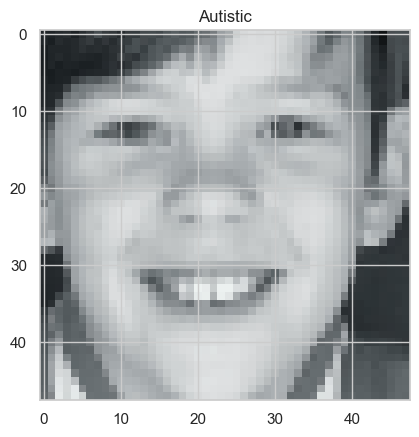

In [30]:
plt.imshow(images[86])
plt.title(class_names[86])

Text(0.5, 1.0, 'Autistic')

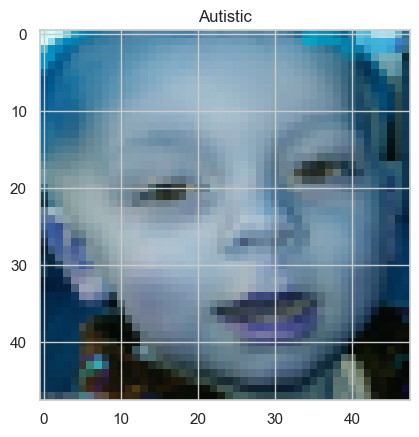

In [31]:
plt.imshow(images[588])
plt.title(class_names[588])

In [32]:
images = np.array(images)

In [33]:
images.shape

(3000, 48, 48, 3)

In [34]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data['class_label'])

In [35]:
enc.classes_

array(['Autistic', 'Non_Autistic'], dtype='<U12')

In [36]:
data['class_label'][:10]

537         Autistic
2848        Autistic
1982    Non_Autistic
1483    Non_Autistic
679     Non_Autistic
1689        Autistic
439     Non_Autistic
1986        Autistic
1498    Non_Autistic
2681    Non_Autistic
Name: class_label, dtype: object

In [37]:
y[:10]

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [38]:
y = []
for i in data['class_label']:
    if i == 'Non_Autistic':
        k = [1, 0]
        y.append(k)
    else:
        k = [0, 1]
        y.append(k)

In [39]:
y[:5]

[[0, 1], [0, 1], [1, 0], [1, 0], [1, 0]]

In [40]:
y=np.array(y)
y

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(images, y, test_size=0.3, stratify=y, random_state=43)

In [42]:
y_train[:5]

array([[1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1]])

In [43]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2100, 48, 48, 3), (2100, 2), (900, 48, 48, 3), (900, 2))

In [44]:
batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,48, 48, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                        

In [45]:
opt = Adam(learning_rate=0.001)
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
img, x_train, y_train

('C:\\Users\\ST-008\\Desktop\\projects\\projects\\OWN CONCEPTS\\DL\\Autism\\images\\Non_Autistic\\1507.jpg',
 array([[[[ 69,  80,  92],
          [ 97, 121, 140],
          [130, 160, 186],
          ...,
          [131, 170, 199],
          [ 98, 140, 171],
          [110, 148, 179]],
 
         [[ 85, 105, 121],
          [111, 140, 165],
          [106, 138, 169],
          ...,
          [147, 185, 208],
          [141, 178, 202],
          [112, 150, 177]],
 
         [[125, 150, 173],
          [113, 144, 171],
          [ 91, 124, 155],
          ...,
          [162, 193, 217],
          [154, 184, 209],
          [153, 182, 207]],
 
         ...,
 
         [[ 68,  92, 146],
          [ 71,  95, 150],
          [ 76, 100, 158],
          ...,
          [ 30,  39, 123],
          [ 12,   3,  91],
          [ 14,  13, 108]],
 
         [[ 68,  92, 144],
          [ 72,  97, 152],
          [ 81, 109, 167],
          ...,
          [ 41,  50, 137],
          [ 10,   4,  96],
     

In [47]:
his = model.fit(x_train, y_train, epochs=20, batch_size=256)

Epoch 1/20
9/9 [==============================] - 36s 4s/step - loss: 12.2933 - accuracy: 0.4933
Epoch 2/20
9/9 [==============================] - 32s 3s/step - loss: 0.7445 - accuracy: 0.5233
Epoch 3/20
9/9 [==============================] - 34s 4s/step - loss: 0.7266 - accuracy: 0.5010
Epoch 4/20
9/9 [==============================] - 34s 4s/step - loss: 0.6996 - accuracy: 0.5357
Epoch 5/20
9/9 [==============================] - 34s 4s/step - loss: 0.7145 - accuracy: 0.5286
Epoch 6/20
9/9 [==============================] - 33s 4s/step - loss: 0.6925 - accuracy: 0.5319
Epoch 7/20
9/9 [==============================] - 33s 4s/step - loss: 0.7048 - accuracy: 0.5214
Epoch 8/20
9/9 [==============================] - 32s 3s/step - loss: 0.7055 - accuracy: 0.5338
Epoch 9/20
9/9 [==============================] - 32s 4s/step - loss: 0.6918 - accuracy: 0.5357
Epoch 10/20
9/9 [==============================] - 34s 4s/step - loss: 0.6821 - accuracy: 0.5429
Epoch 11/20
9/9 [=====================

29/29 [==============================] - 3s 101ms/step


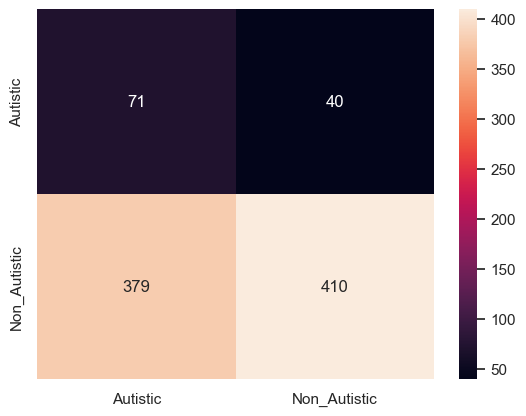

In [48]:
class_name = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax(model.predict(x_test), axis=1), np.argmax(y_test, axis=1)), columns = class_name, index=class_name)
heatmap = sns.heatmap(df_heatmap, annot = True, fmt = 'd')

In [49]:
score_1 = model.evaluate(x_train, y_train, verbose=0)
print("Test Accuracy : ", score_1[0])

Test Accuracy :  0.6632902026176453


In [50]:
score_1 = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy : ", score_1[0])

Test Accuracy :  0.6722713112831116


In [51]:
results = pd.DataFrame(columns=['model', 'test_accuracy'])
new = ['CNN', score_1[0]]
results.loc[0] = new

In [52]:
results

model  test_accuracy
0   CNN       0.672271

1/1 [==============================] - 0s 129ms/step
[[[ 69  80  92]
  [ 97 121 140]
  [130 160 186]
  ...
  [131 170 199]
  [ 98 140 171]
  [110 148 179]]

 [[ 85 105 121]
  [111 140 165]
  [106 138 169]
  ...
  [147 185 208]
  [141 178 202]
  [112 150 177]]

 [[125 150 173]
  [113 144 171]
  [ 91 124 155]
  ...
  [162 193 217]
  [154 184 209]
  [153 182 207]]

 ...

 [[ 68  92 146]
  [ 71  95 150]
  [ 76 100 158]
  ...
  [ 30  39 123]
  [ 12   3  91]
  [ 14  13 108]]

 [[ 68  92 144]
  [ 72  97 152]
  [ 81 109 167]
  ...
  [ 41  50 137]
  [ 10   4  96]
  [ 11   5 128]]

 [[ 65  89 144]
  [ 76 101 158]
  [ 89 116 176]
  ...
  [ 12   7 119]
  [ 10   3 123]
  [ 16   4 148]]]
1/1 [==============================] - 0s 25ms/step
[[[ 10   4   1]
  [  8   4   2]
  [ 43  44  41]
  ...
  [ 57  73  81]
  [ 39  53  54]
  [ 27  36  32]]

 [[  9   4   1]
  [  9   5   5]
  [105 105 100]
  ...
  [ 57  74  87]
  [ 53  66  75]
  [ 14  24  26]]

 [[  6   3   0]
  [ 11  10  10]
  [152 148 142]
  ...
  [

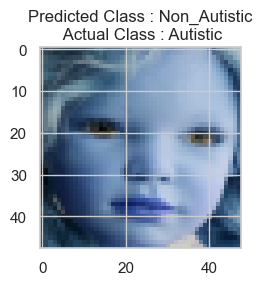

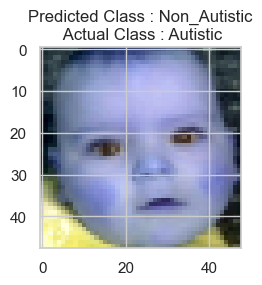

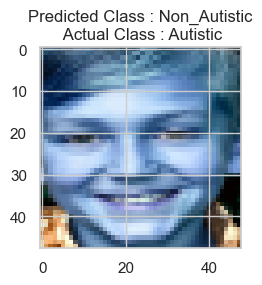

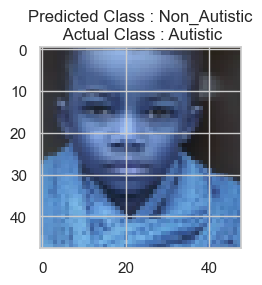

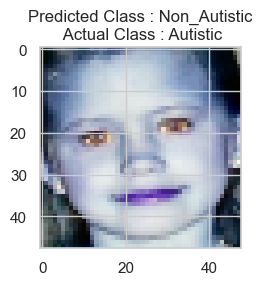

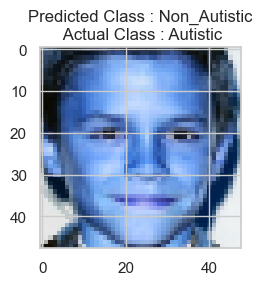

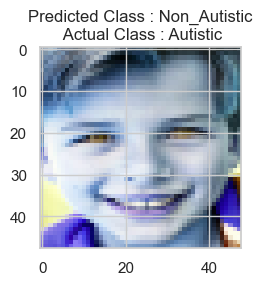

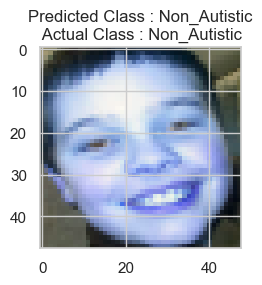

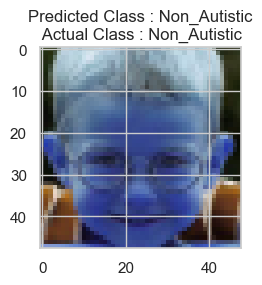

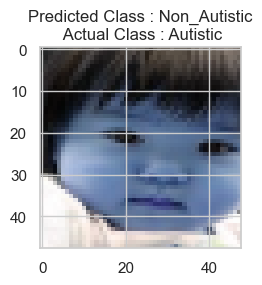

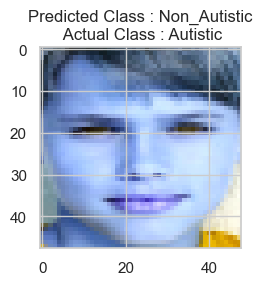

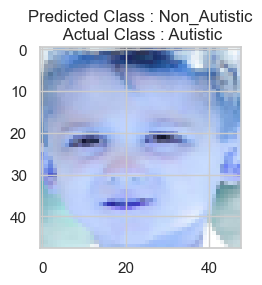

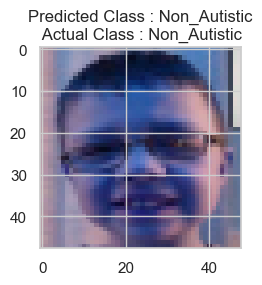

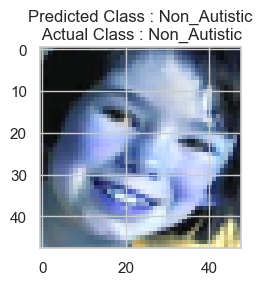

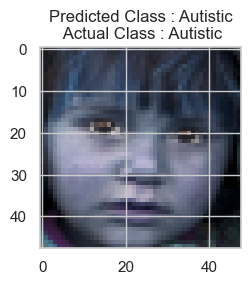

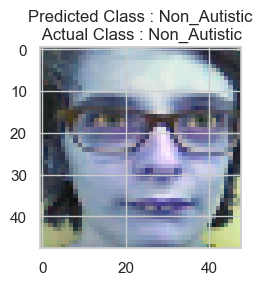

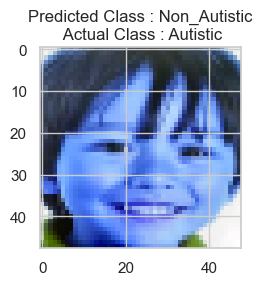

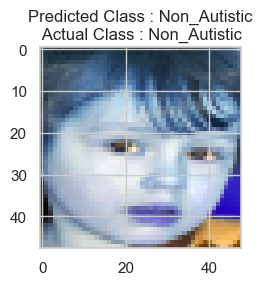

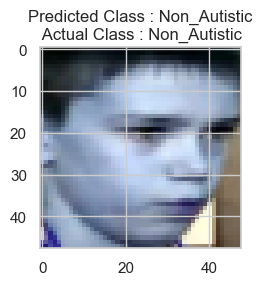

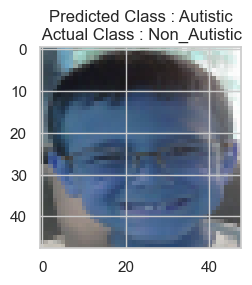

In [53]:
for i in range(20):
    plt.figure(figsize=(15, 15))
    plt.subplot(4, 5, i+1)
    pred = np.argmax(model.predict(np.array([x_train[i]]))[0])
    print(x_train[i])
    act = np.argmax(y_test[i])
    plt.title("Predicted Class : {}\n Actual Class : {}".format(enc.classes_[pred], enc.classes_[act]))
    plt.imshow(x_test[i])
act = np.argmax(y_test[i])
print("Predicted class : {}", format(enc.classes_[pred]))
print("Actual Class : {}", format(enc.classes_[act]))

plt.imshow(x_test[i])

In [54]:
from keras.applications.vgg16 import VGG16

In [55]:
vgg = VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))

In [56]:
vgg.trainable = False

In [57]:
model_1 = Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(2, activation='softmax'))

In [58]:
opt = Adam(lr=0.001)
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_1.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

C:\Users\ST-008\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ST-008\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [59]:
his2= model_1.fit(x_train, y_train, epochs = 20, validation_data = (x_test,y_test),batch_size = 128)

Epoch 1/20
17/17 [==============================] - 43s 3s/step - loss: 6.3839 - accuracy: 0.5648 - val_loss: 3.8539 - val_accuracy: 0.6344
Epoch 2/20
17/17 [==============================] - 40s 2s/step - loss: 3.4481 - accuracy: 0.6429 - val_loss: 2.3506 - val_accuracy: 0.6767
Epoch 3/20
17/17 [==============================] - 41s 2s/step - loss: 2.2505 - accuracy: 0.6929 - val_loss: 1.9793 - val_accuracy: 0.6867
Epoch 4/20
17/17 [==============================] - 40s 2s/step - loss: 1.9807 - accuracy: 0.7129 - val_loss: 1.3282 - val_accuracy: 0.7333
Epoch 5/20
17/17 [==============================] - 40s 2s/step - loss: 1.3478 - accuracy: 0.7452 - val_loss: 1.1358 - val_accuracy: 0.7322
Epoch 6/20
17/17 [==============================] - 40s 2s/step - loss: 0.9712 - accuracy: 0.7586 - val_loss: 1.0405 - val_accuracy: 0.7311
Epoch 7/20
17/17 [==============================] - 41s 2s/step - loss: 0.7106 - accuracy: 0.8048 - val_loss: 0.8289 - val_accuracy: 0.7500
Epoch 8/20
17/17 [==

29/29 [==============================] - 12s 420ms/step


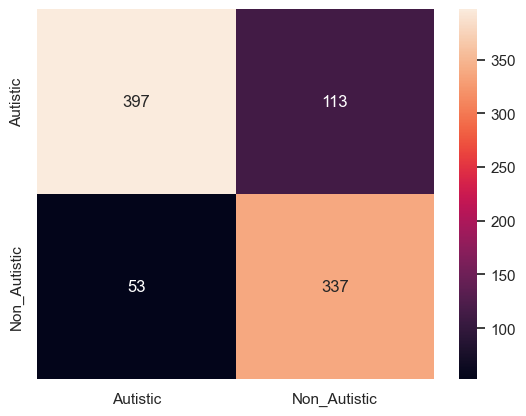

In [60]:
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_1.predict(x_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [61]:
score_3 = model_1.evaluate(x_train, y_train, verbose=0)
print('train accuracy:', score_3[1])

train accuracy: 0.9704762101173401


In [62]:
score_4 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_4[1])

Test accuracy: 0.8155555725097656


1/1 [==============================] - 0s 42ms/step


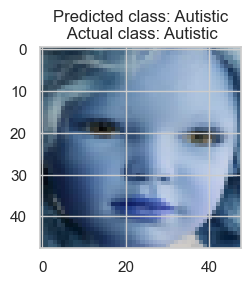

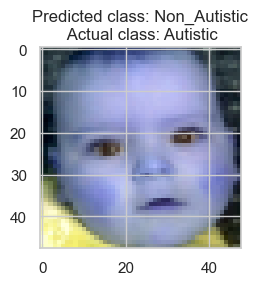

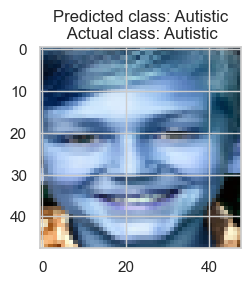

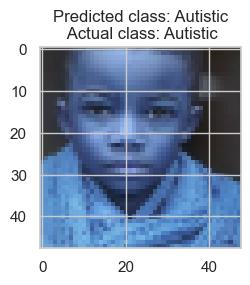

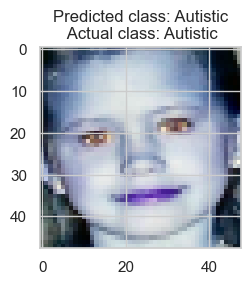

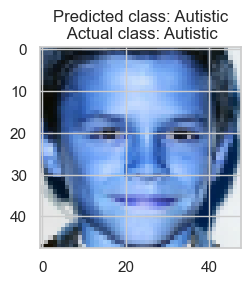

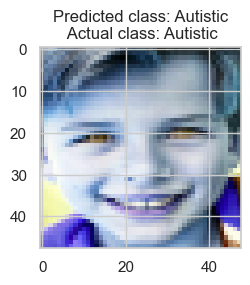

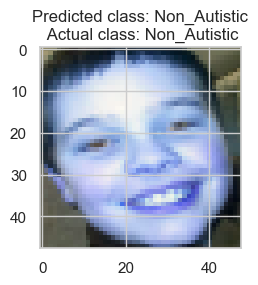

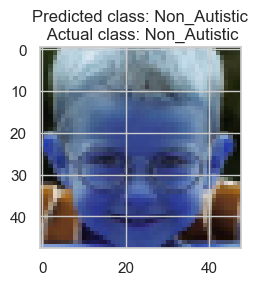

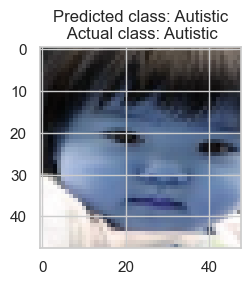

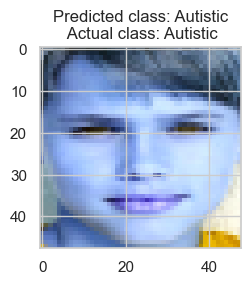

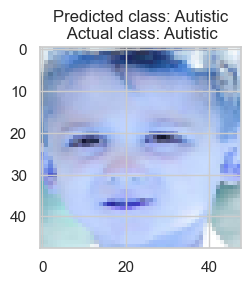

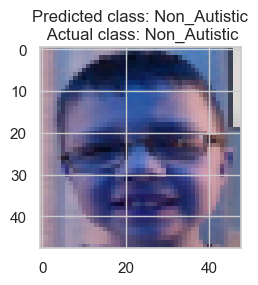

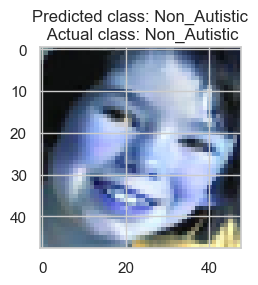

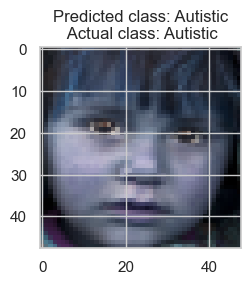

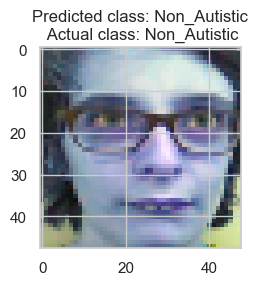

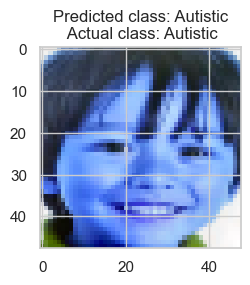

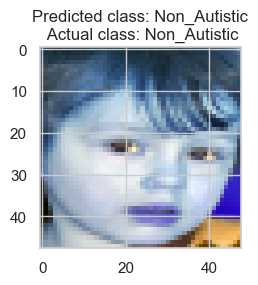

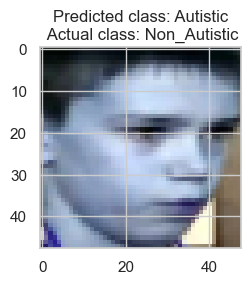

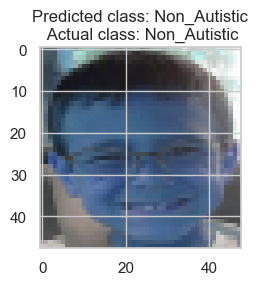

In [63]:
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = np.argmax(model_1.predict(np.array([x_test[i]]))[0])
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  plt.imshow(x_test[i])

In [64]:
results = pd.DataFrame(columns=['model', 'test_accuracy'])
new = ['CNN', score_1[0]]
results.loc[0] = new

In [65]:
new = ['VGG', score_4[1]]
results.loc[1] = new

In [66]:
results

model  test_accuracy
0   CNN       0.672271
1   VGG       0.815556